In [1]:
# Import relevant packages

import uproot # conda install -c conda-forge uproot
import vector # conda install -c conda-forge vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-v0_8-colorblind')

In [2]:
plt.rcParams.update({'font.size': 20,
                    'xtick.labelsize' : 40,
                    'ytick.labelsize' : 40,
                    'xtick.major.size' : 10,
                    'ytick.major.size' : 10,
                    'xtick.minor.size' : 5,
                    'ytick.minor.size' : 5,
                    'axes.labelsize' : 50,
                    'axes.titlesize' : 50}) 

In [3]:
tree=uproot.open("/Users/isaac/Desktop/10TeVMCDataAnalysis/doubleLayerFiltering/ntup_hits_SiTracksNOBIB.root")["tracks_tree"]
treeBIB=uproot.open("/Users/isaac/Desktop/10TeVMCDataAnalysis/doubleLayerFiltering/ntup_hits_SiTracksBIB.root")["tracks_tree"]

In [4]:
print(tree.keys())

['x1', 'y1', 'z1', 't1', 'theta1', 'phi1', 'system1', 'layer1', 'side1', 'x2', 'y2', 'z2', 't2', 'theta2', 'phi2', 'system2', 'layer2', 'side2', 'x3', 'y3', 'z3', 't3', 'theta3', 'phi3', 'system3', 'layer3', 'side3', 'x4', 'y4', 'z4', 't4', 'theta4', 'phi4', 'system4', 'layer4', 'side4']


In [5]:
hit={
    "x" : np.stack((tree["x1"].array(library="np"), tree["x2"].array(library="np"),tree["x3"].array(library="np"),tree["x4"].array(library="np"))),
    "y" : np.stack((tree["y1"].array(library="np"), tree["y2"].array(library="np"),tree["y3"].array(library="np"),tree["y4"].array(library="np"))),
    "z" : np.stack((tree["z1"].array(library="np"), tree["z2"].array(library="np"),tree["z3"].array(library="np"),tree["z4"].array(library="np"))),
    "t" : np.stack((tree["t1"].array(library="np"), tree["t2"].array(library="np"),tree["t3"].array(library="np"),tree["t4"].array(library="np"))),
    "theta" : np.stack((tree["theta1"].array(library="np"), tree["theta2"].array(library="np"),tree["theta3"].array(library="np"),tree["theta4"].array(library="np"))),
    "phi" : np.stack((tree["phi1"].array(library="np"), tree["phi2"].array(library="np"),tree["phi3"].array(library="np"),tree["phi4"].array(library="np"))),
    "sys" : np.stack((tree["system1"].array(library="np"), tree["system2"].array(library="np"),tree["system3"].array(library="np"),tree["system4"].array(library="np"))),
    "lay" : np.stack((tree["layer1"].array(library="np"), tree["layer2"].array(library="np"),tree["layer3"].array(library="np"),tree["layer4"].array(library="np"))),
    "side" : np.stack((tree["side1"].array(library="np"), tree["side2"].array(library="np"),tree["side3"].array(library="np"),tree["side4"].array(library="np"))),
    "r" : np.sqrt(np.stack((tree["x1"].array(library="np"), tree["x2"].array(library="np"),tree["x3"].array(library="np"),tree["x4"].array(library="np")))**2+np.stack((tree["y1"].array(library="np"), tree["y2"].array(library="np"),tree["y3"].array(library="np"),tree["y4"].array(library="np")))**2)
}

In [6]:
hitBIB={
    "x" : np.stack((treeBIB["x1"].array(library="np"), treeBIB["x2"].array(library="np"),treeBIB["x3"].array(library="np"),treeBIB["x4"].array(library="np"))),
    "y" : np.stack((treeBIB["y1"].array(library="np"), treeBIB["y2"].array(library="np"),treeBIB["y3"].array(library="np"),treeBIB["y4"].array(library="np"))),
    "z" : np.stack((treeBIB["z1"].array(library="np"), treeBIB["z2"].array(library="np"),treeBIB["z3"].array(library="np"),treeBIB["z4"].array(library="np"))),
    "t" : np.stack((treeBIB["t1"].array(library="np"), treeBIB["t2"].array(library="np"),treeBIB["t3"].array(library="np"),treeBIB["t4"].array(library="np"))),
    "theta" : np.stack((treeBIB["theta1"].array(library="np"), treeBIB["theta2"].array(library="np"),treeBIB["theta3"].array(library="np"),treeBIB["theta4"].array(library="np"))),
    "phi" : np.stack((treeBIB["phi1"].array(library="np"), treeBIB["phi2"].array(library="np"),treeBIB["phi3"].array(library="np"),treeBIB["phi4"].array(library="np"))),
    "sys" : np.stack((treeBIB["system1"].array(library="np"), treeBIB["system2"].array(library="np"),treeBIB["system3"].array(library="np"),treeBIB["system4"].array(library="np"))),
    "lay" : np.stack((treeBIB["layer1"].array(library="np"), treeBIB["layer2"].array(library="np"),treeBIB["layer3"].array(library="np"),treeBIB["layer4"].array(library="np"))),
    "side" : np.stack((treeBIB["side1"].array(library="np"), treeBIB["side2"].array(library="np"),treeBIB["side3"].array(library="np"),treeBIB["side4"].array(library="np"))),
    "r" : np.sqrt(np.stack((treeBIB["x1"].array(library="np"), treeBIB["x2"].array(library="np"),treeBIB["x3"].array(library="np"),treeBIB["x4"].array(library="np")))**2+np.stack((treeBIB["y1"].array(library="np"), treeBIB["y2"].array(library="np"),treeBIB["y3"].array(library="np"),treeBIB["y4"].array(library="np")))**2)
}

In [7]:
print(hit["x"].shape)

(4, 924)


In [8]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label="", savefig=False, dpi=300):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    elif type(data[0])==np.float64 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.yscale(scale)
    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [9]:
# a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label="", savefig=False, dpi=300):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(111)
    
    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

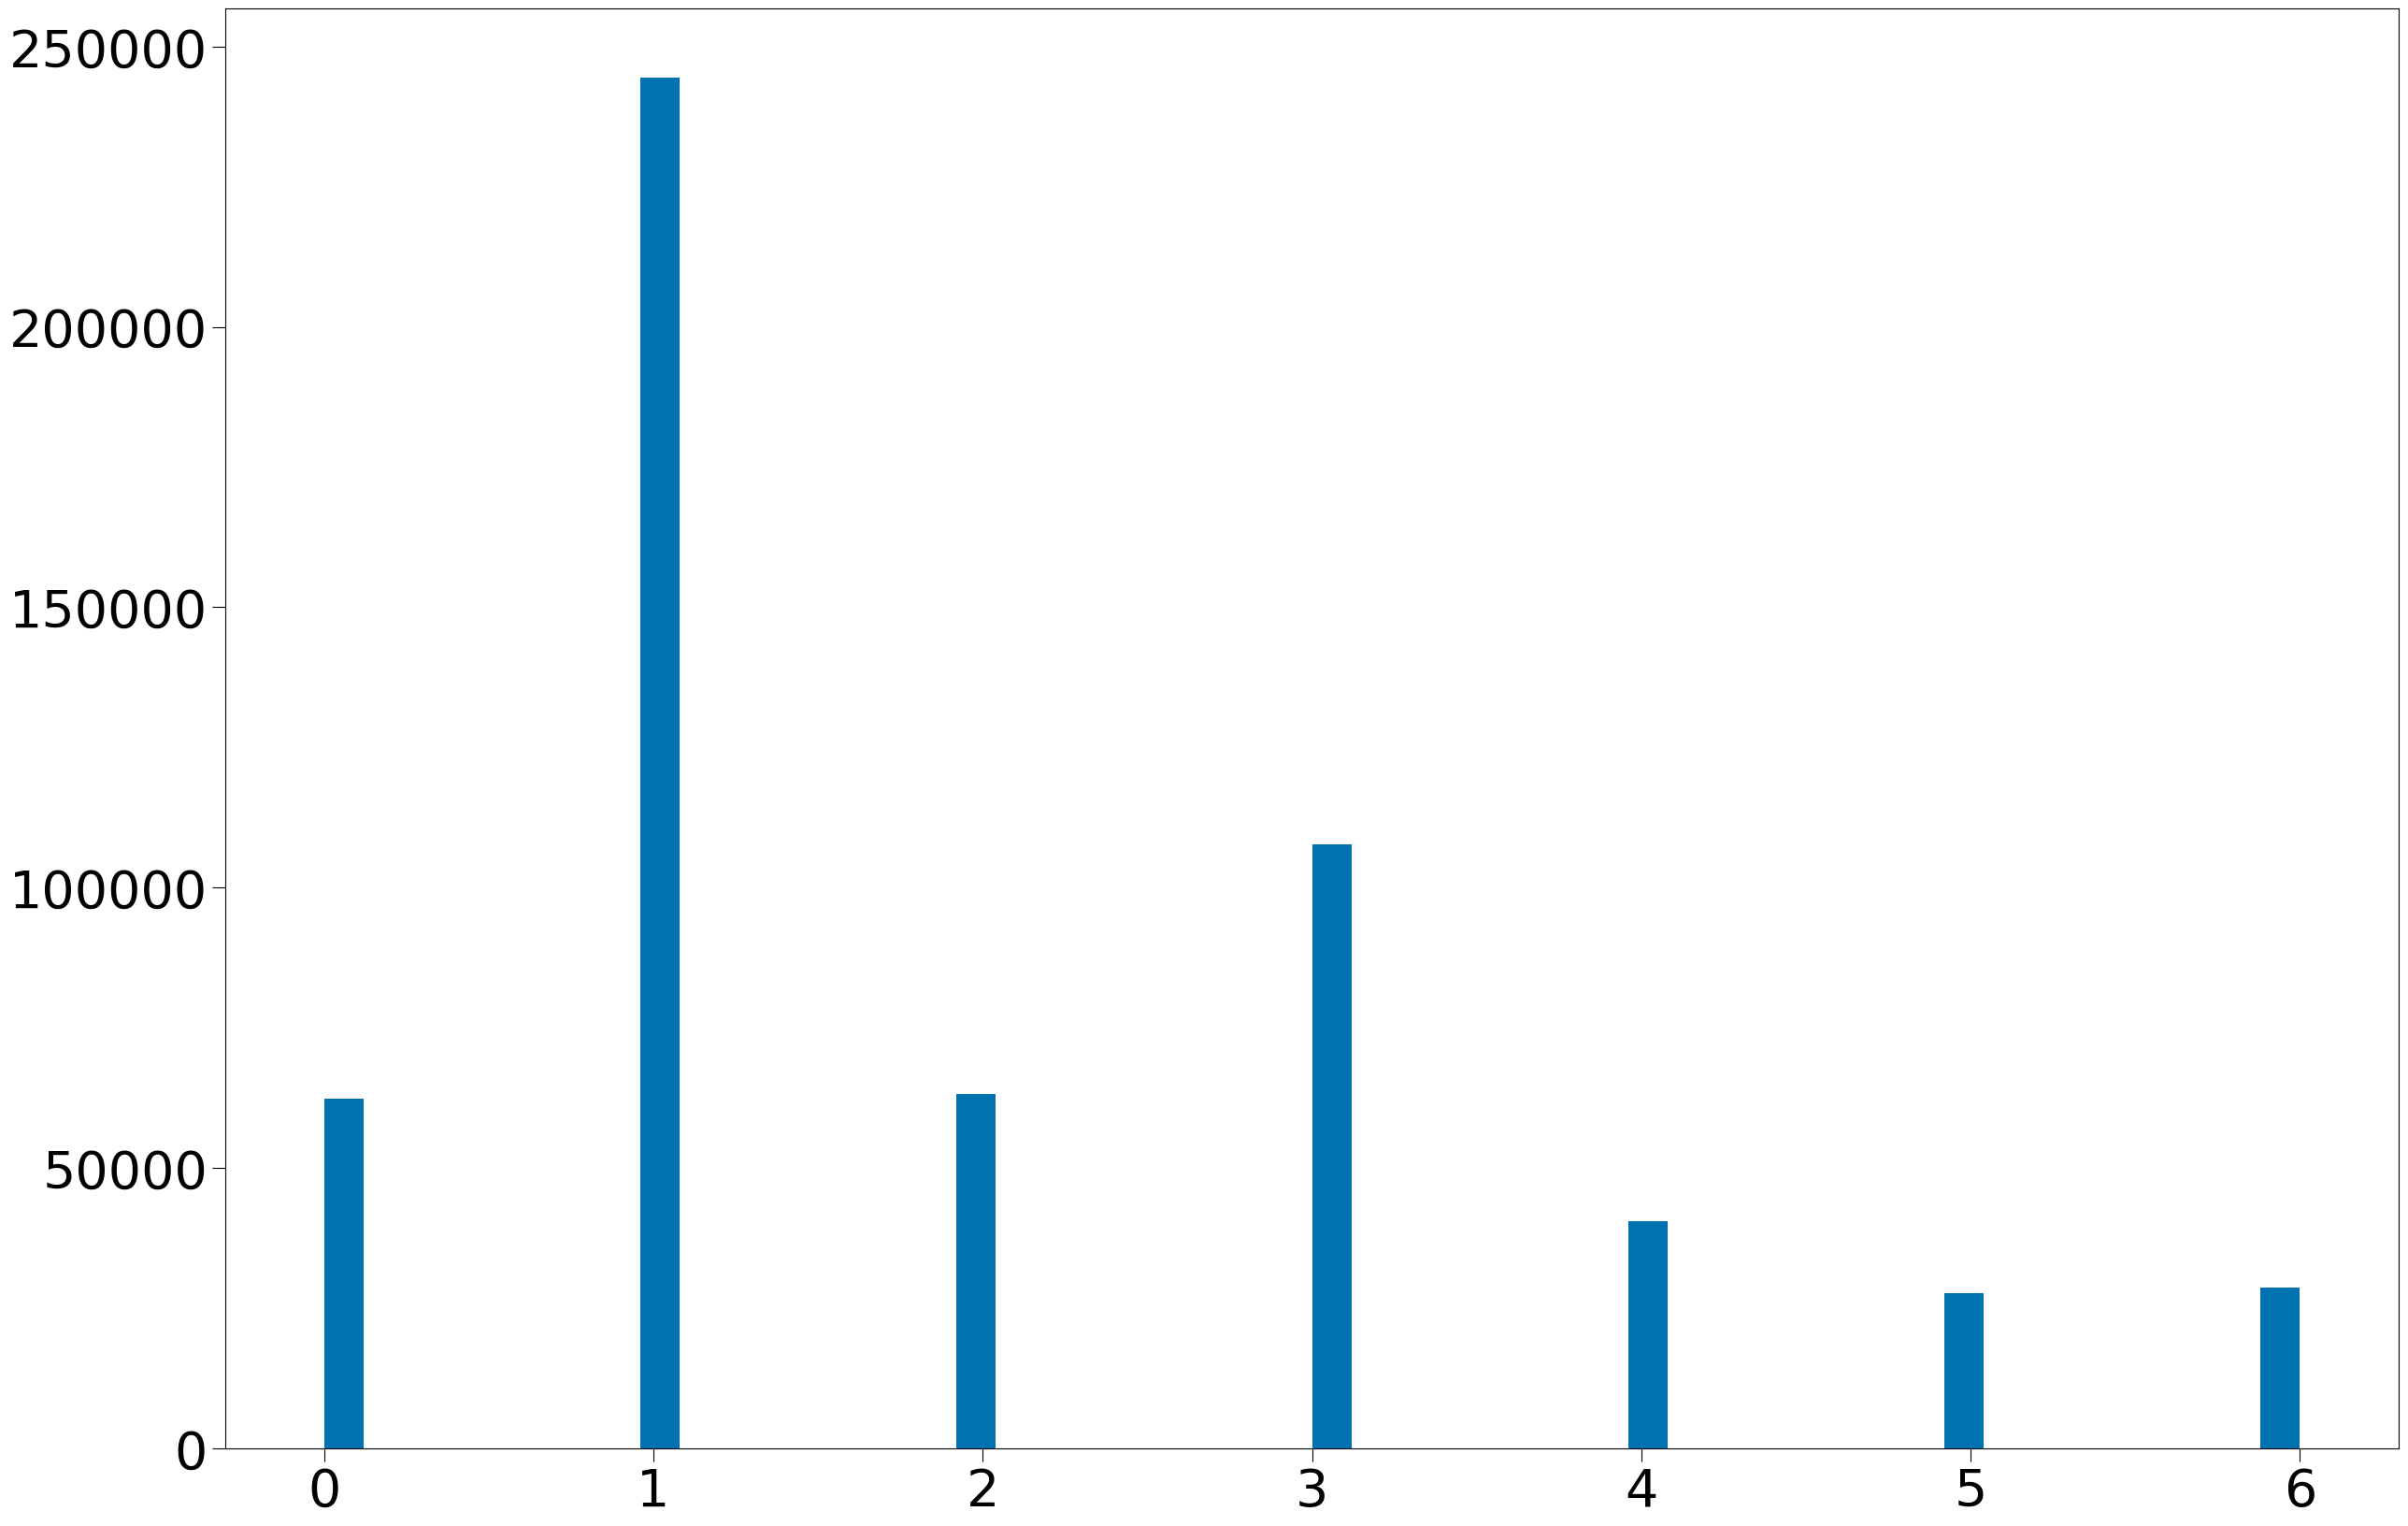

In [10]:
plot1DHistogram(hitBIB["sys"], bins=50)

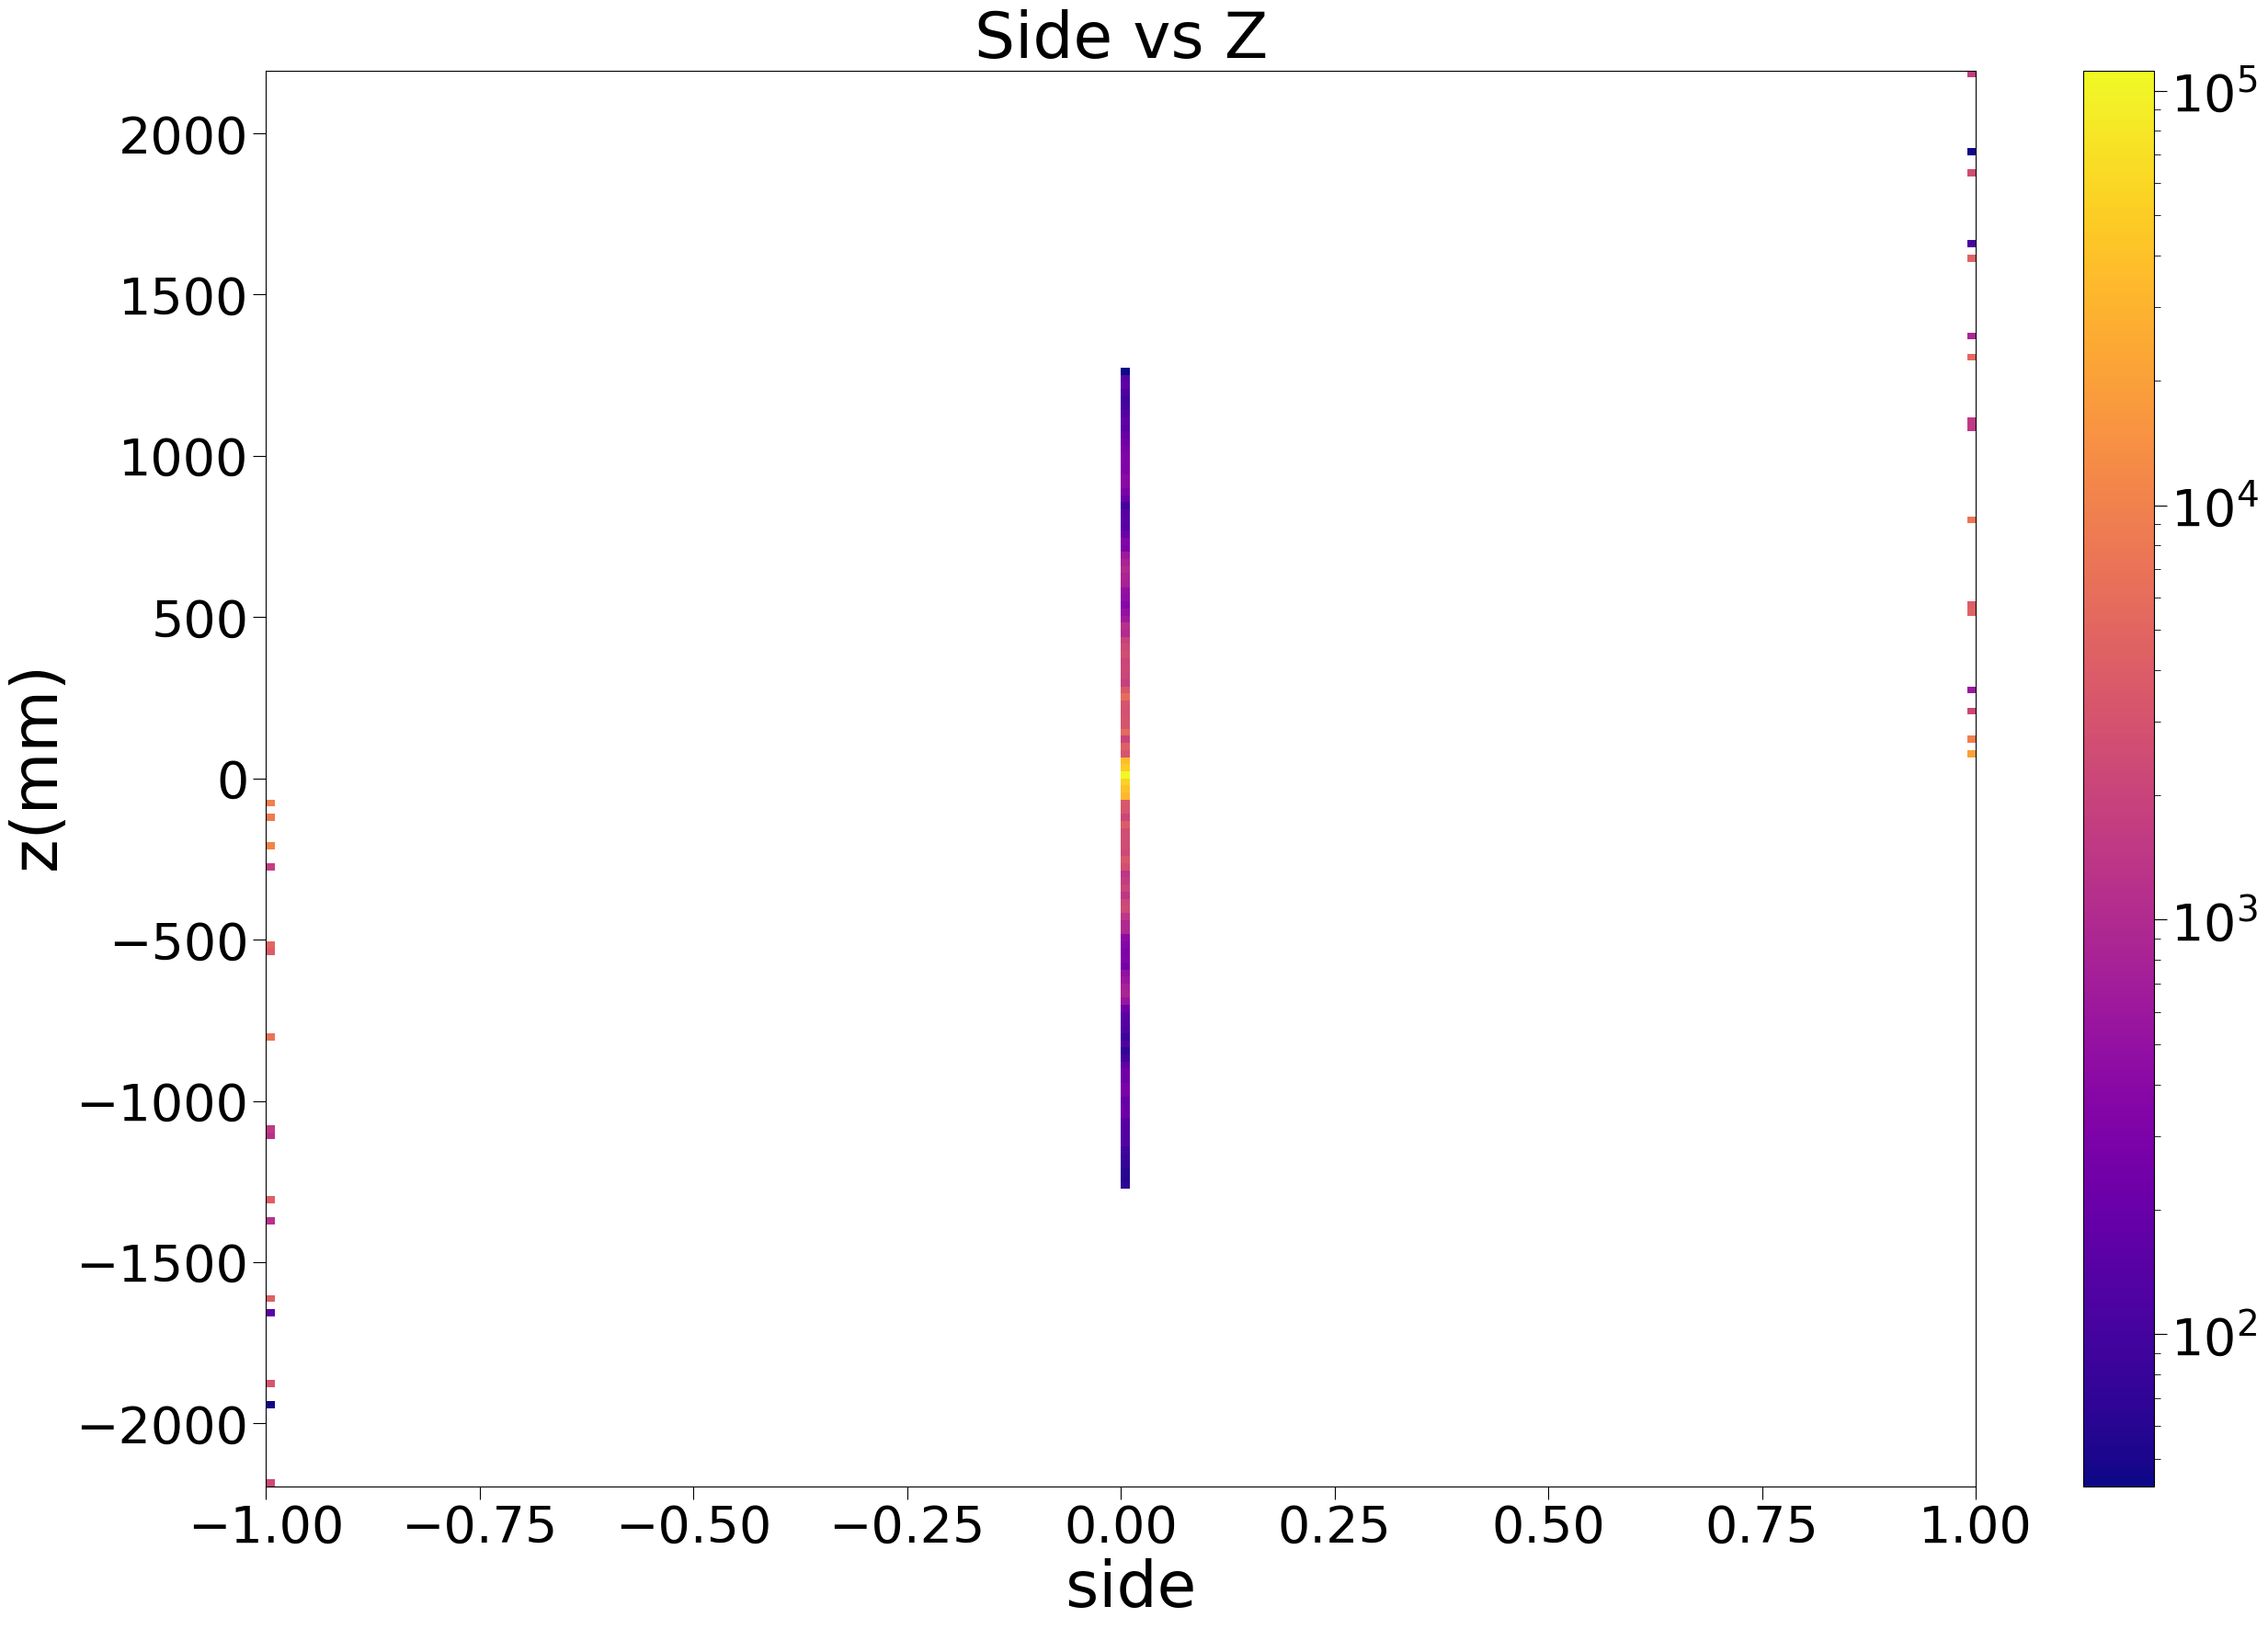

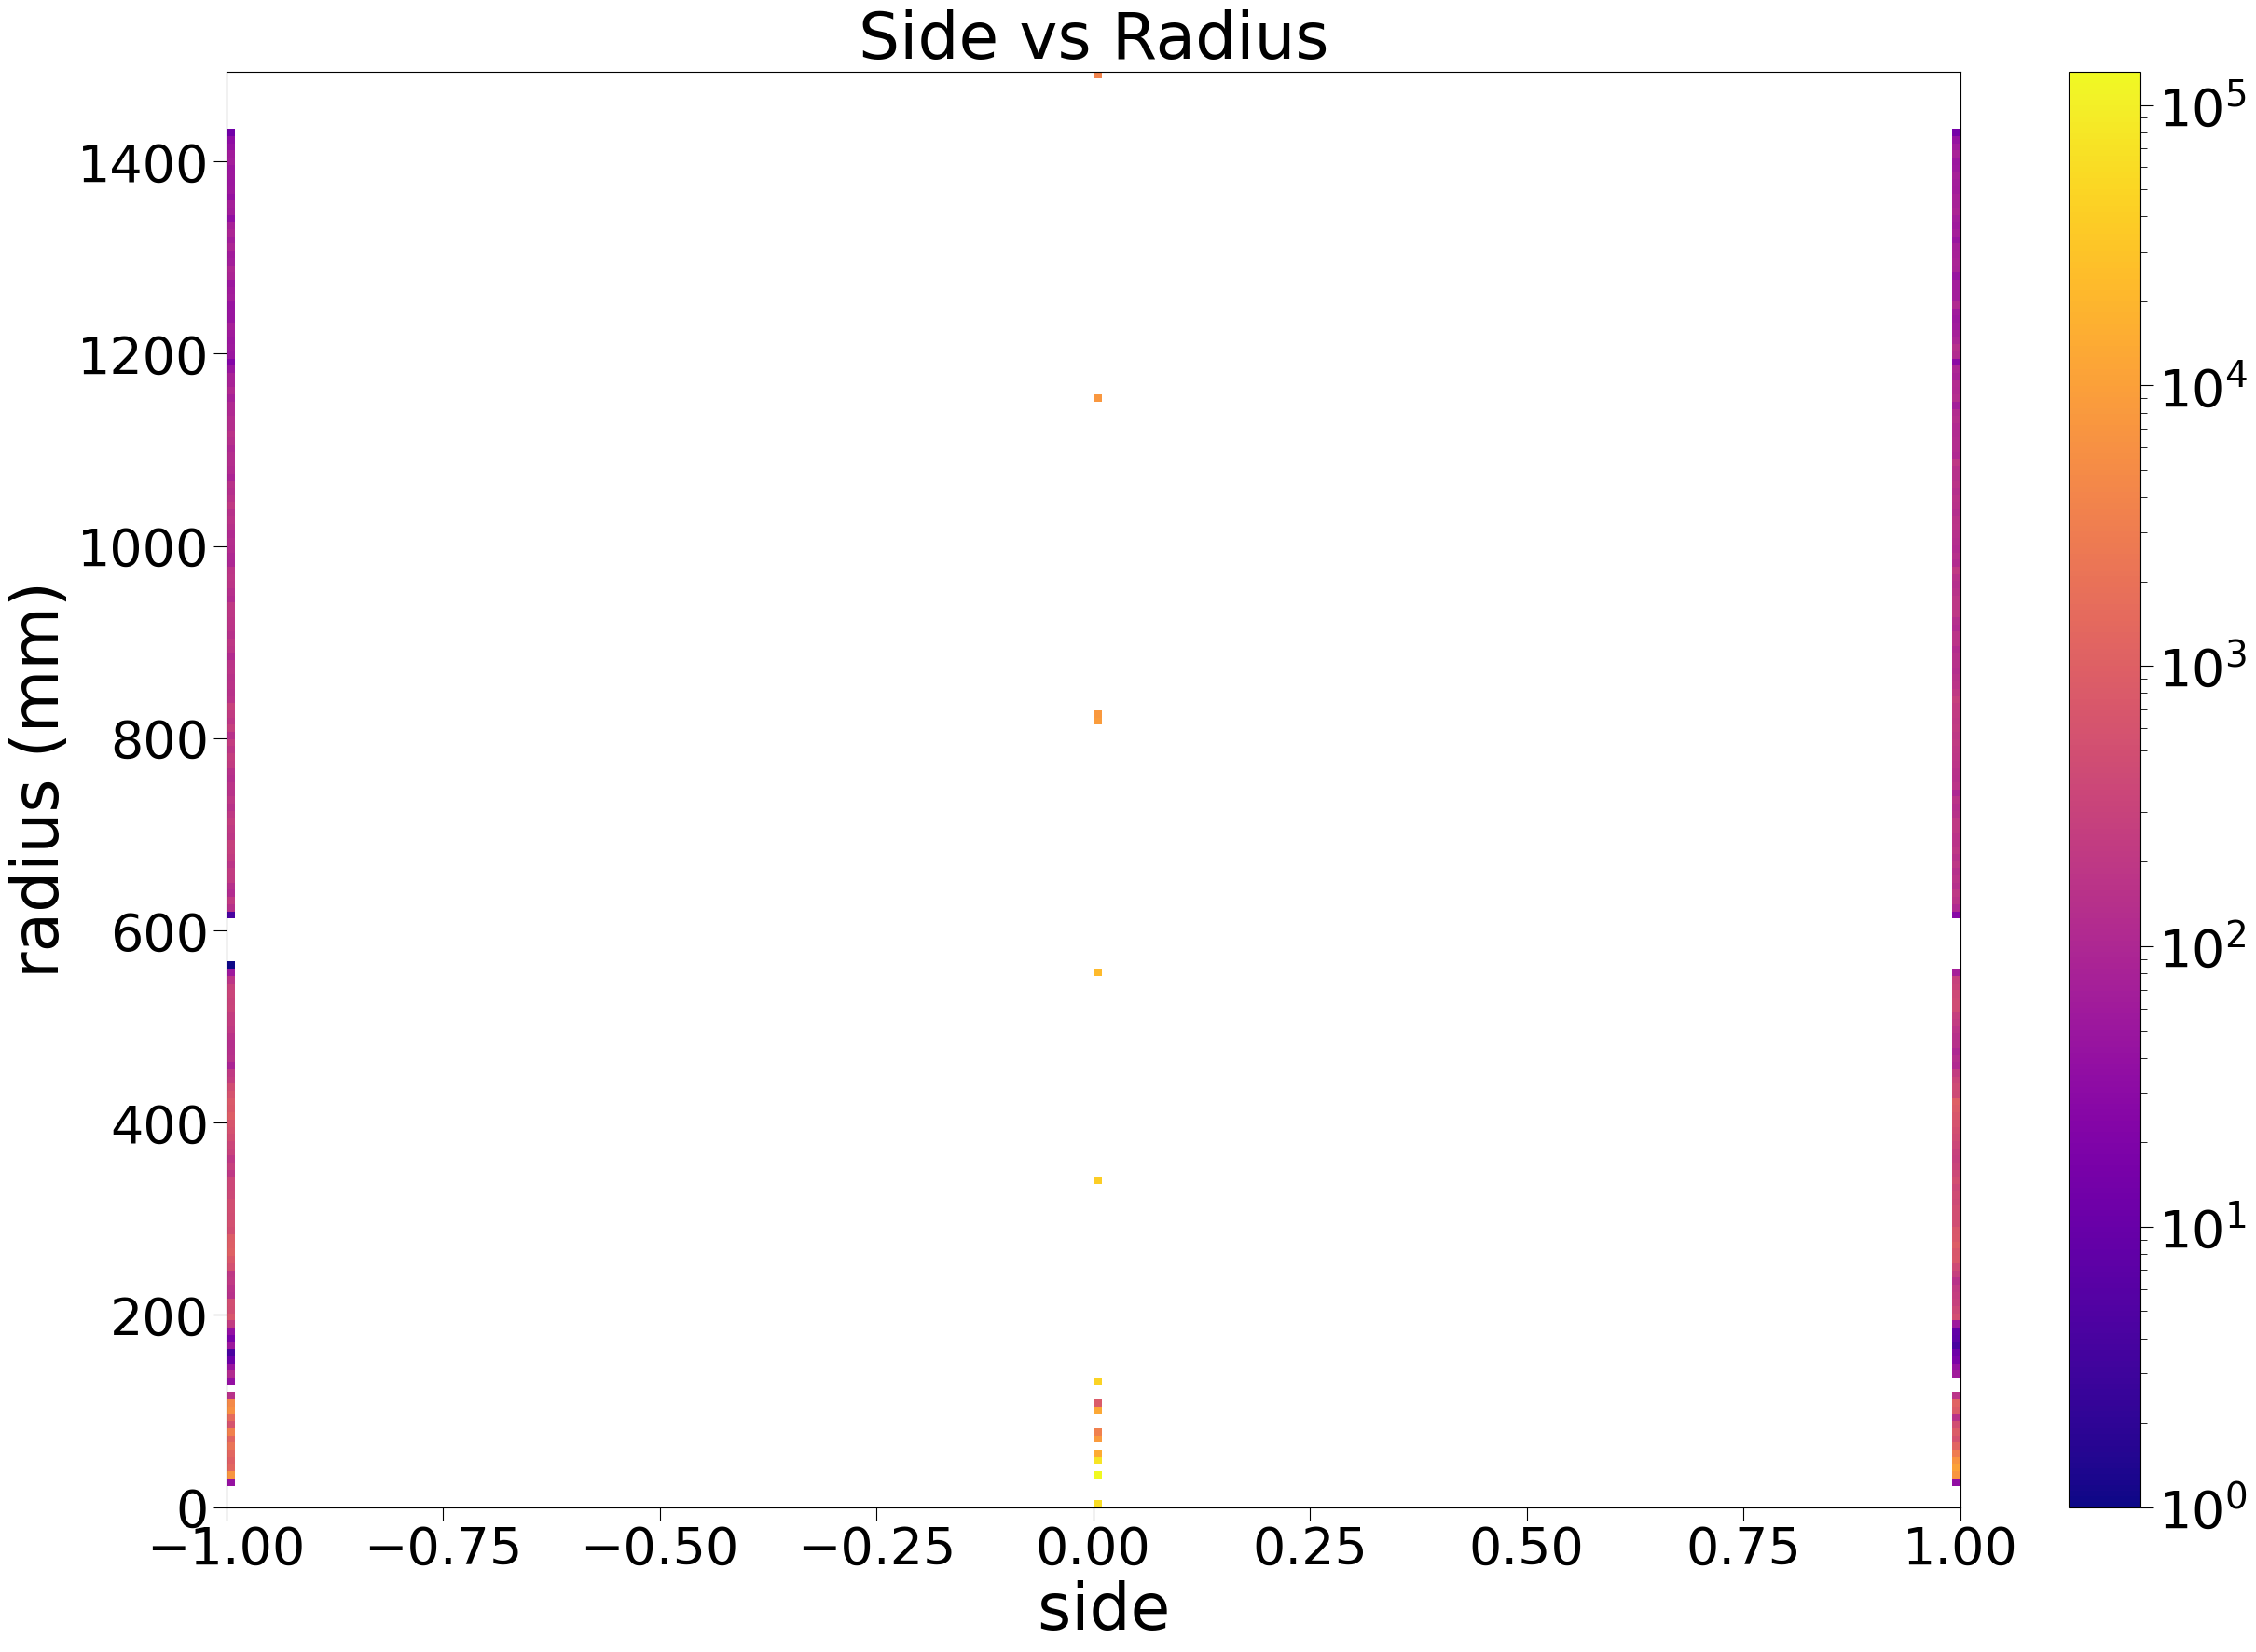

In [109]:
plot2DHistogram(hitBIB["side"], hitBIB["z"], bins=200, label="Side vs Z; side; z(mm)")
plot2DHistogram(hitBIB["side"], hitBIB["r"], bins=200, label="Side vs Radius; side; radius (mm)")

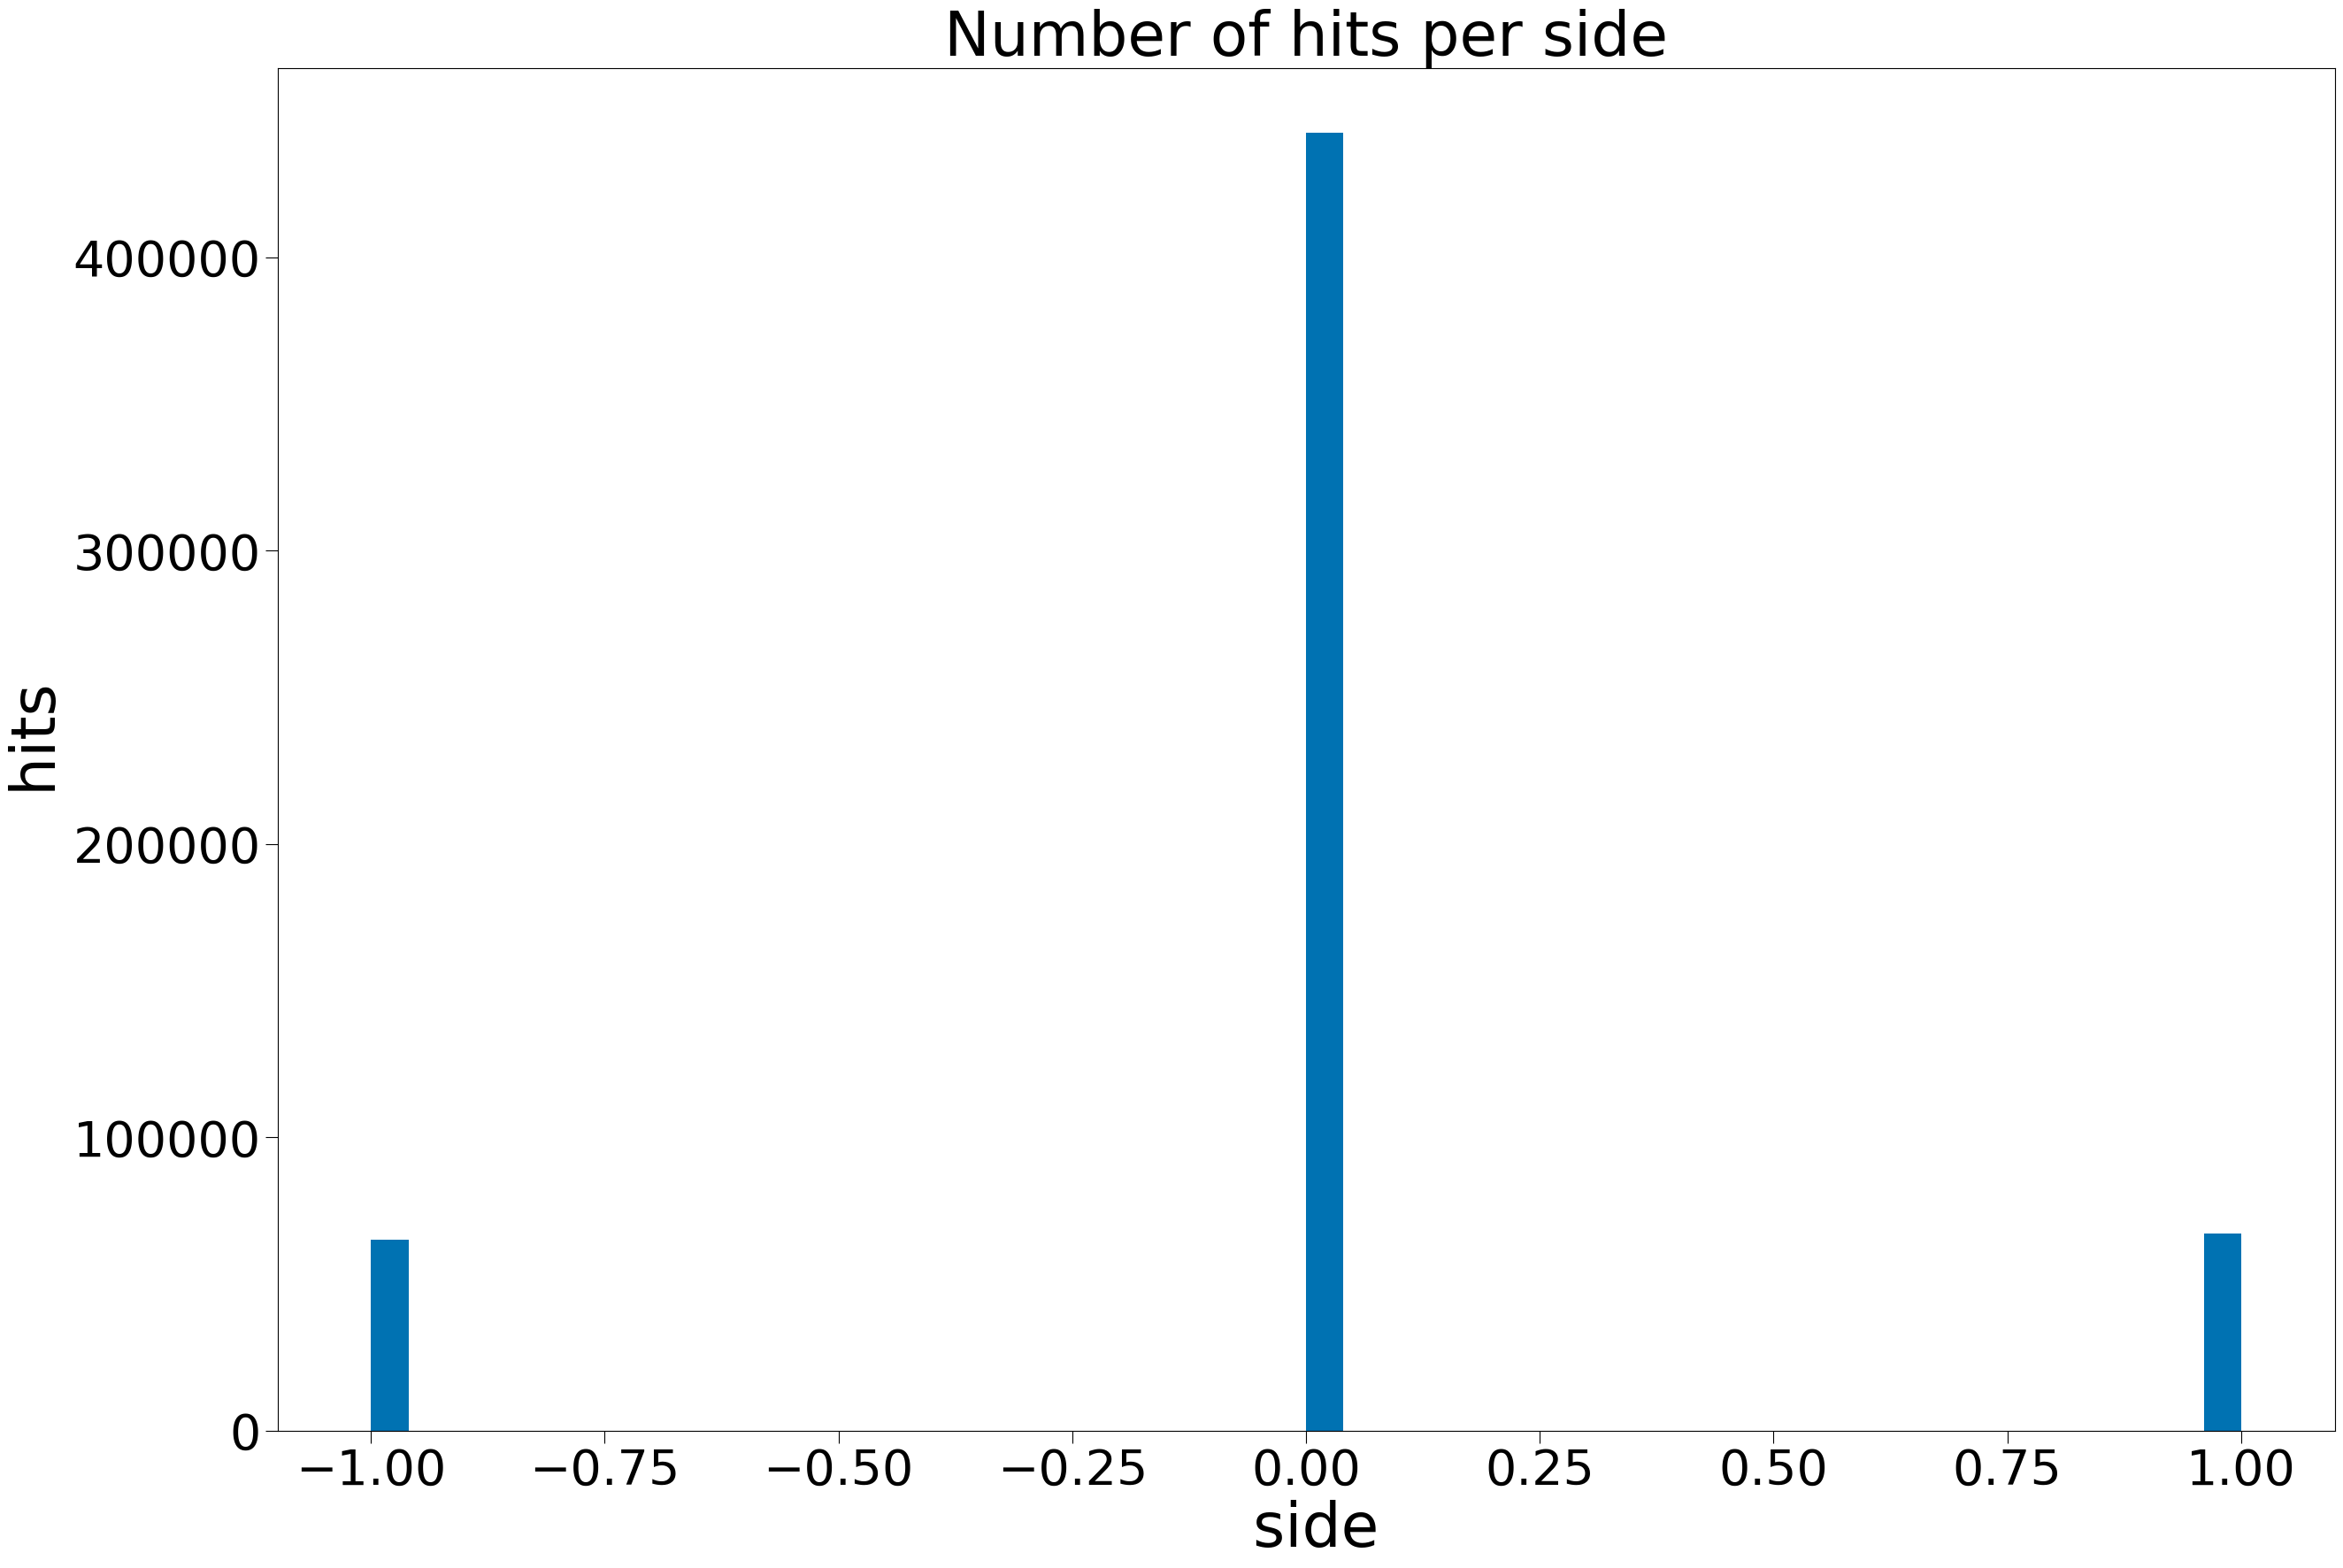

In [108]:
plot1DHistogram(hitBIB["side"], bins=50, label="Number of hits per side; side; hits")

In [120]:
for i in range(8):
    print("Hits in the vertex endcaps for BIB files:")
    print("layer="+str(i) + ":")
    print("number of hits in the -z endcap: " + str(hitBIB["x"][(hitBIB["side"]==-1) &(hitBIB["sys"]==2) & (hitBIB["lay"]==i)].shape[0]))
    print("number of hits in the +z endcap: " + str(hitBIB["x"][(hitBIB["side"]==1) &(hitBIB["sys"]==2) & (hitBIB["lay"]==i)].shape[0]))

For the vertex endcaps:
layer=0:
number of hits in the -z endcap: 1094
number of hits in the +z endcap: 19328
For the vertex endcaps:
layer=1:
number of hits in the -z endcap: 8280
number of hits in the +z endcap: 1079
For the vertex endcaps:
layer=2:
number of hits in the -z endcap: 4774
number of hits in the +z endcap: 9269
For the vertex endcaps:
layer=3:
number of hits in the -z endcap: 3892
number of hits in the +z endcap: 428
For the vertex endcaps:
layer=4:
number of hits in the -z endcap: 10050
number of hits in the +z endcap: 1886
For the vertex endcaps:
layer=5:
number of hits in the -z endcap: 478
number of hits in the +z endcap: 334
For the vertex endcaps:
layer=6:
number of hits in the -z endcap: 1556
number of hits in the +z endcap: 563
For the vertex endcaps:
layer=7:
number of hits in the -z endcap: 172
number of hits in the +z endcap: 27


In [121]:
for i in range(8):
    print("Hits in the vertex endcaps for no BIB files:")
    print("layer="+str(i) + ":")
    print("number of hits in the -z endcap: " + str(hit["x"][(hit["side"]==-1) &(hit["sys"]==2) & (hit["lay"]==i)].shape[0]))
    print("number of hits in the +z endcap: " + str(hit["x"][(hit["side"]==1) &(hit["sys"]==2) & (hit["lay"]==i)].shape[0]))

Hits in the vertex endcaps for no BIB files:
layer=0:
number of hits in the -z endcap: 12
number of hits in the +z endcap: 114
Hits in the vertex endcaps for no BIB files:
layer=1:
number of hits in the -z endcap: 44
number of hits in the +z endcap: 100
Hits in the vertex endcaps for no BIB files:
layer=2:
number of hits in the -z endcap: 36
number of hits in the +z endcap: 74
Hits in the vertex endcaps for no BIB files:
layer=3:
number of hits in the -z endcap: 70
number of hits in the +z endcap: 61
Hits in the vertex endcaps for no BIB files:
layer=4:
number of hits in the -z endcap: 39
number of hits in the +z endcap: 26
Hits in the vertex endcaps for no BIB files:
layer=5:
number of hits in the -z endcap: 32
number of hits in the +z endcap: 24
Hits in the vertex endcaps for no BIB files:
layer=6:
number of hits in the -z endcap: 25
number of hits in the +z endcap: 0
Hits in the vertex endcaps for no BIB files:
layer=7:
number of hits in the -z endcap: 19
number of hits in the +z en

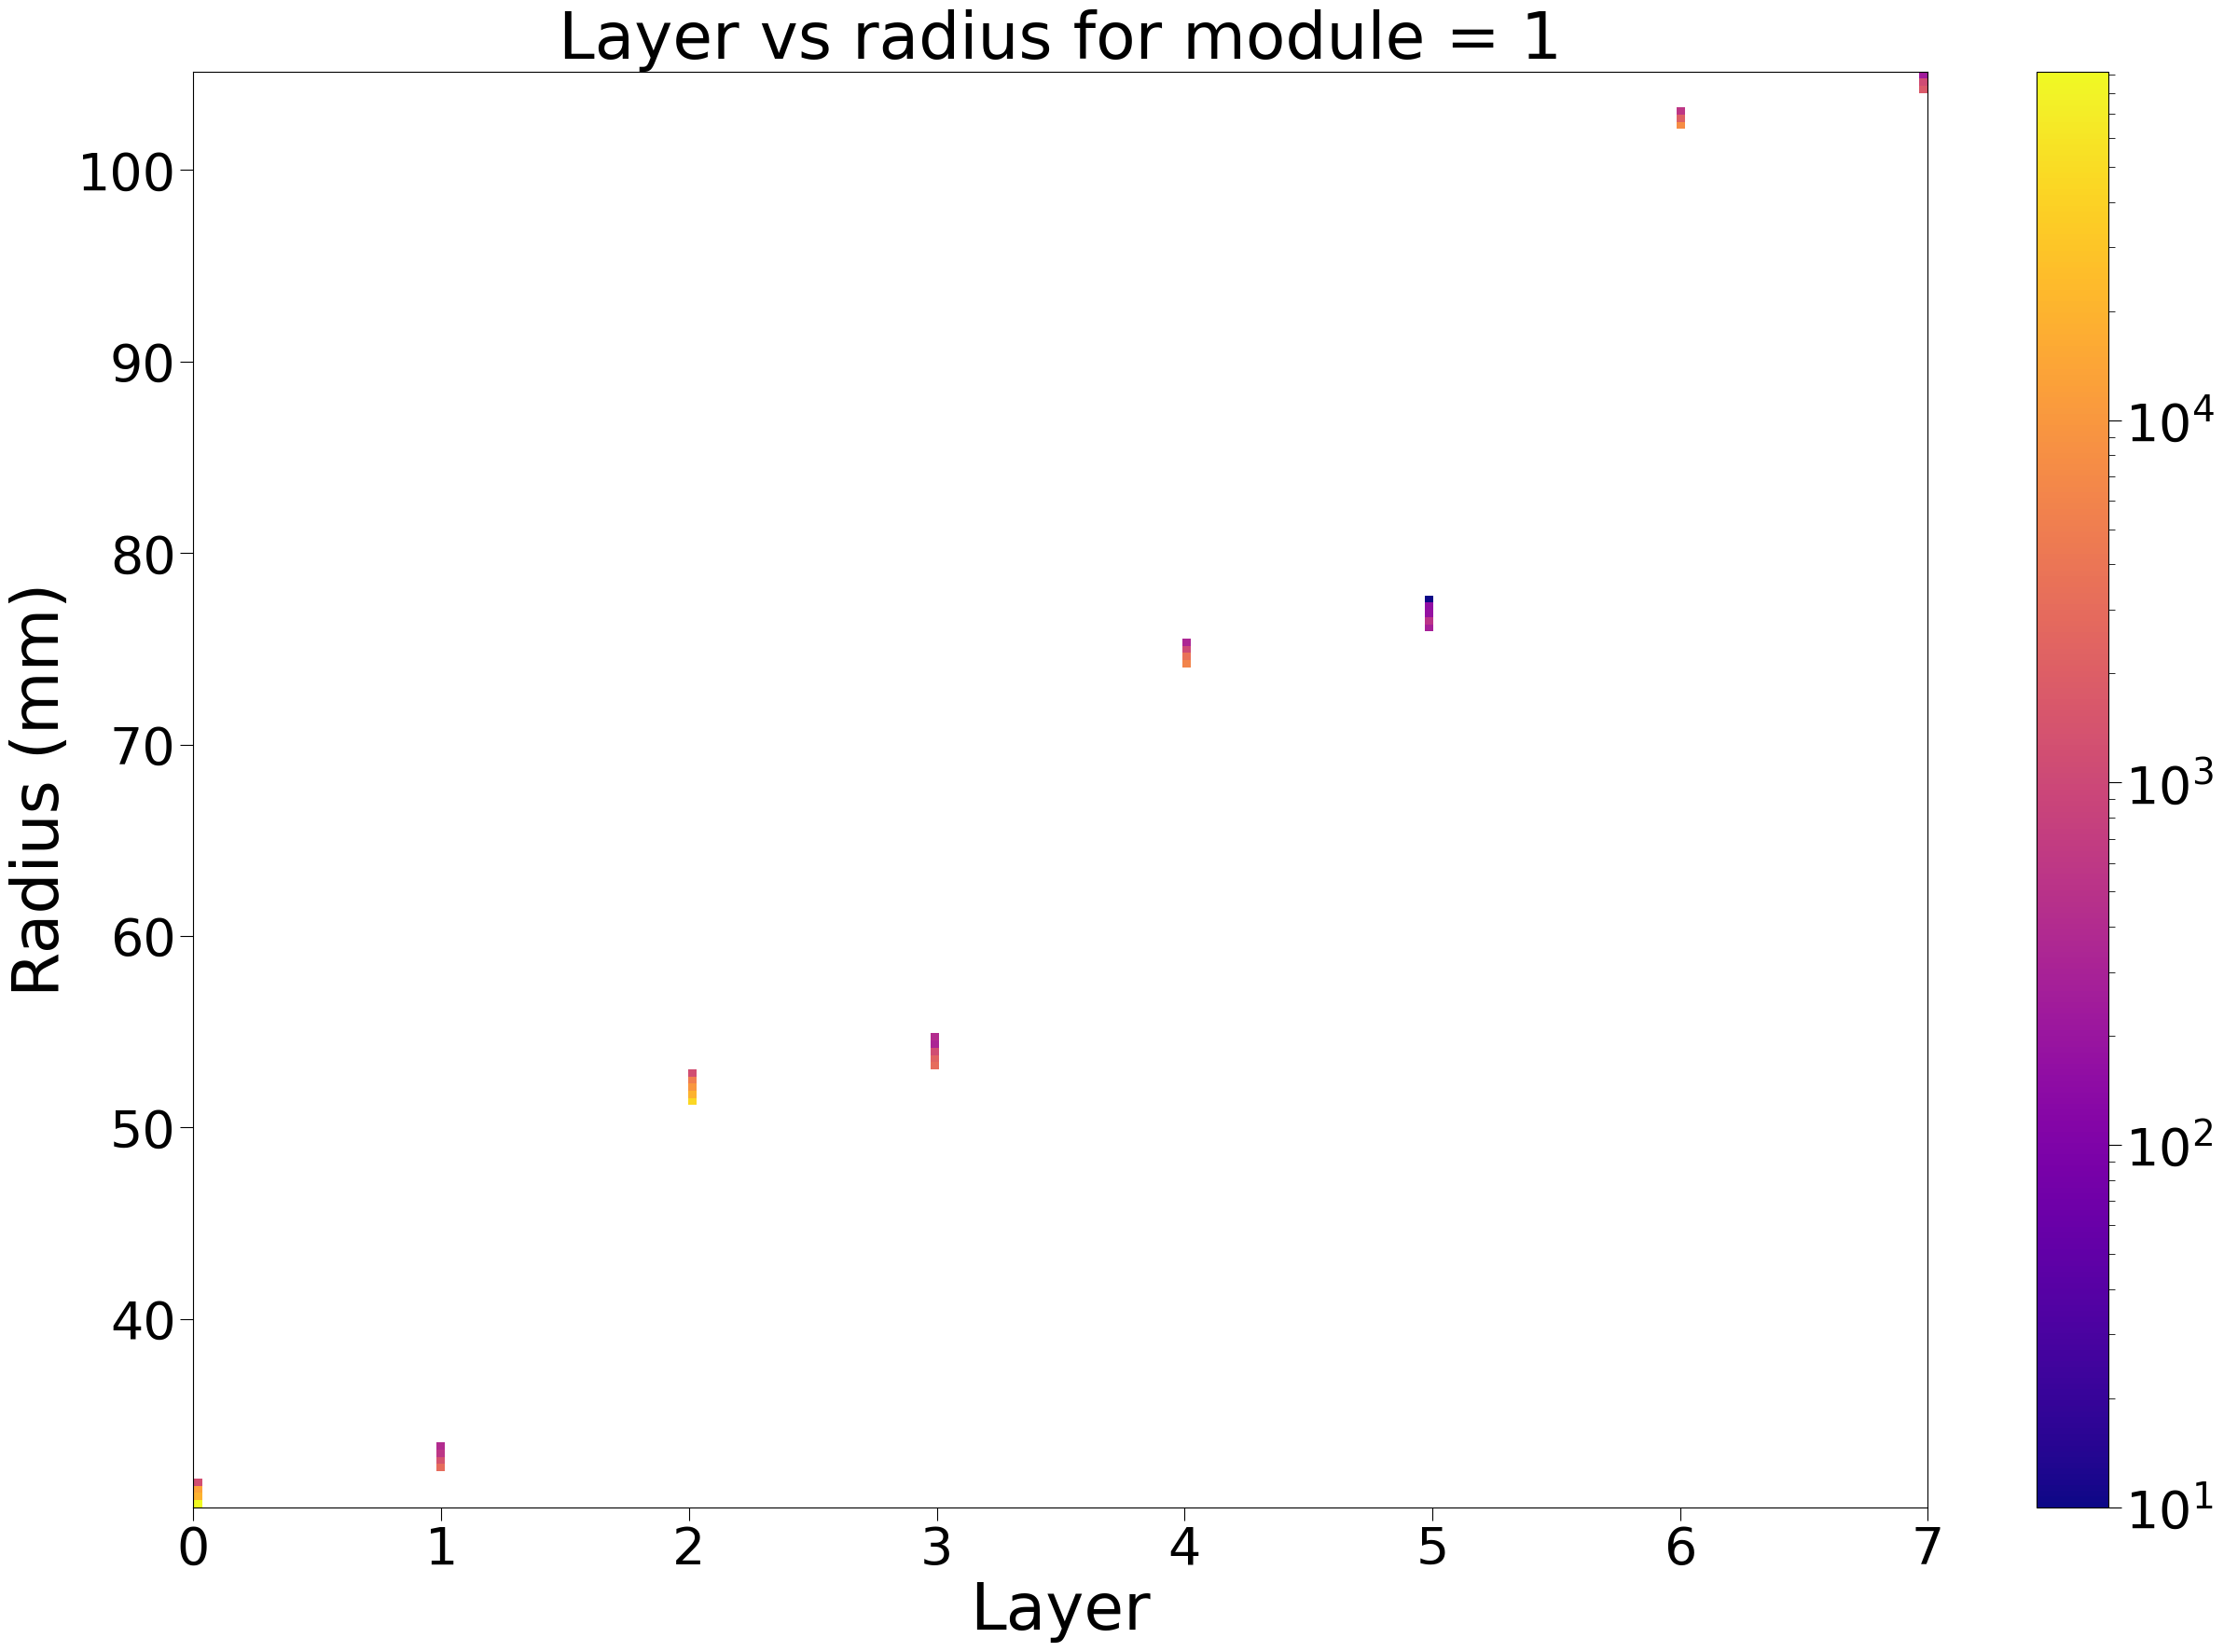

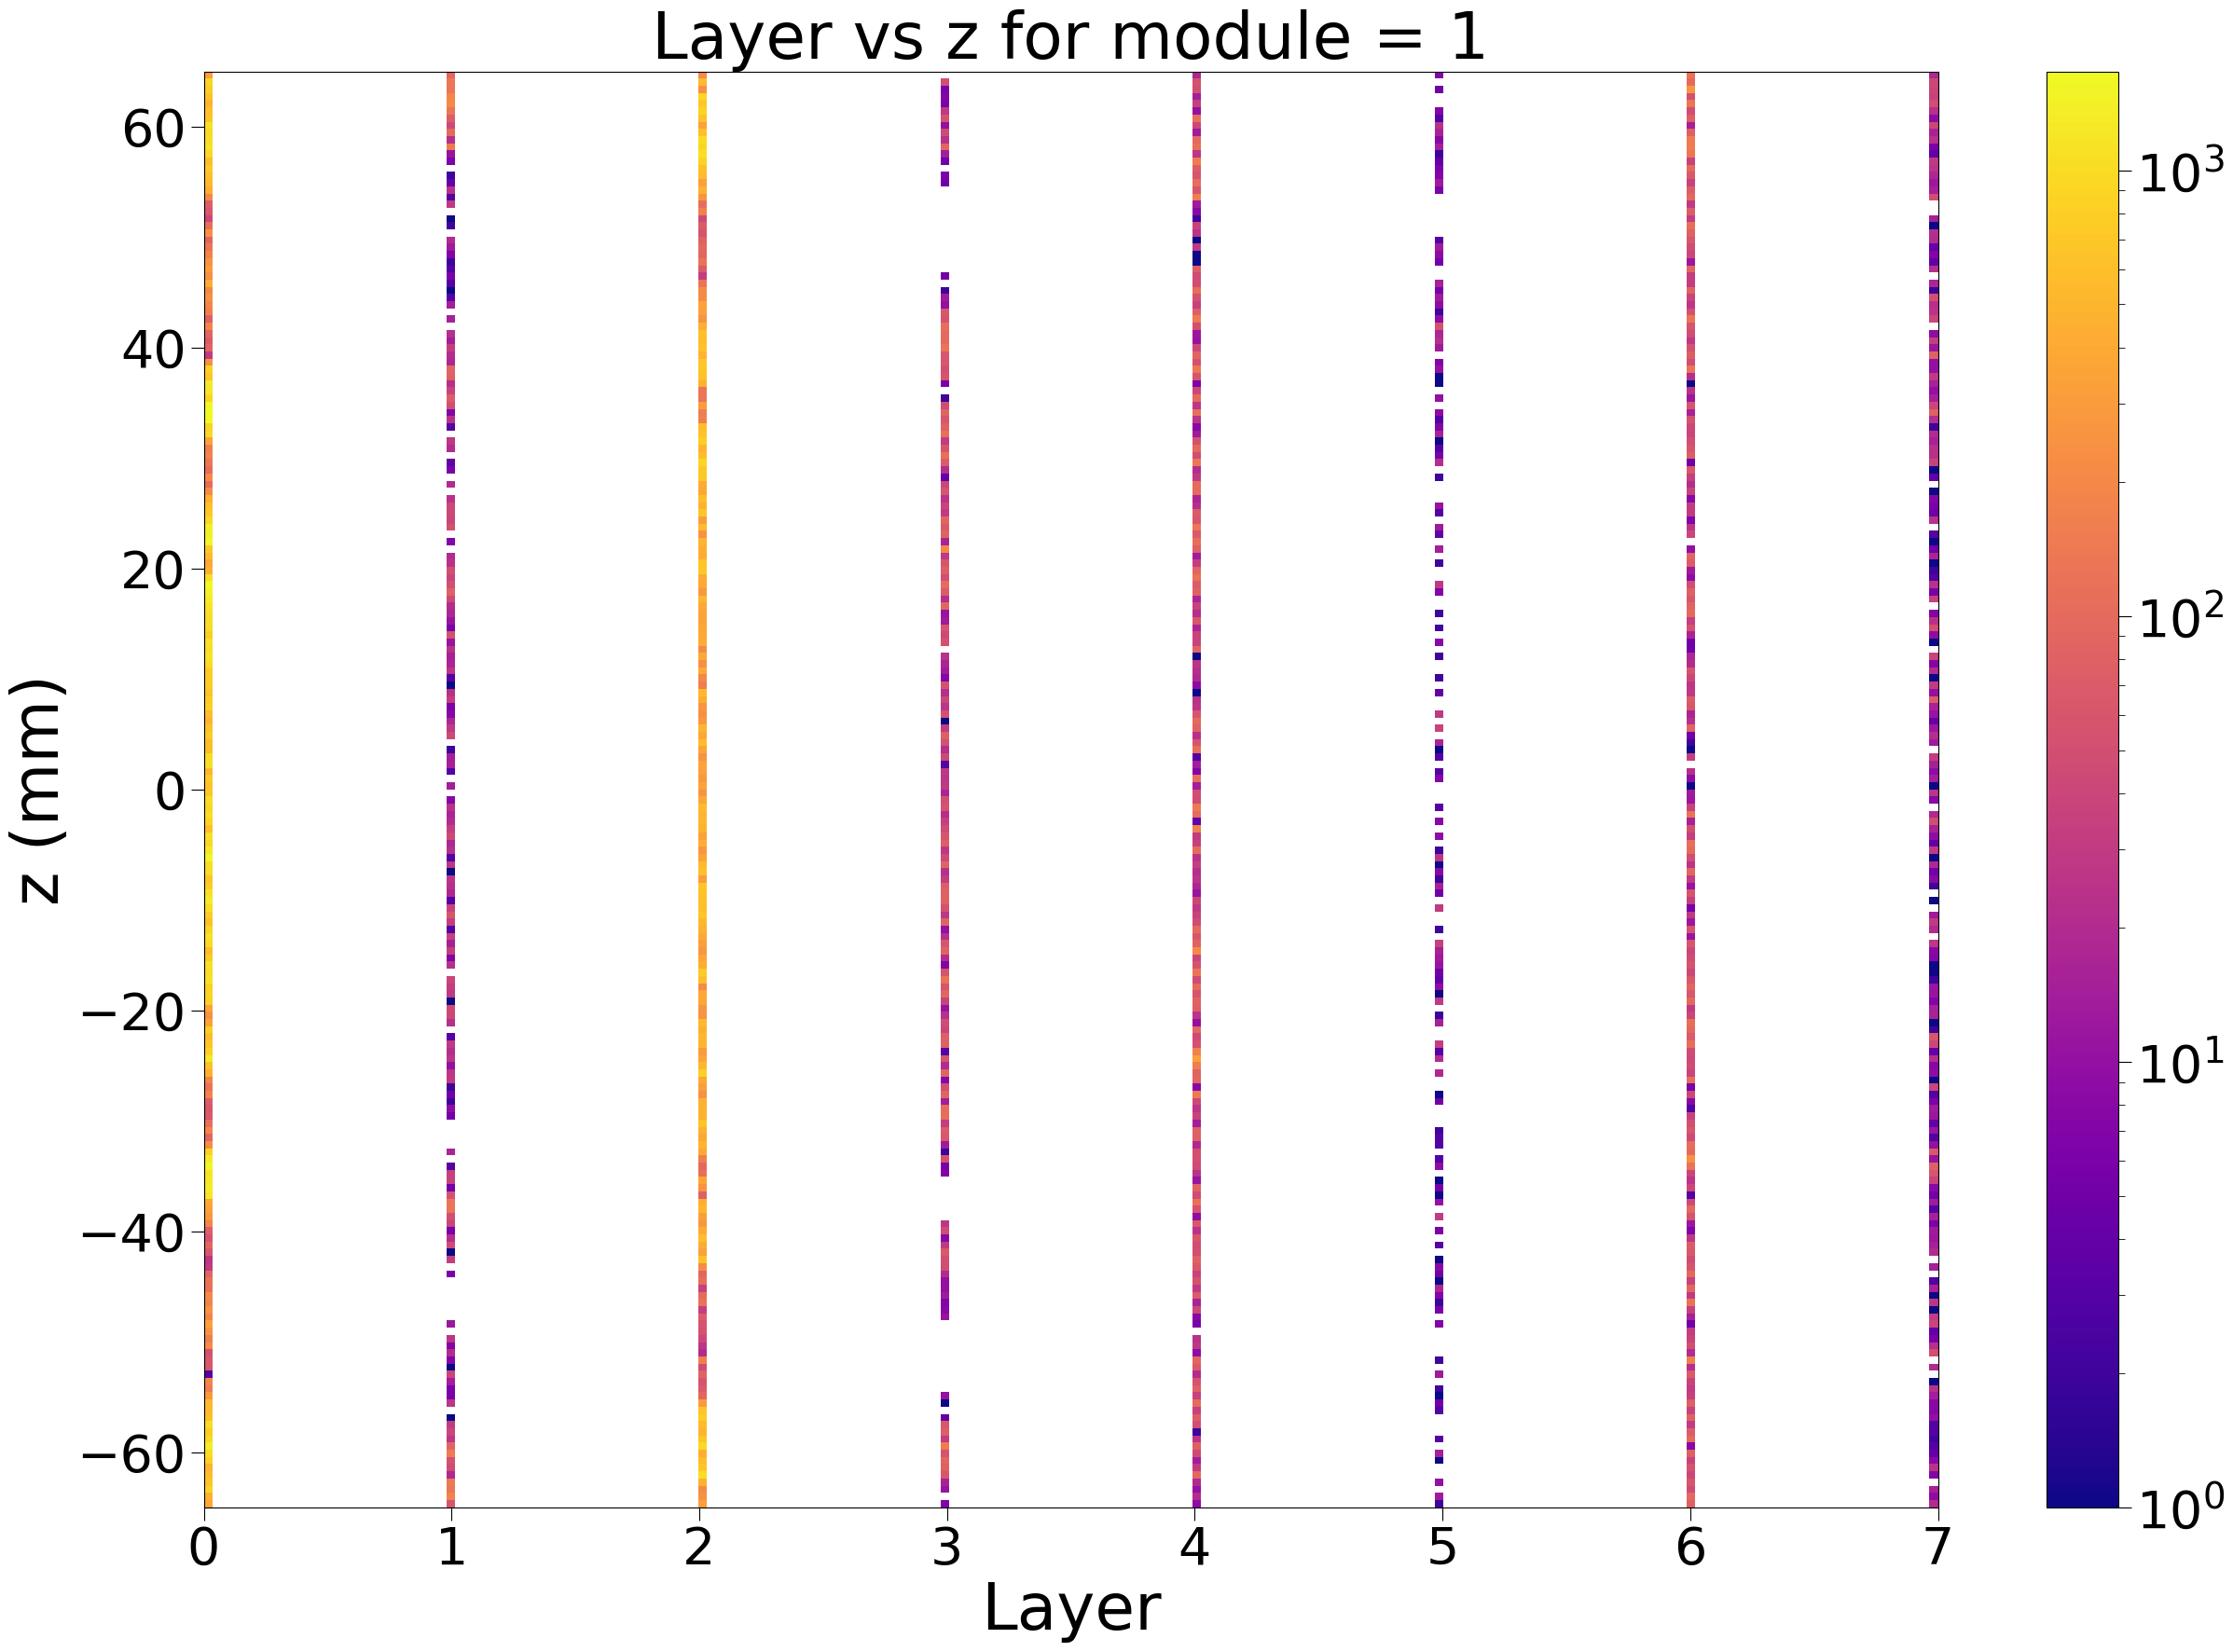

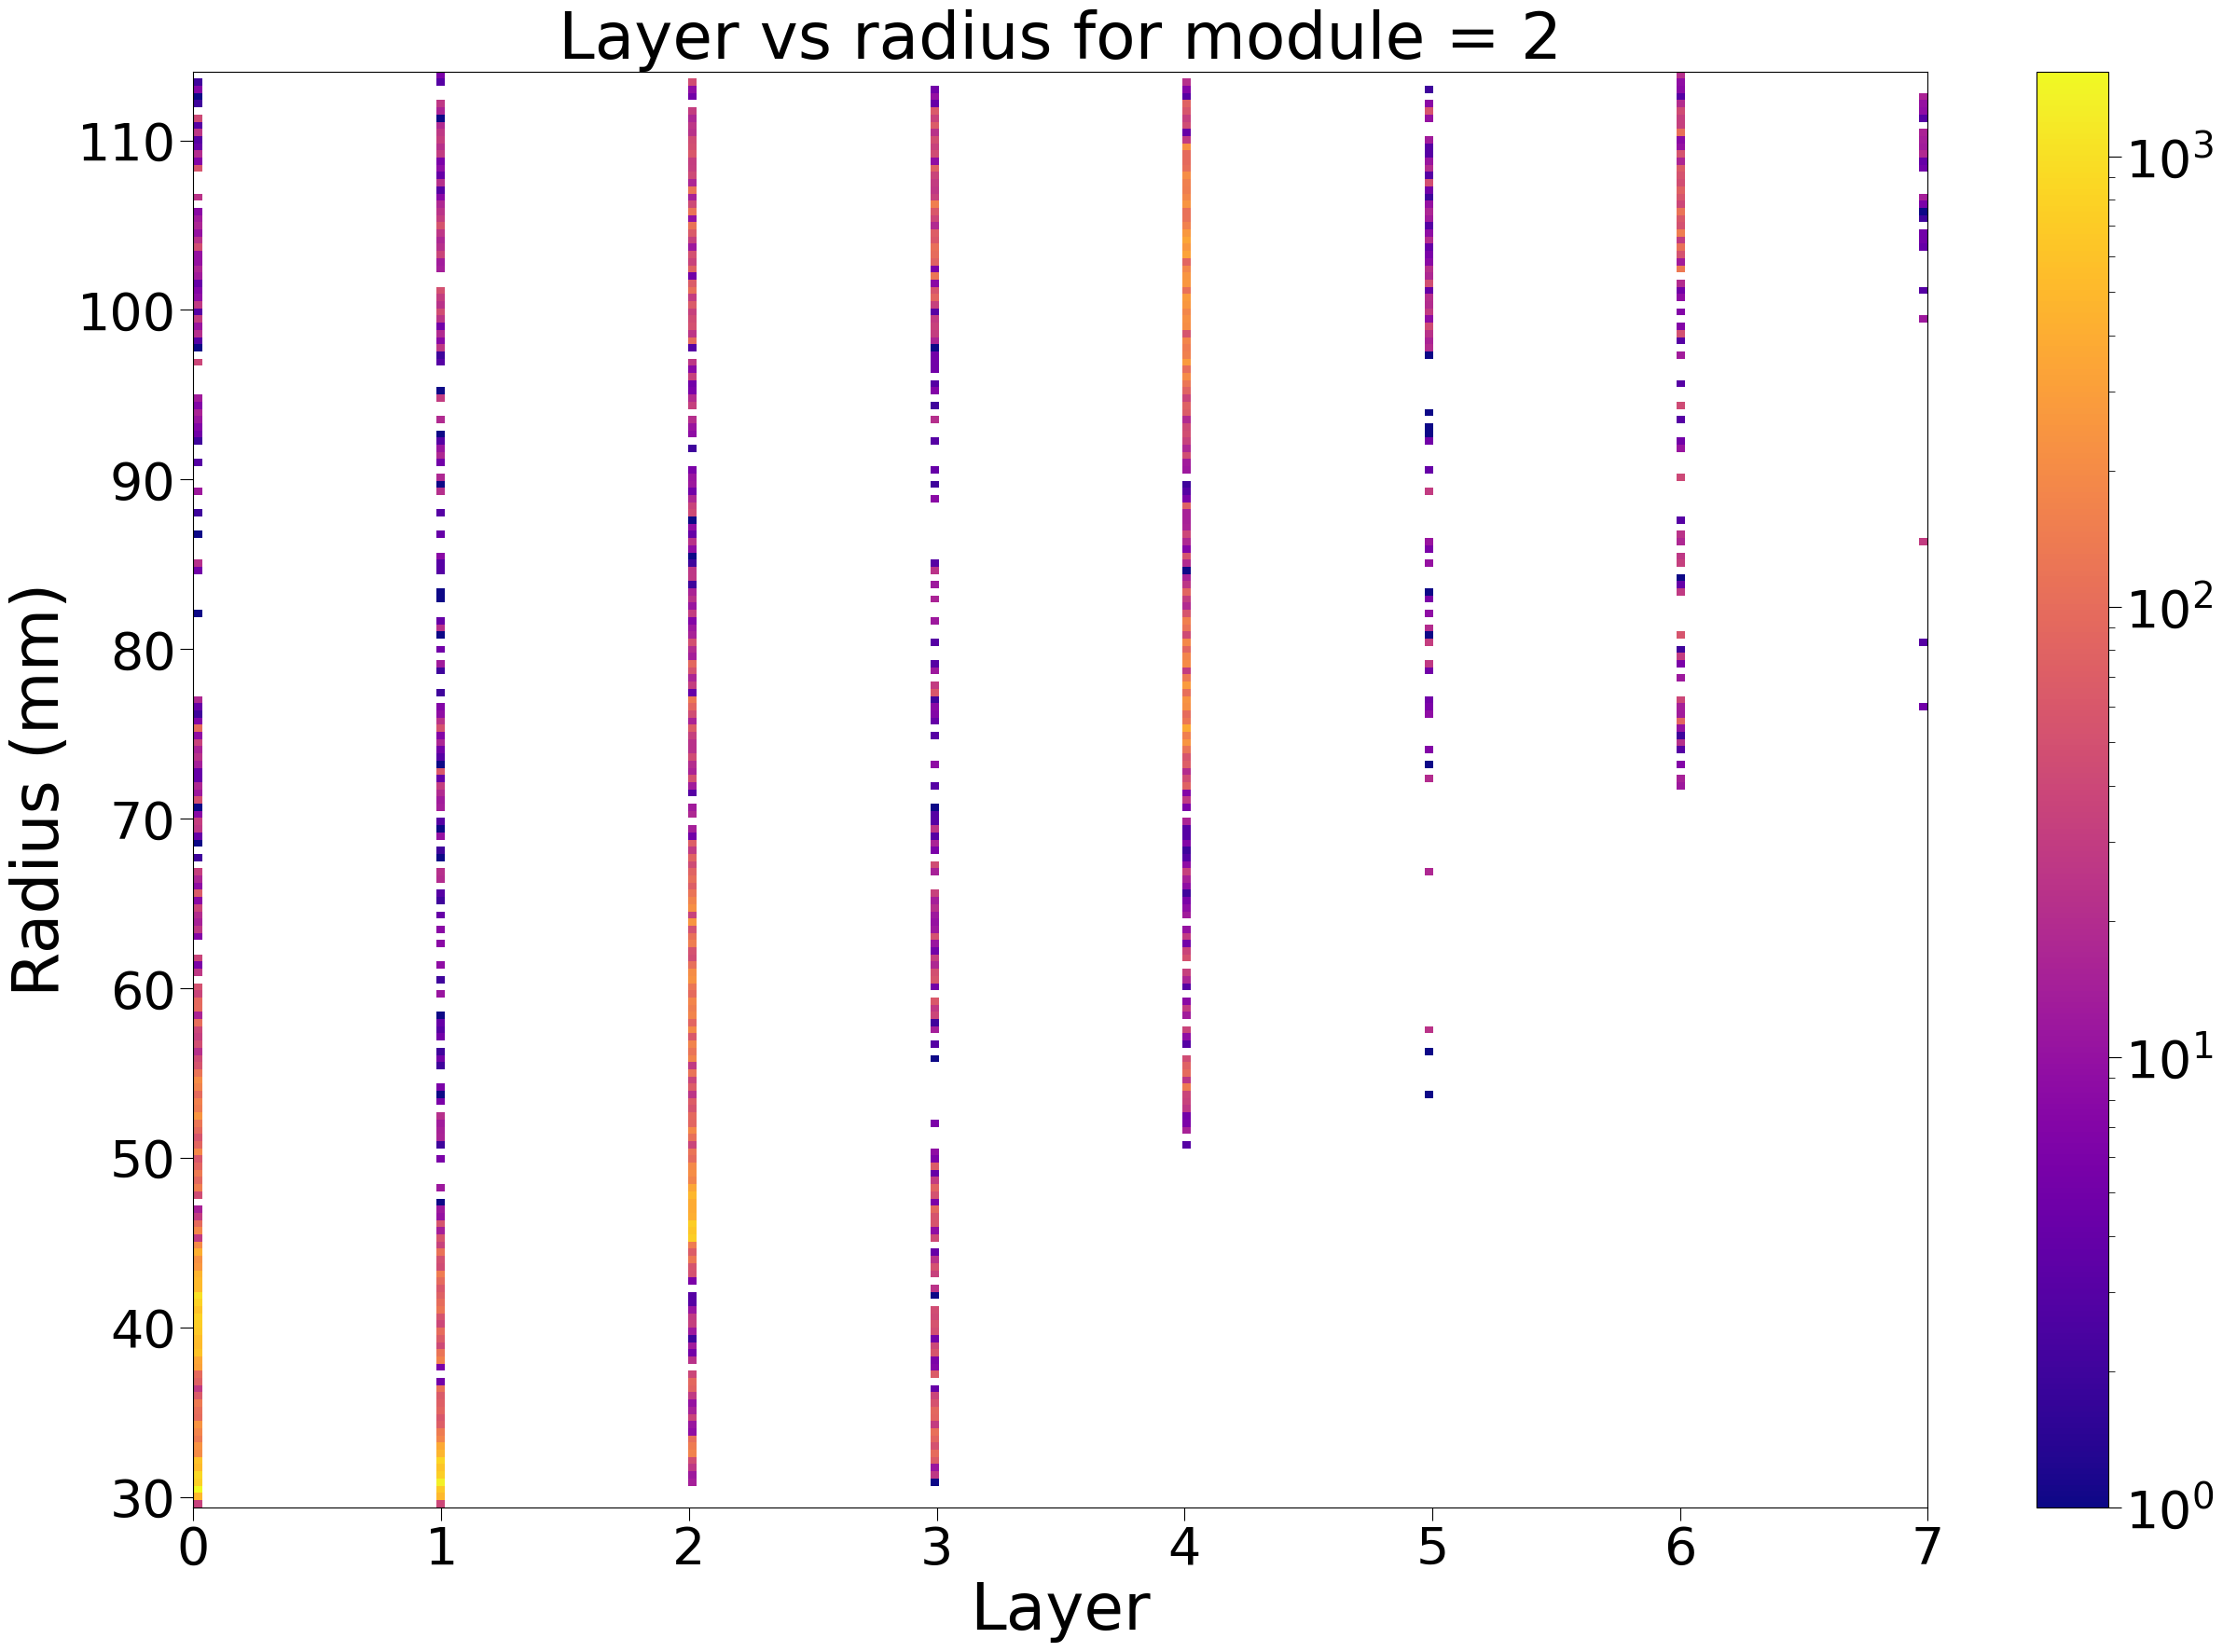

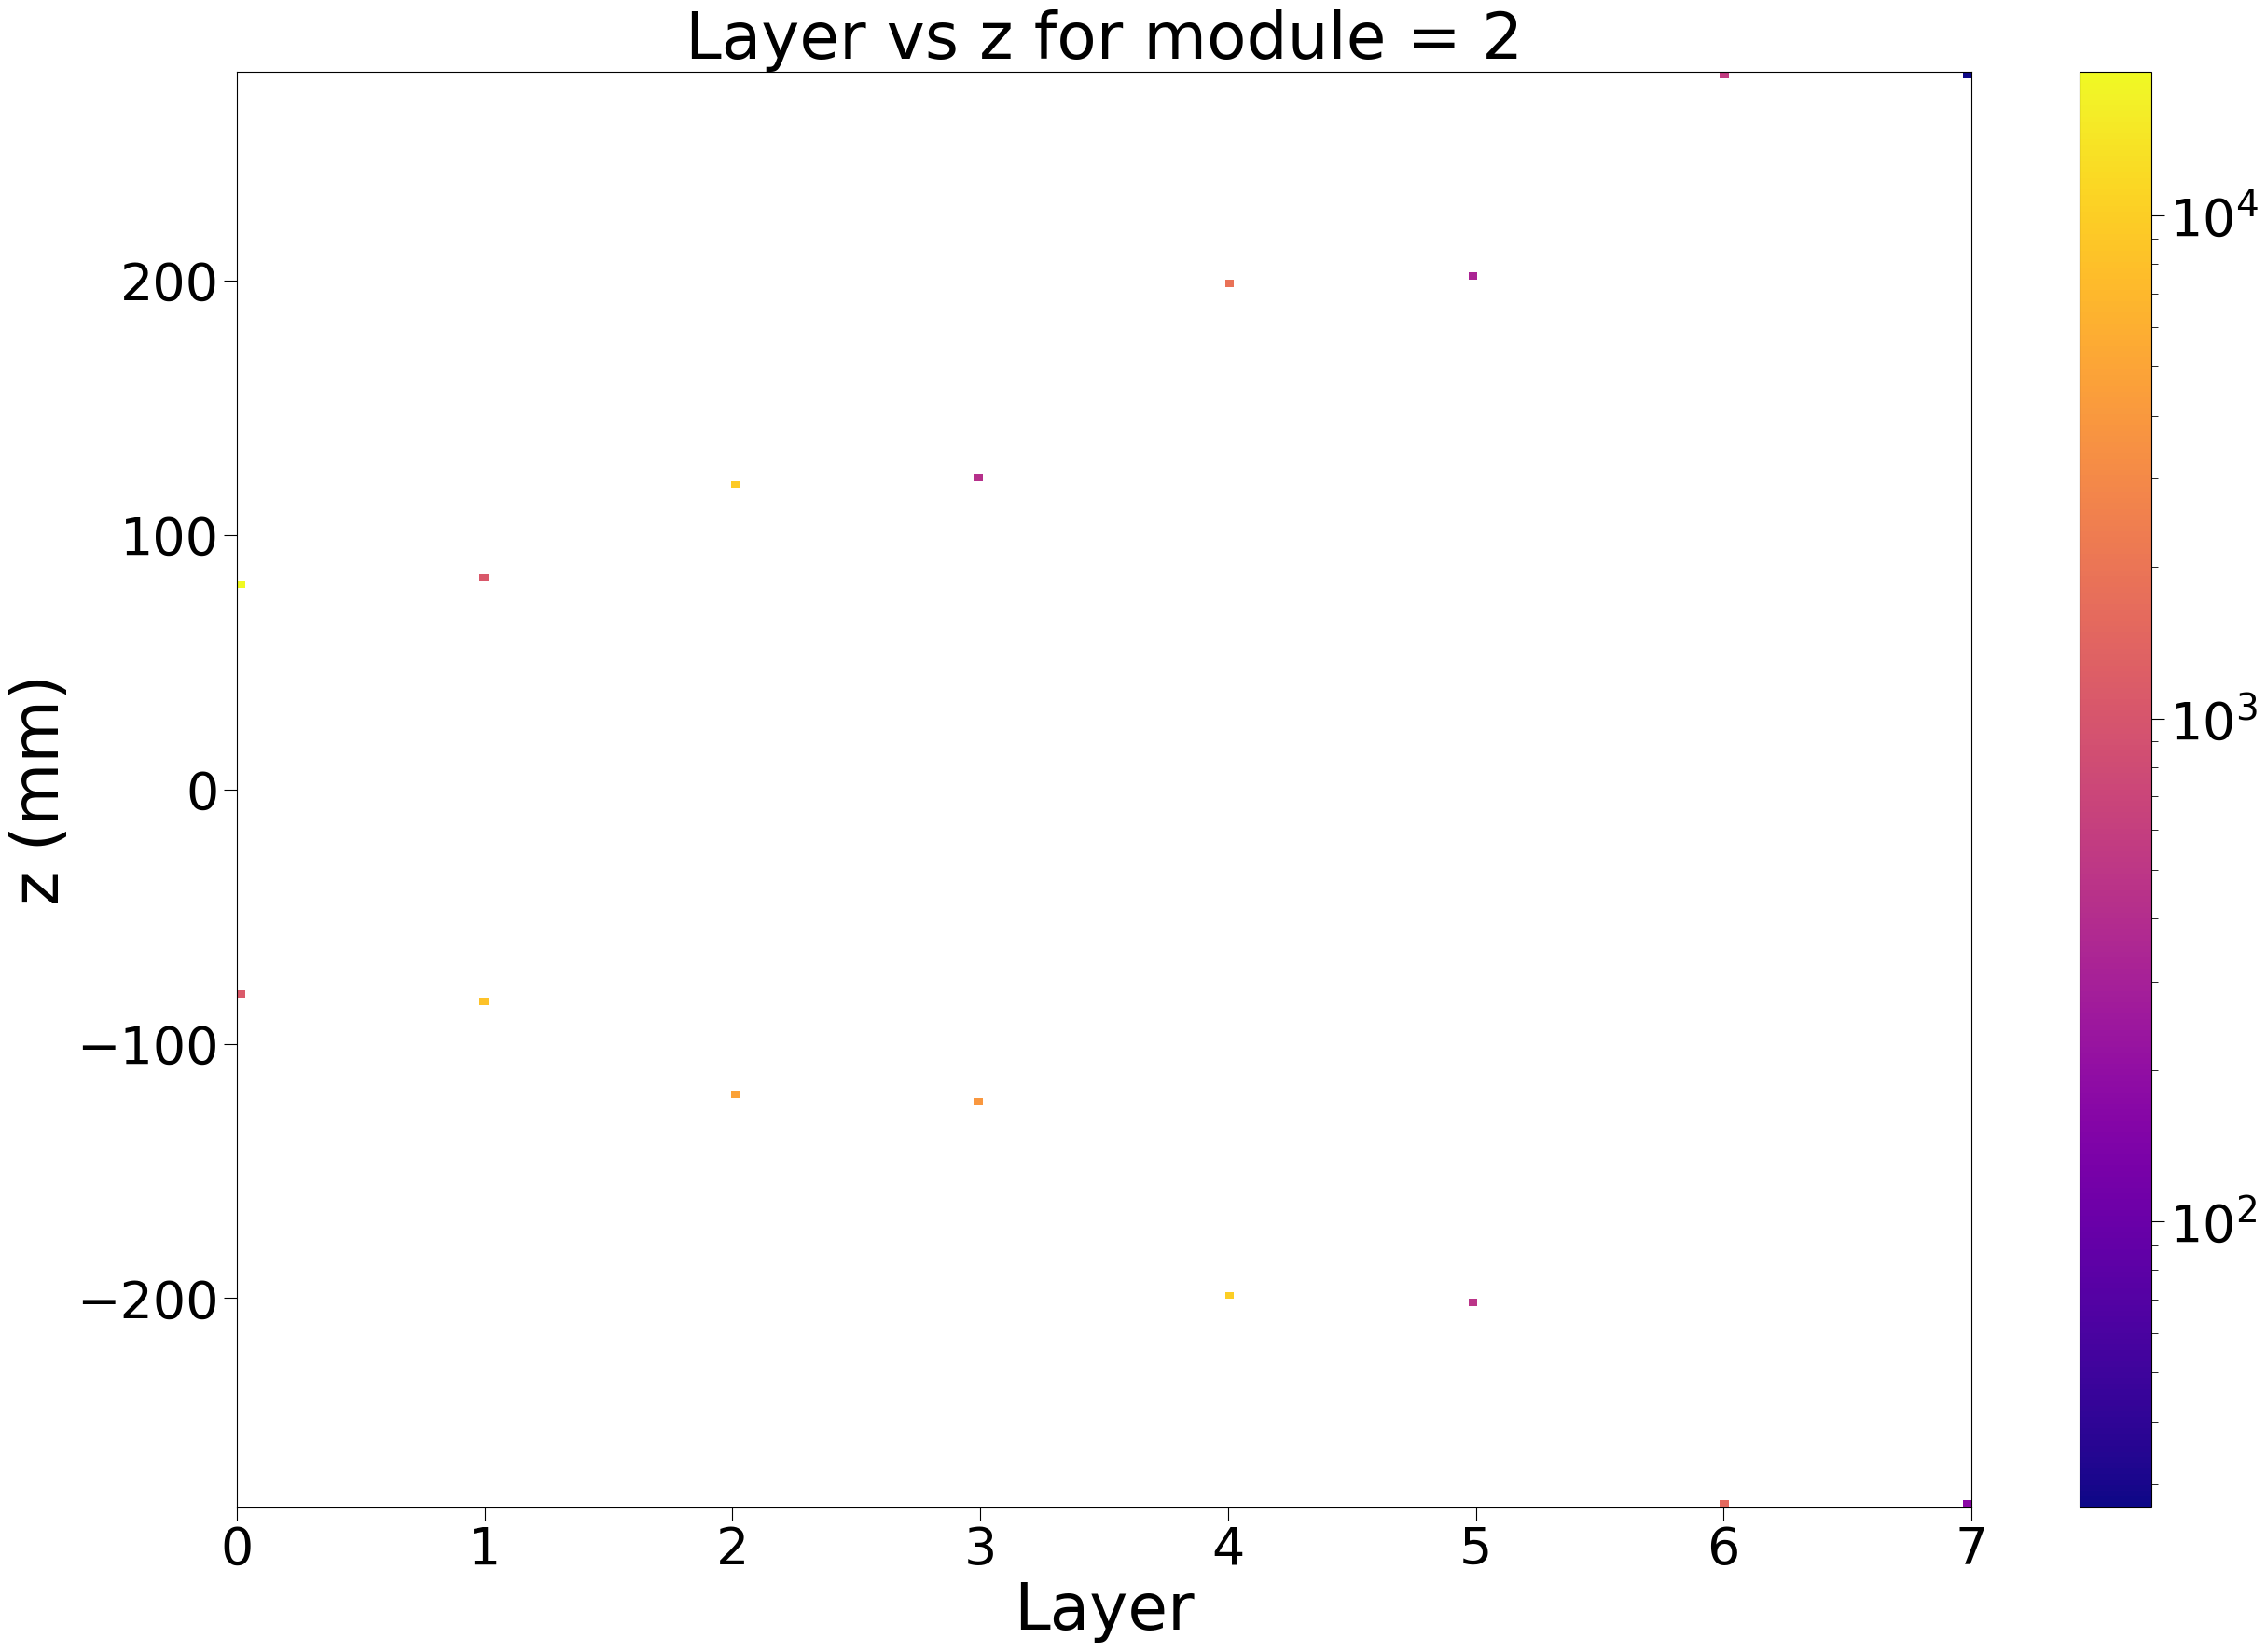

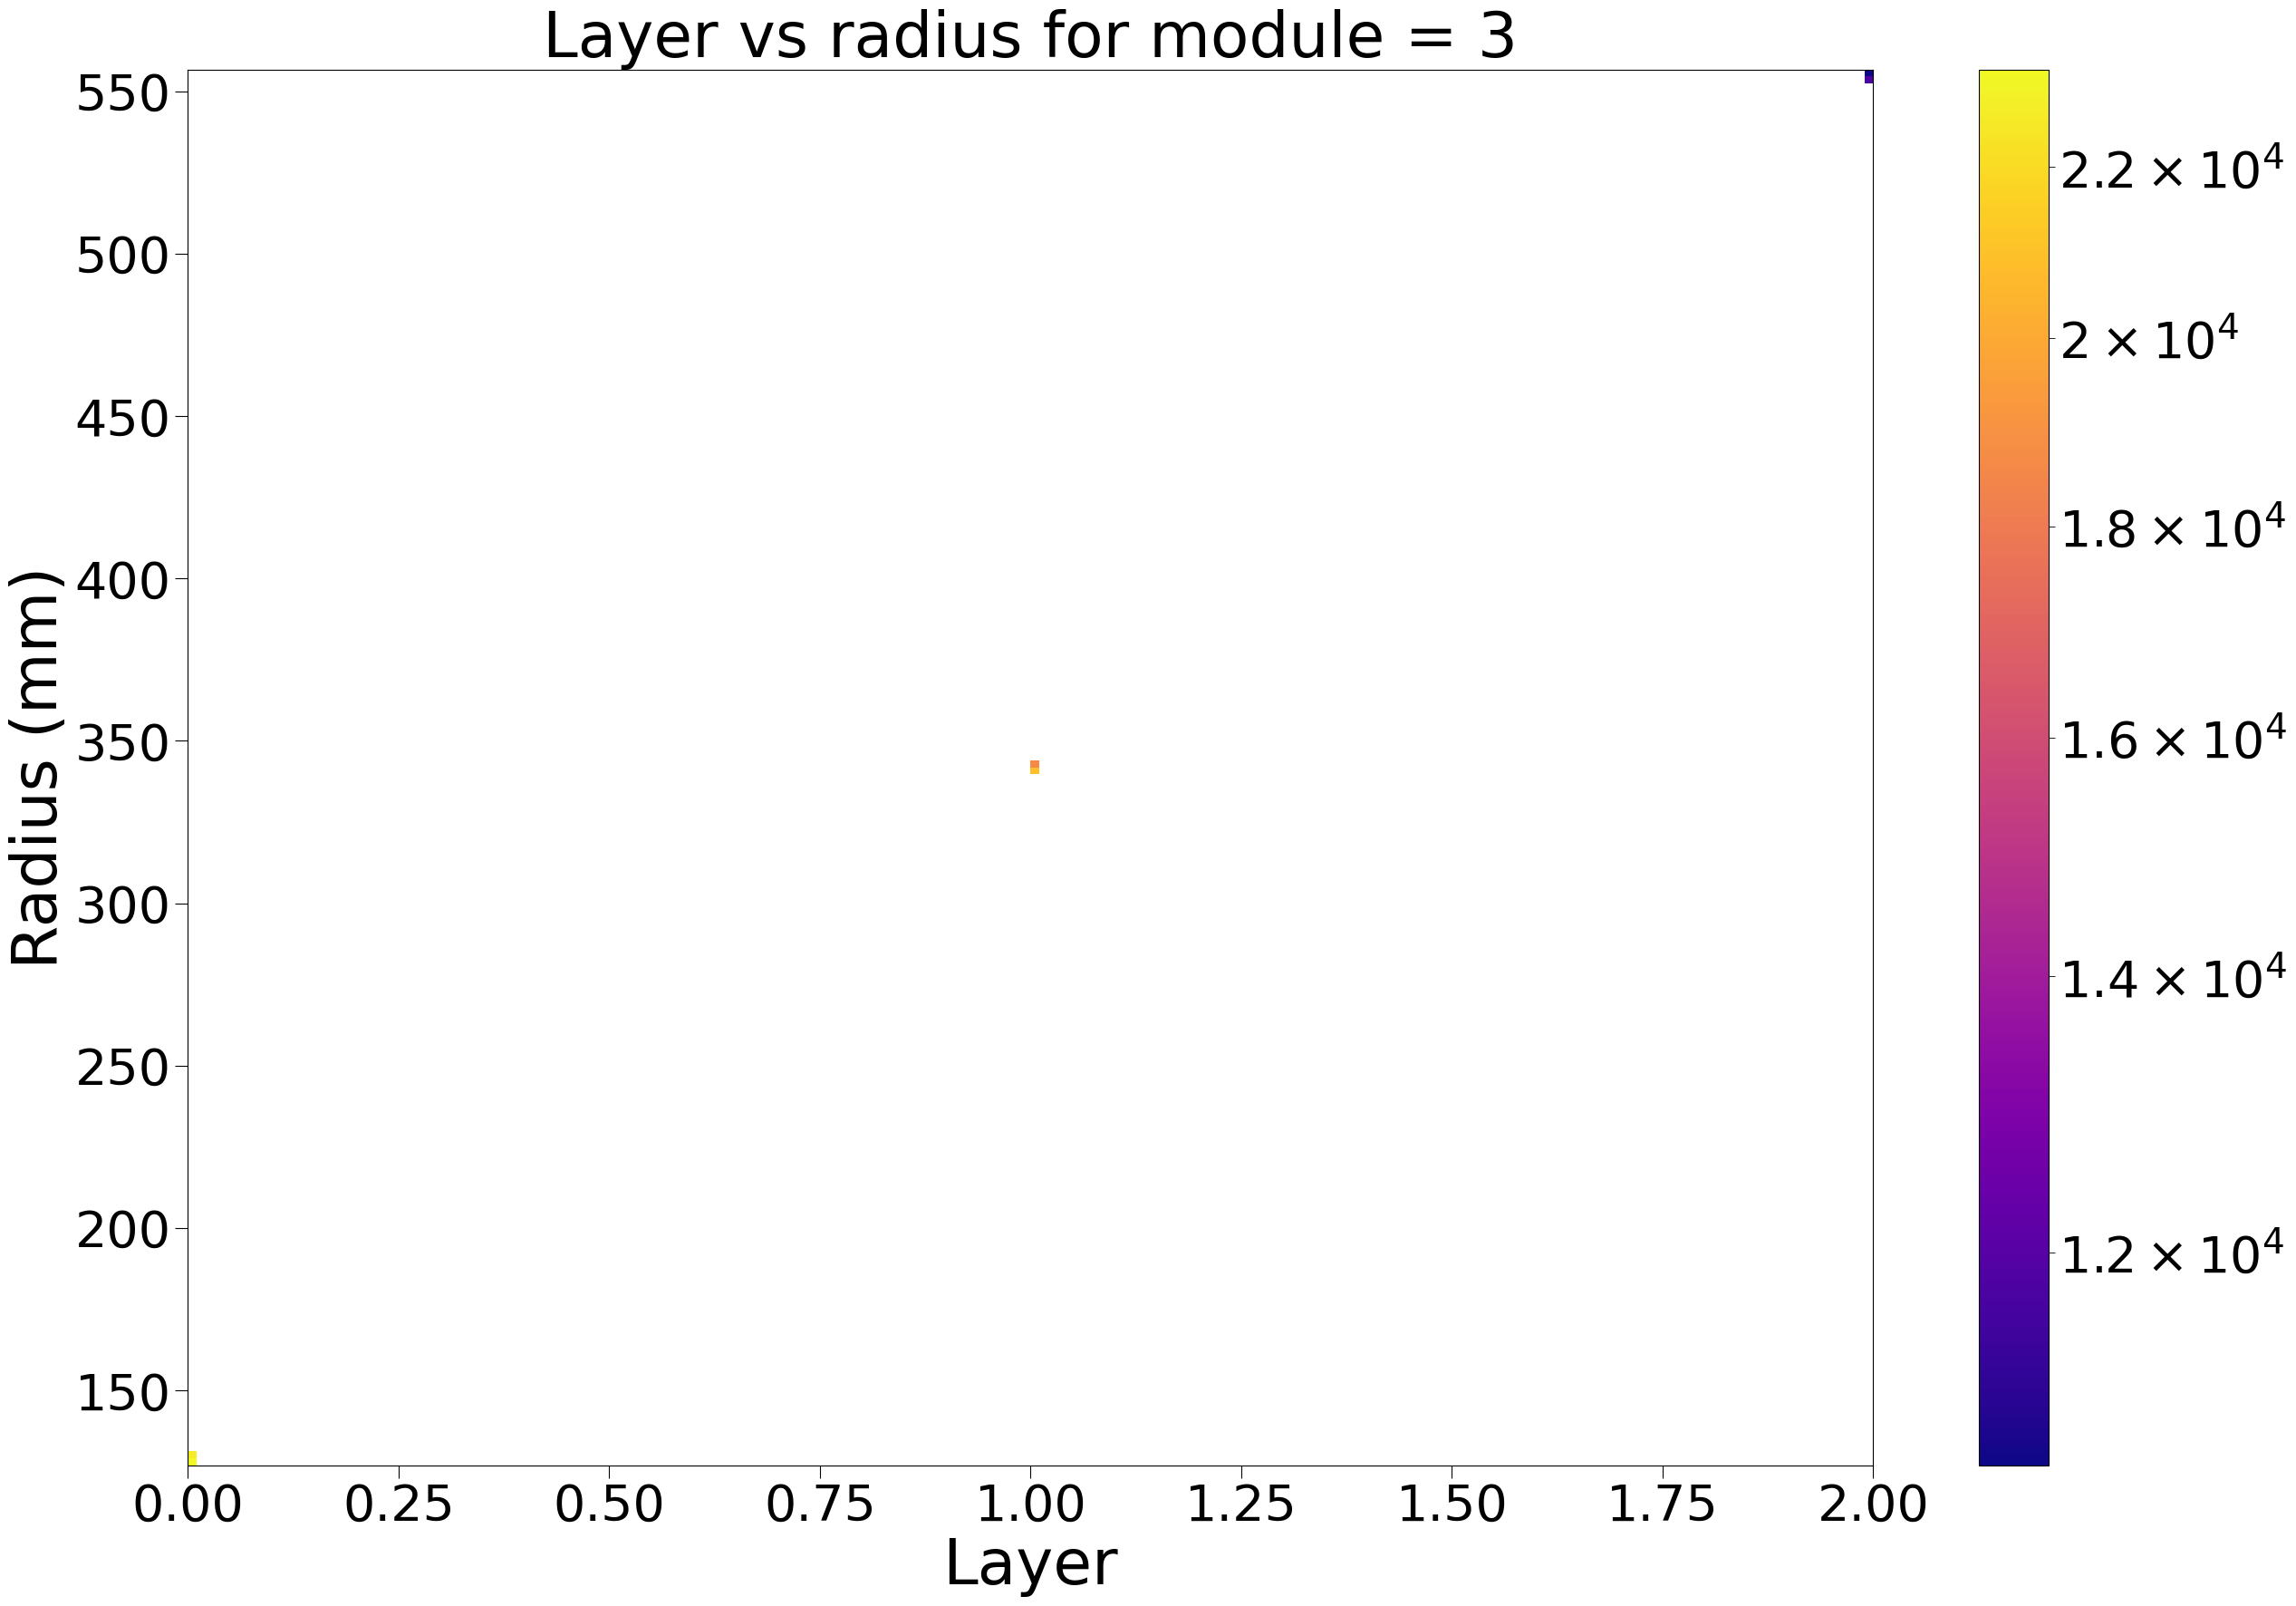

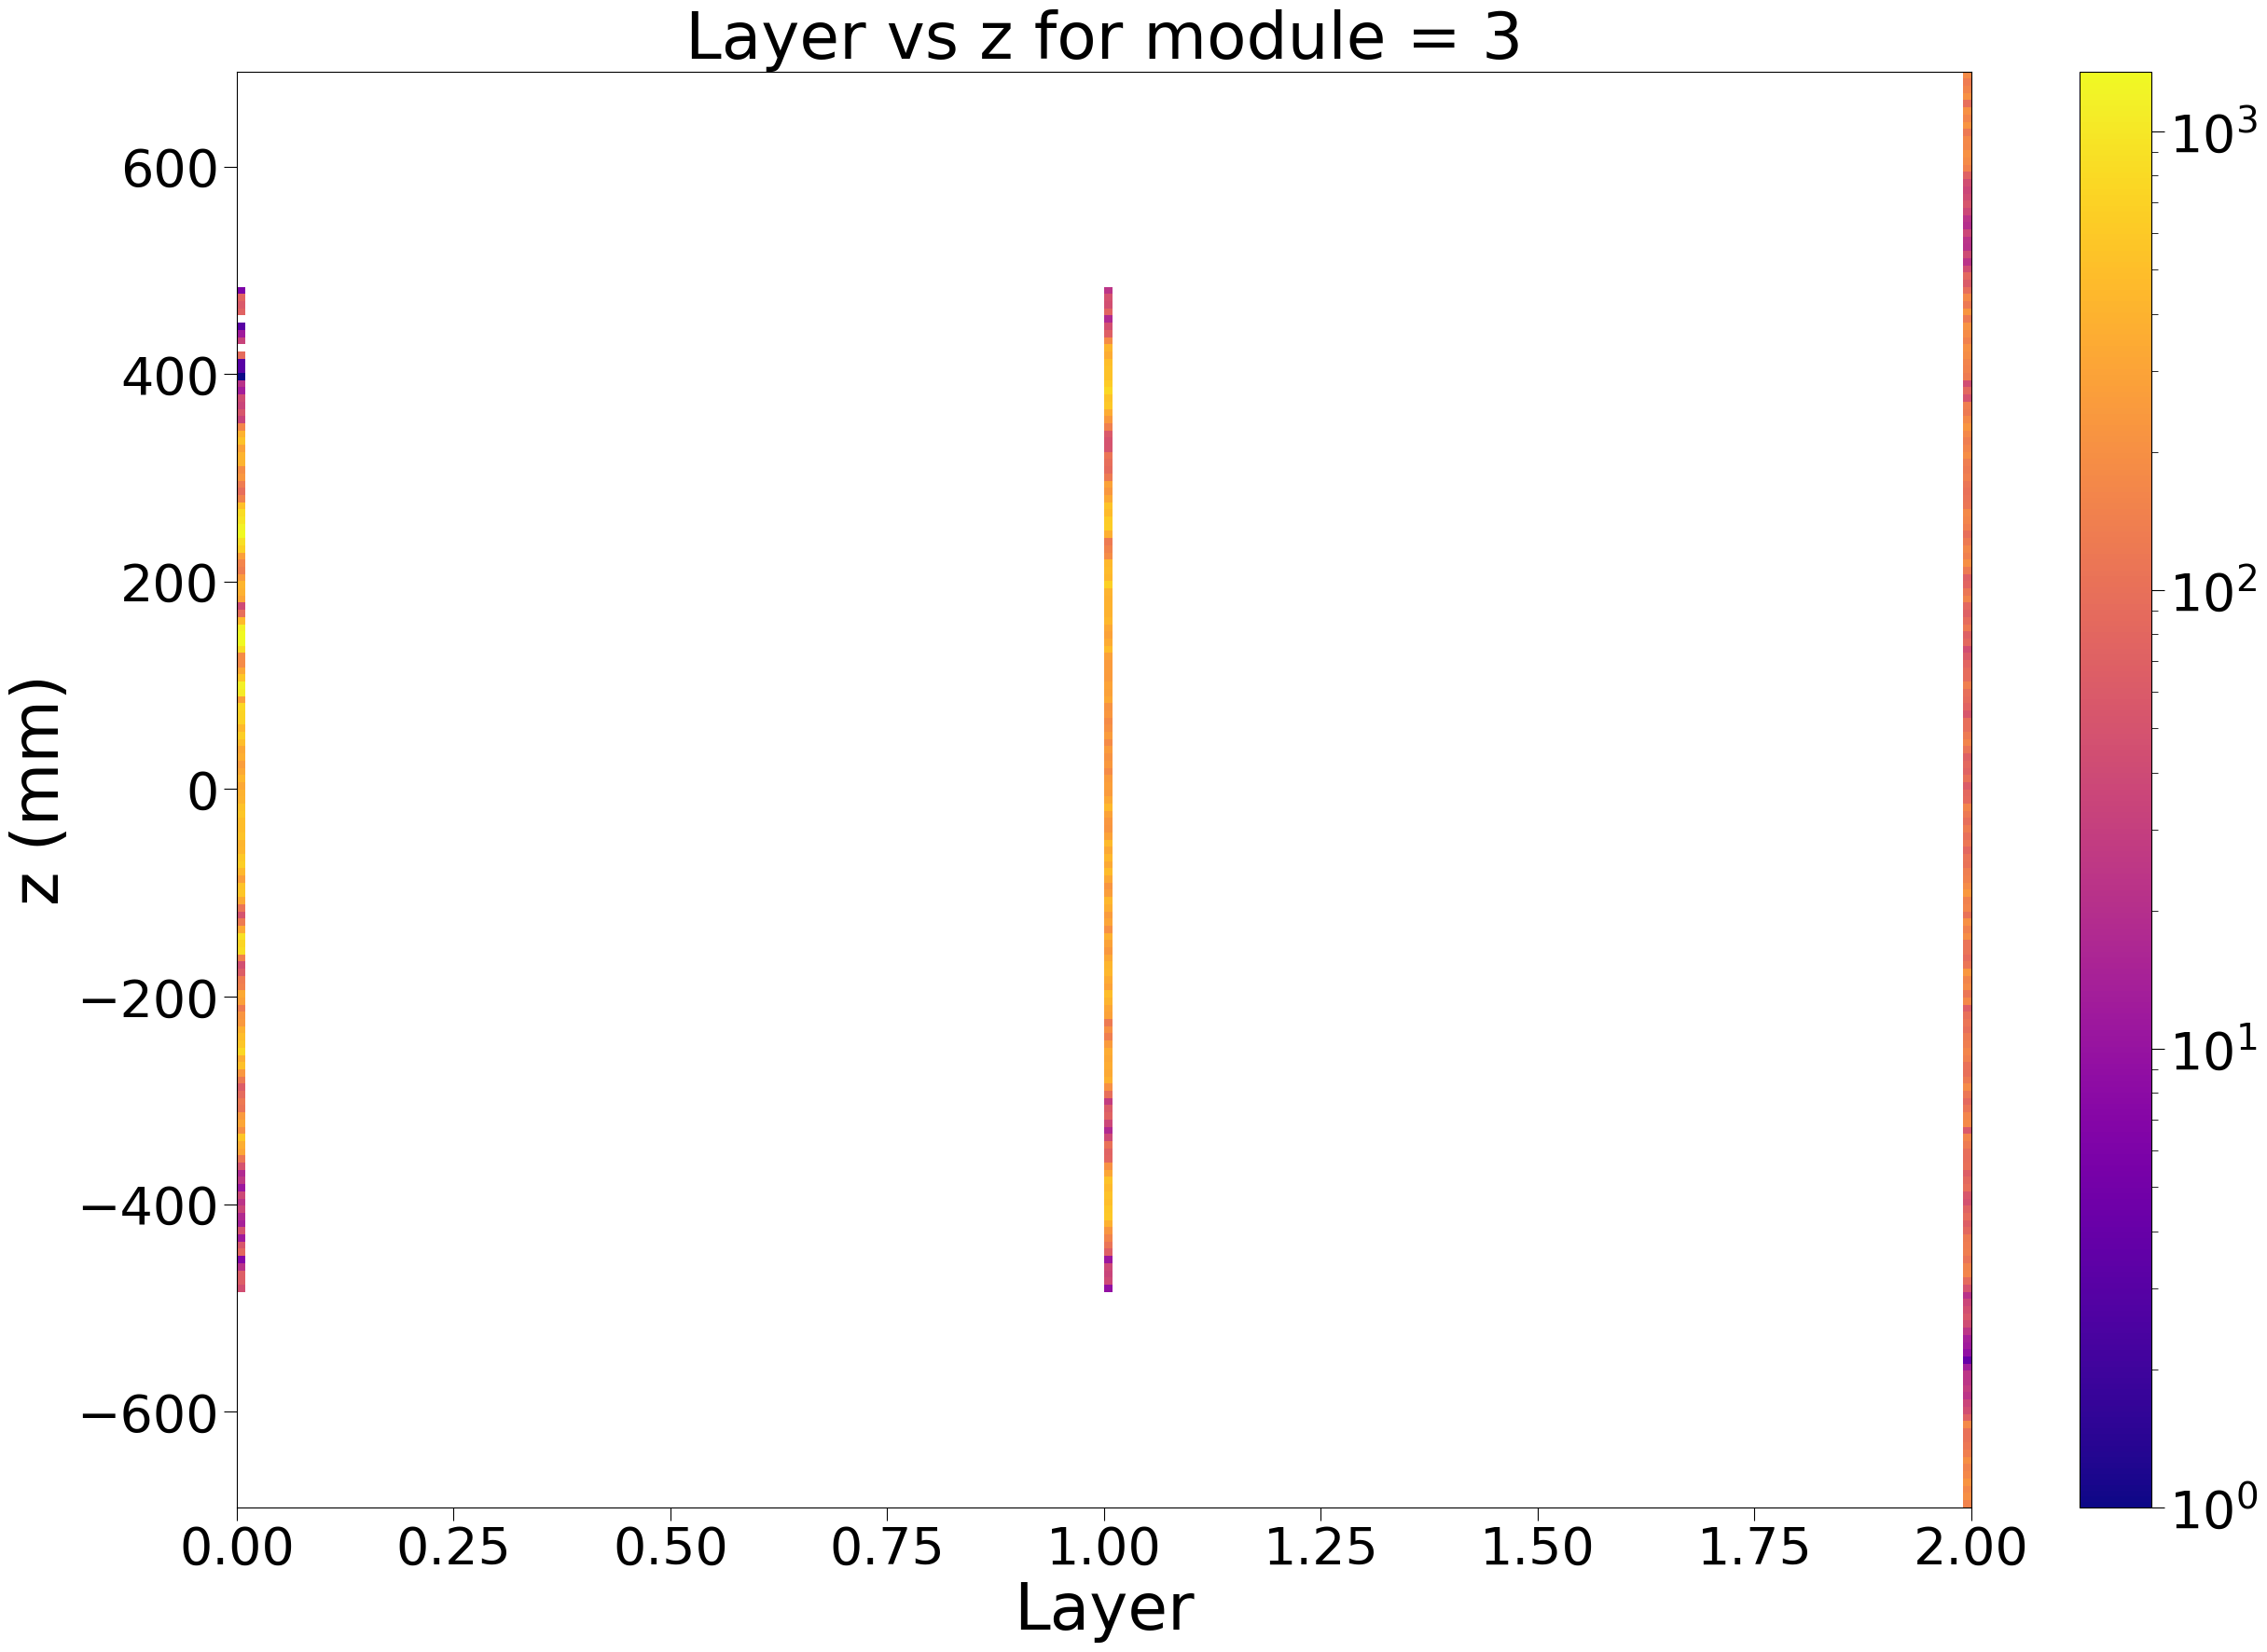

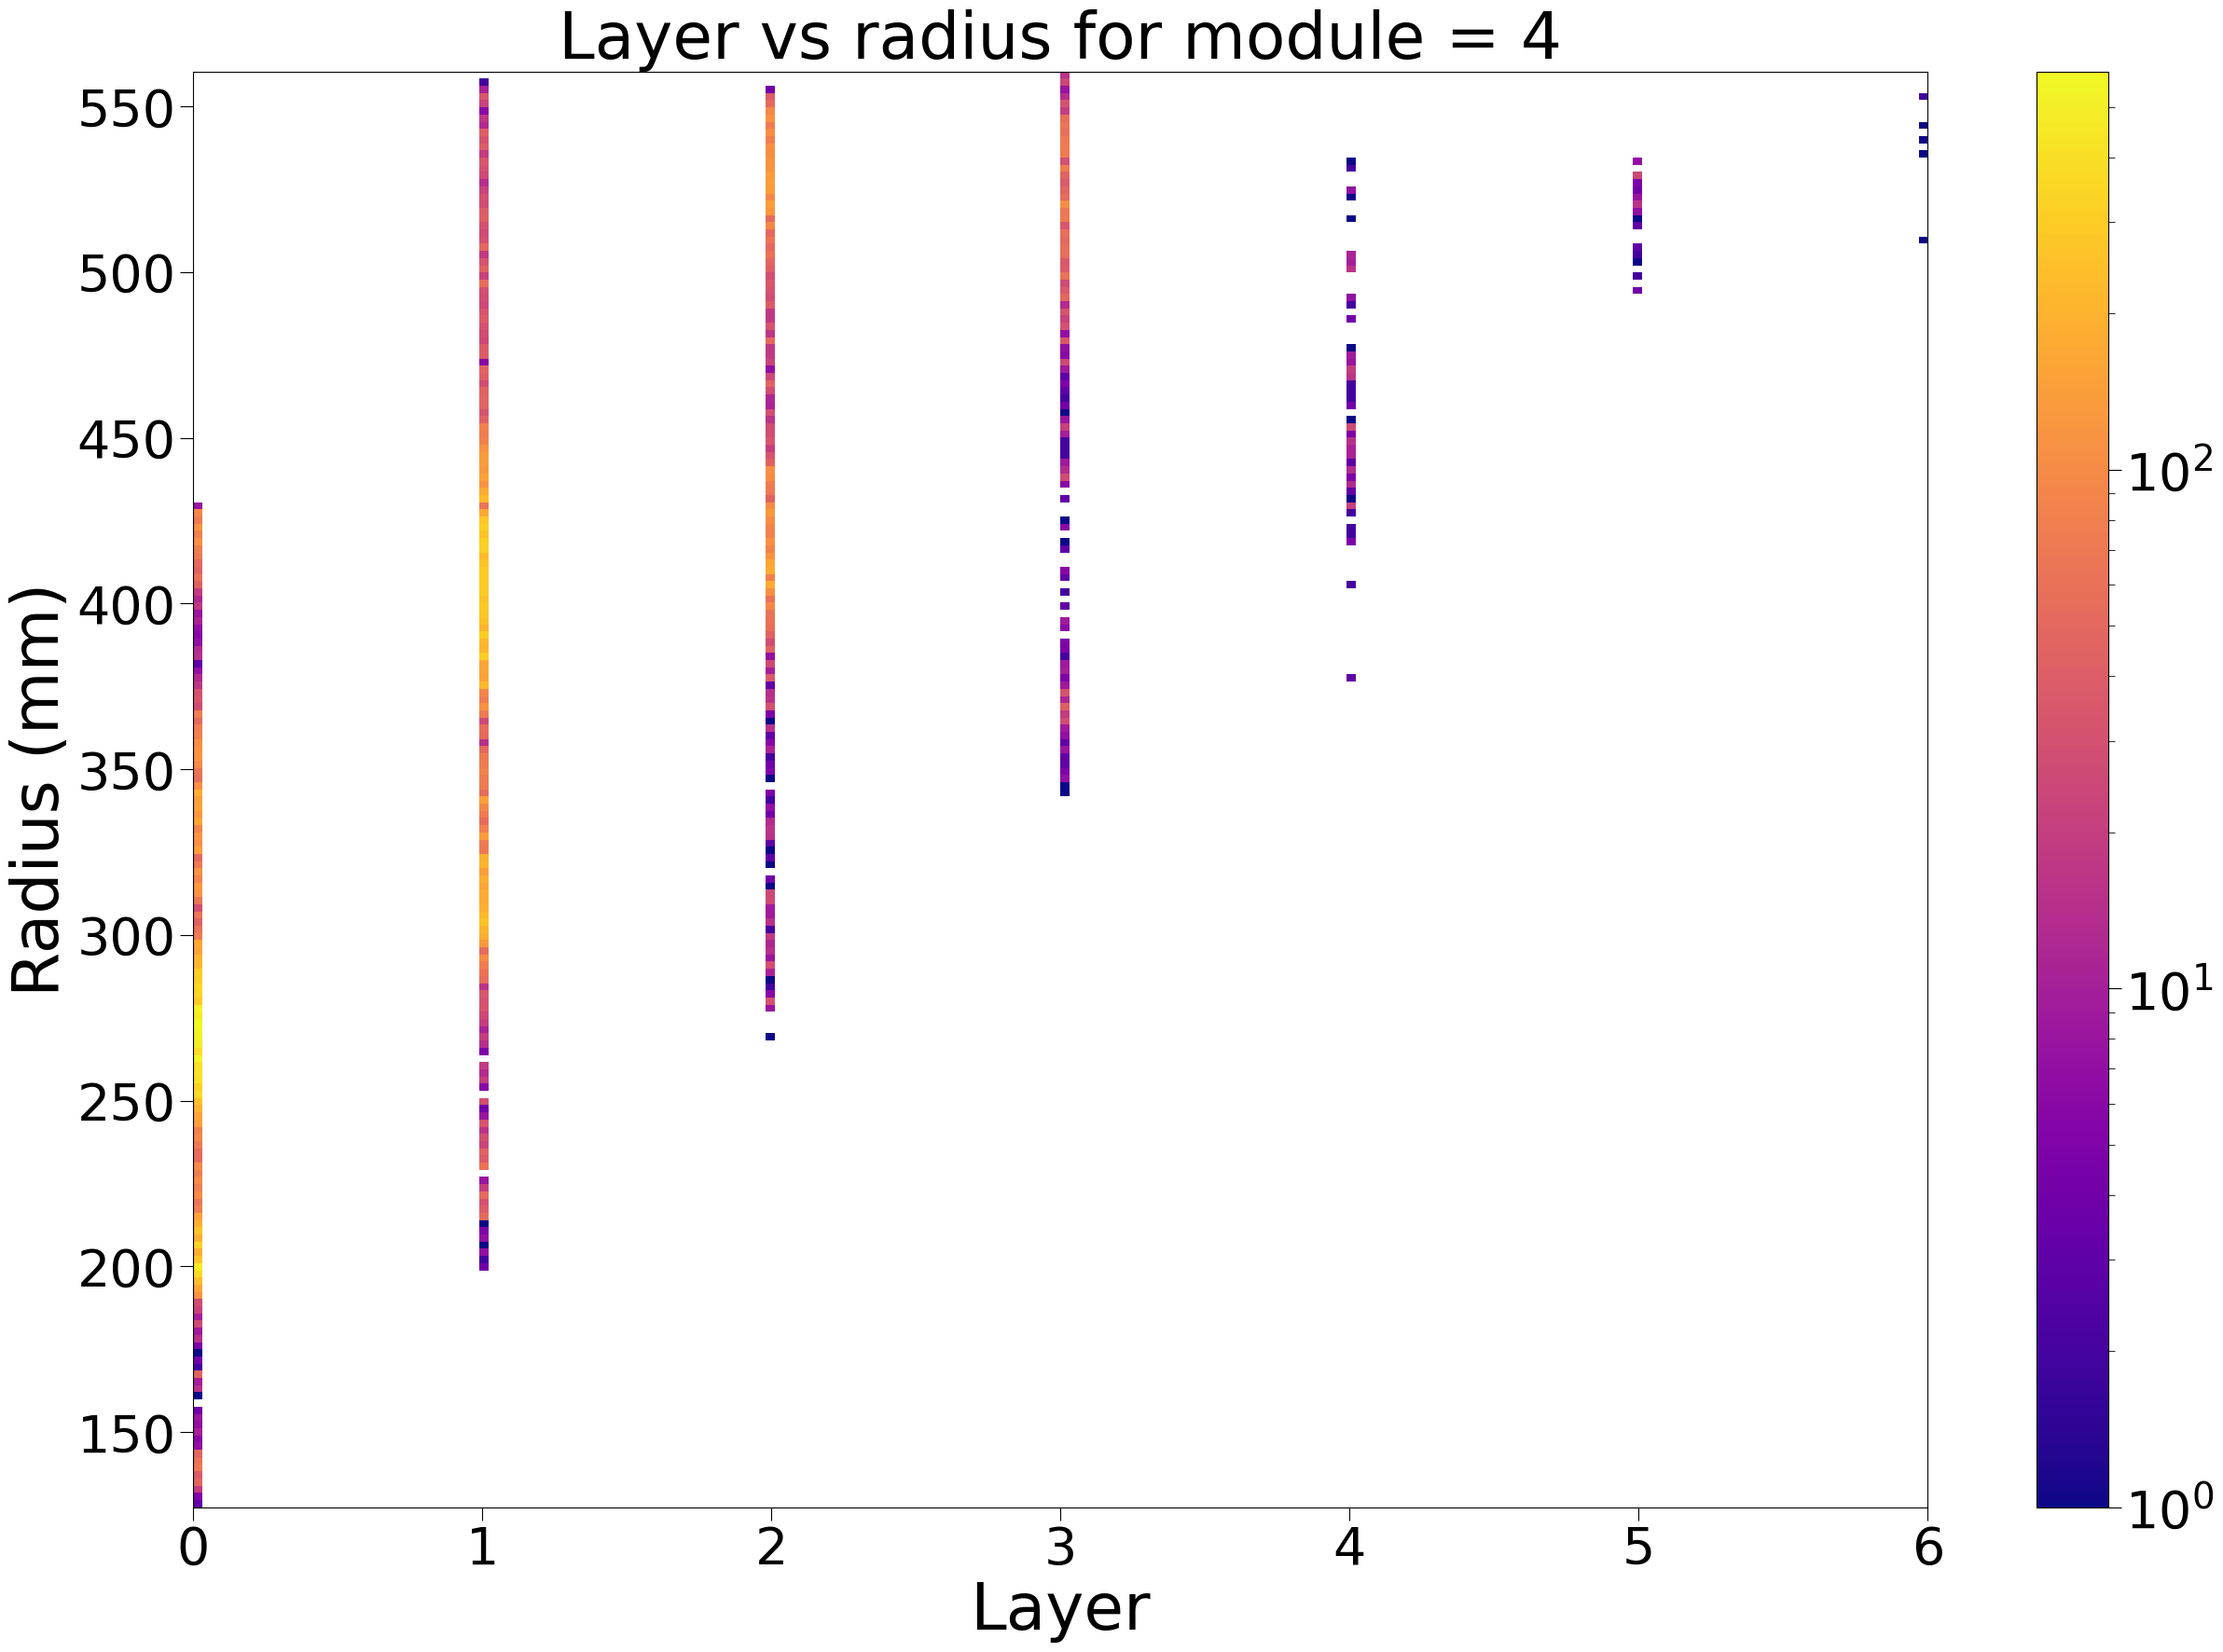

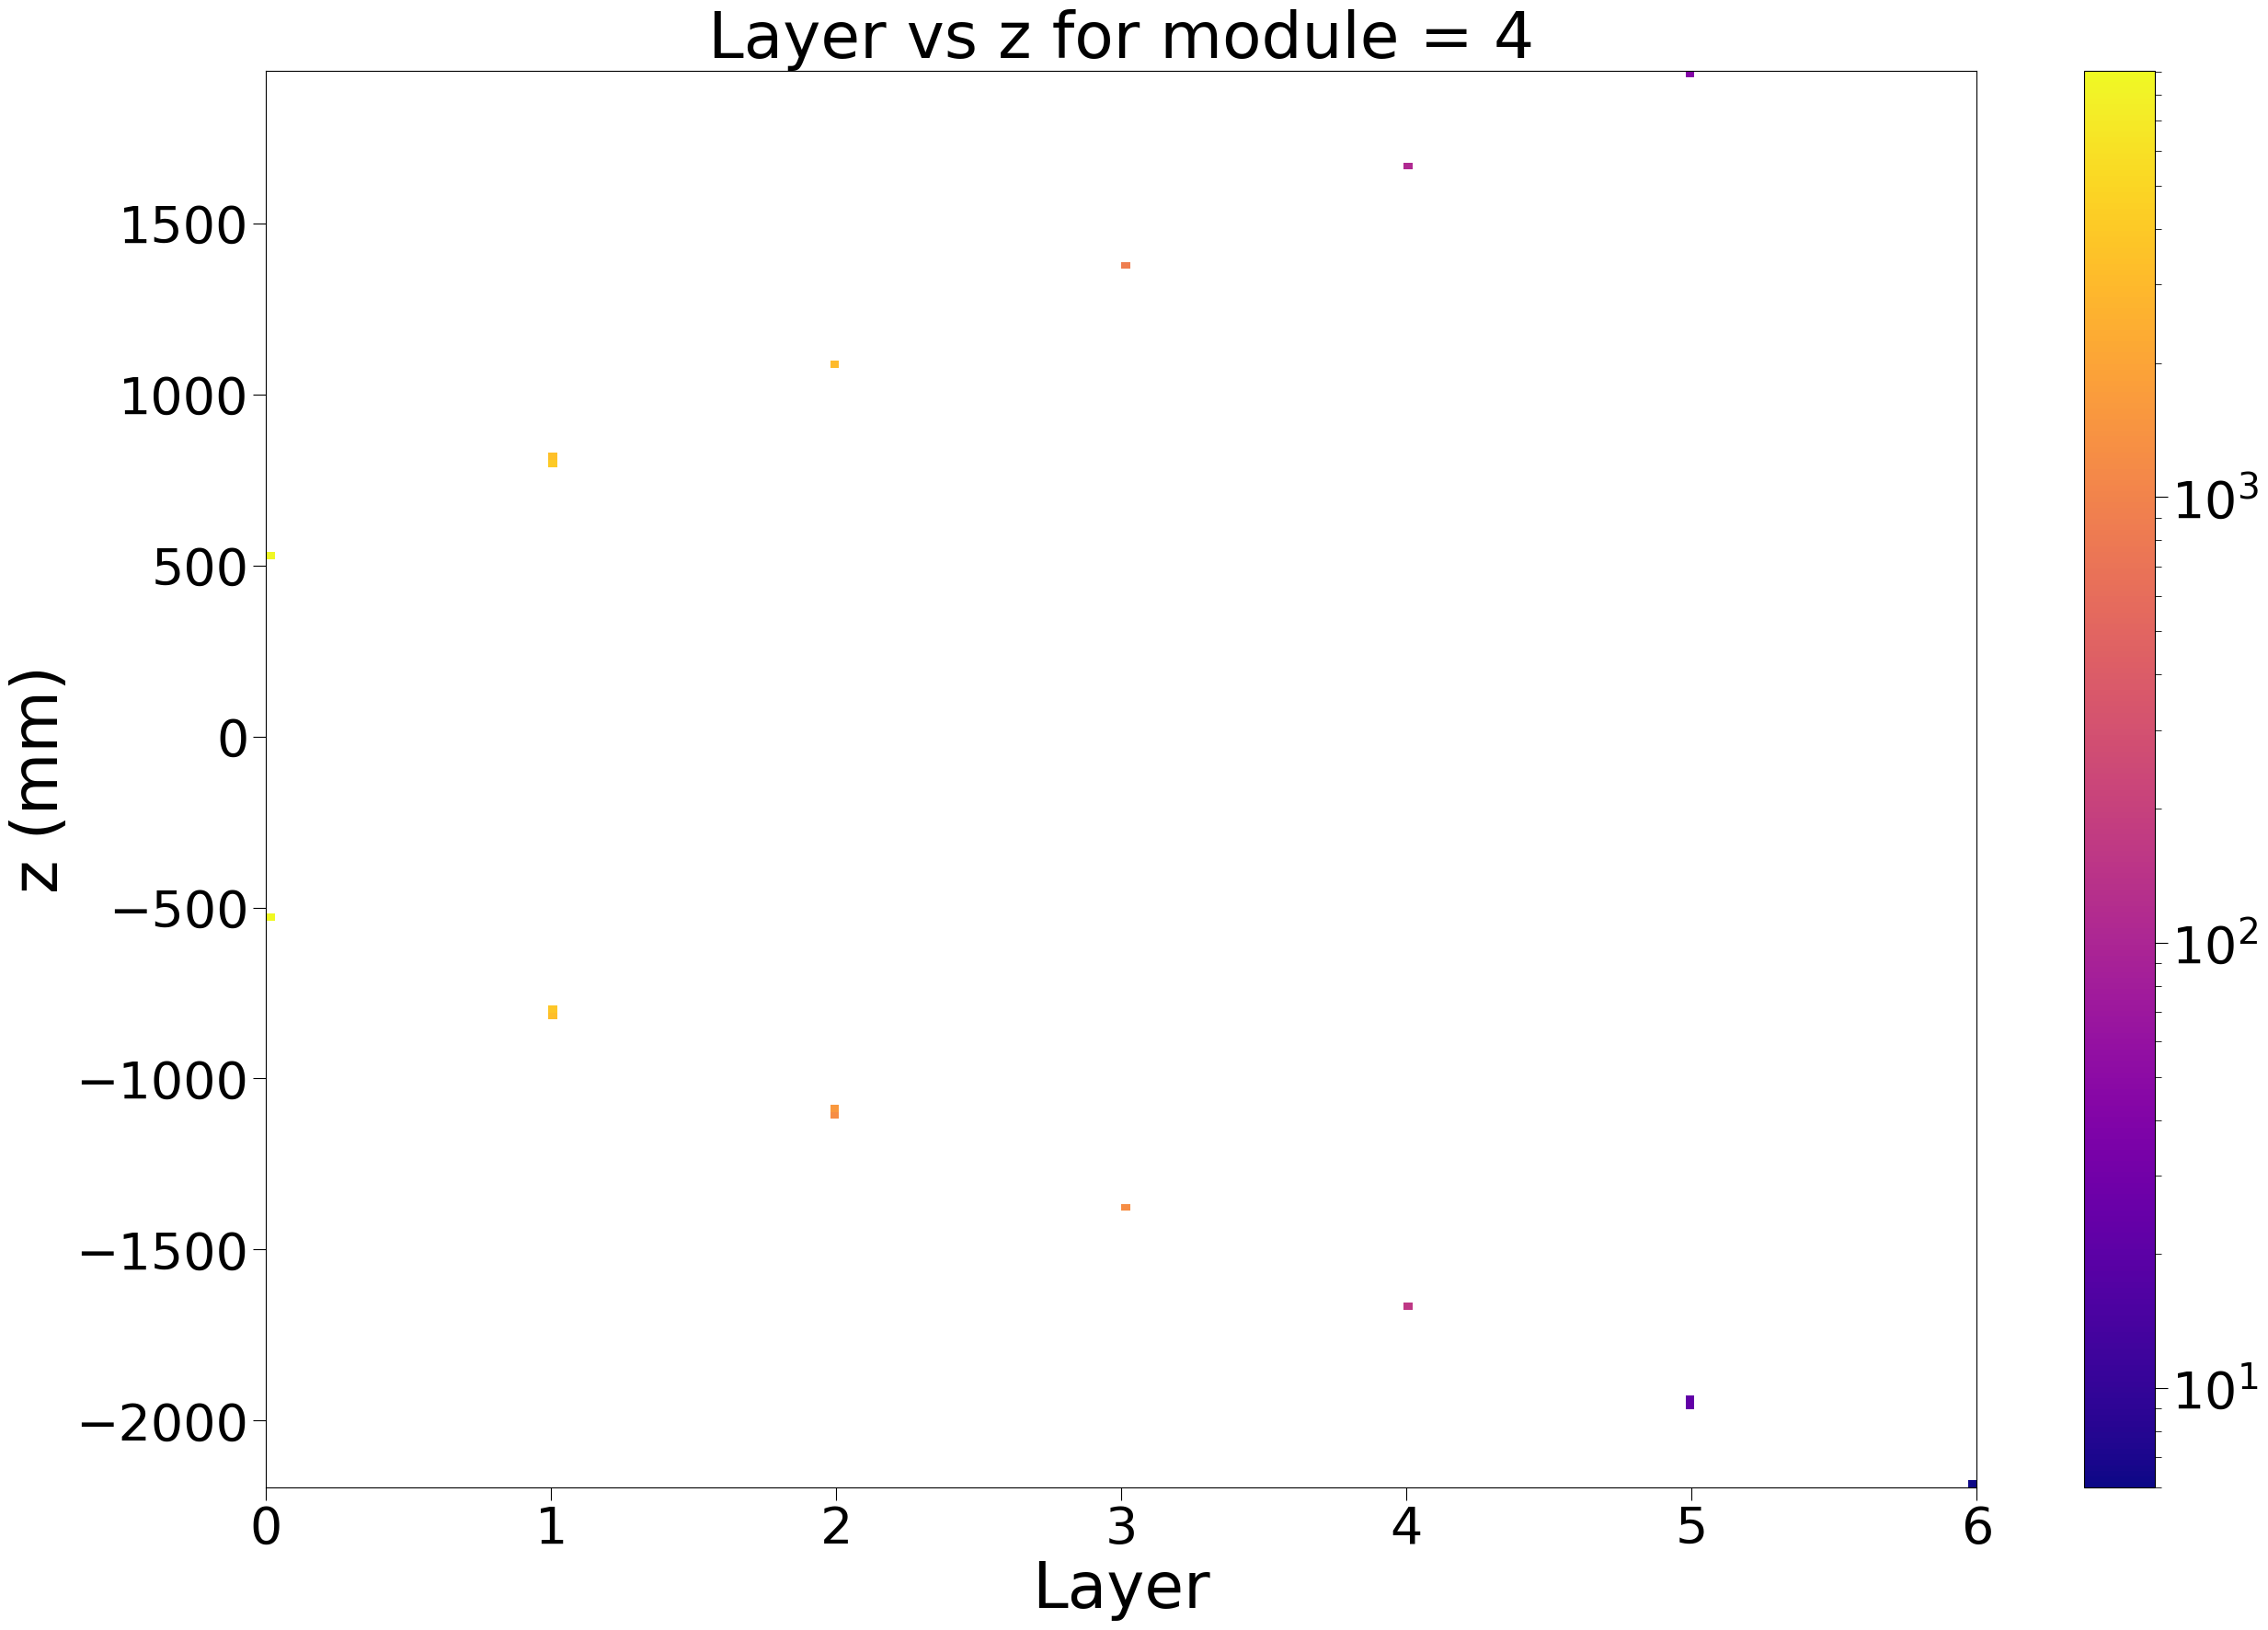

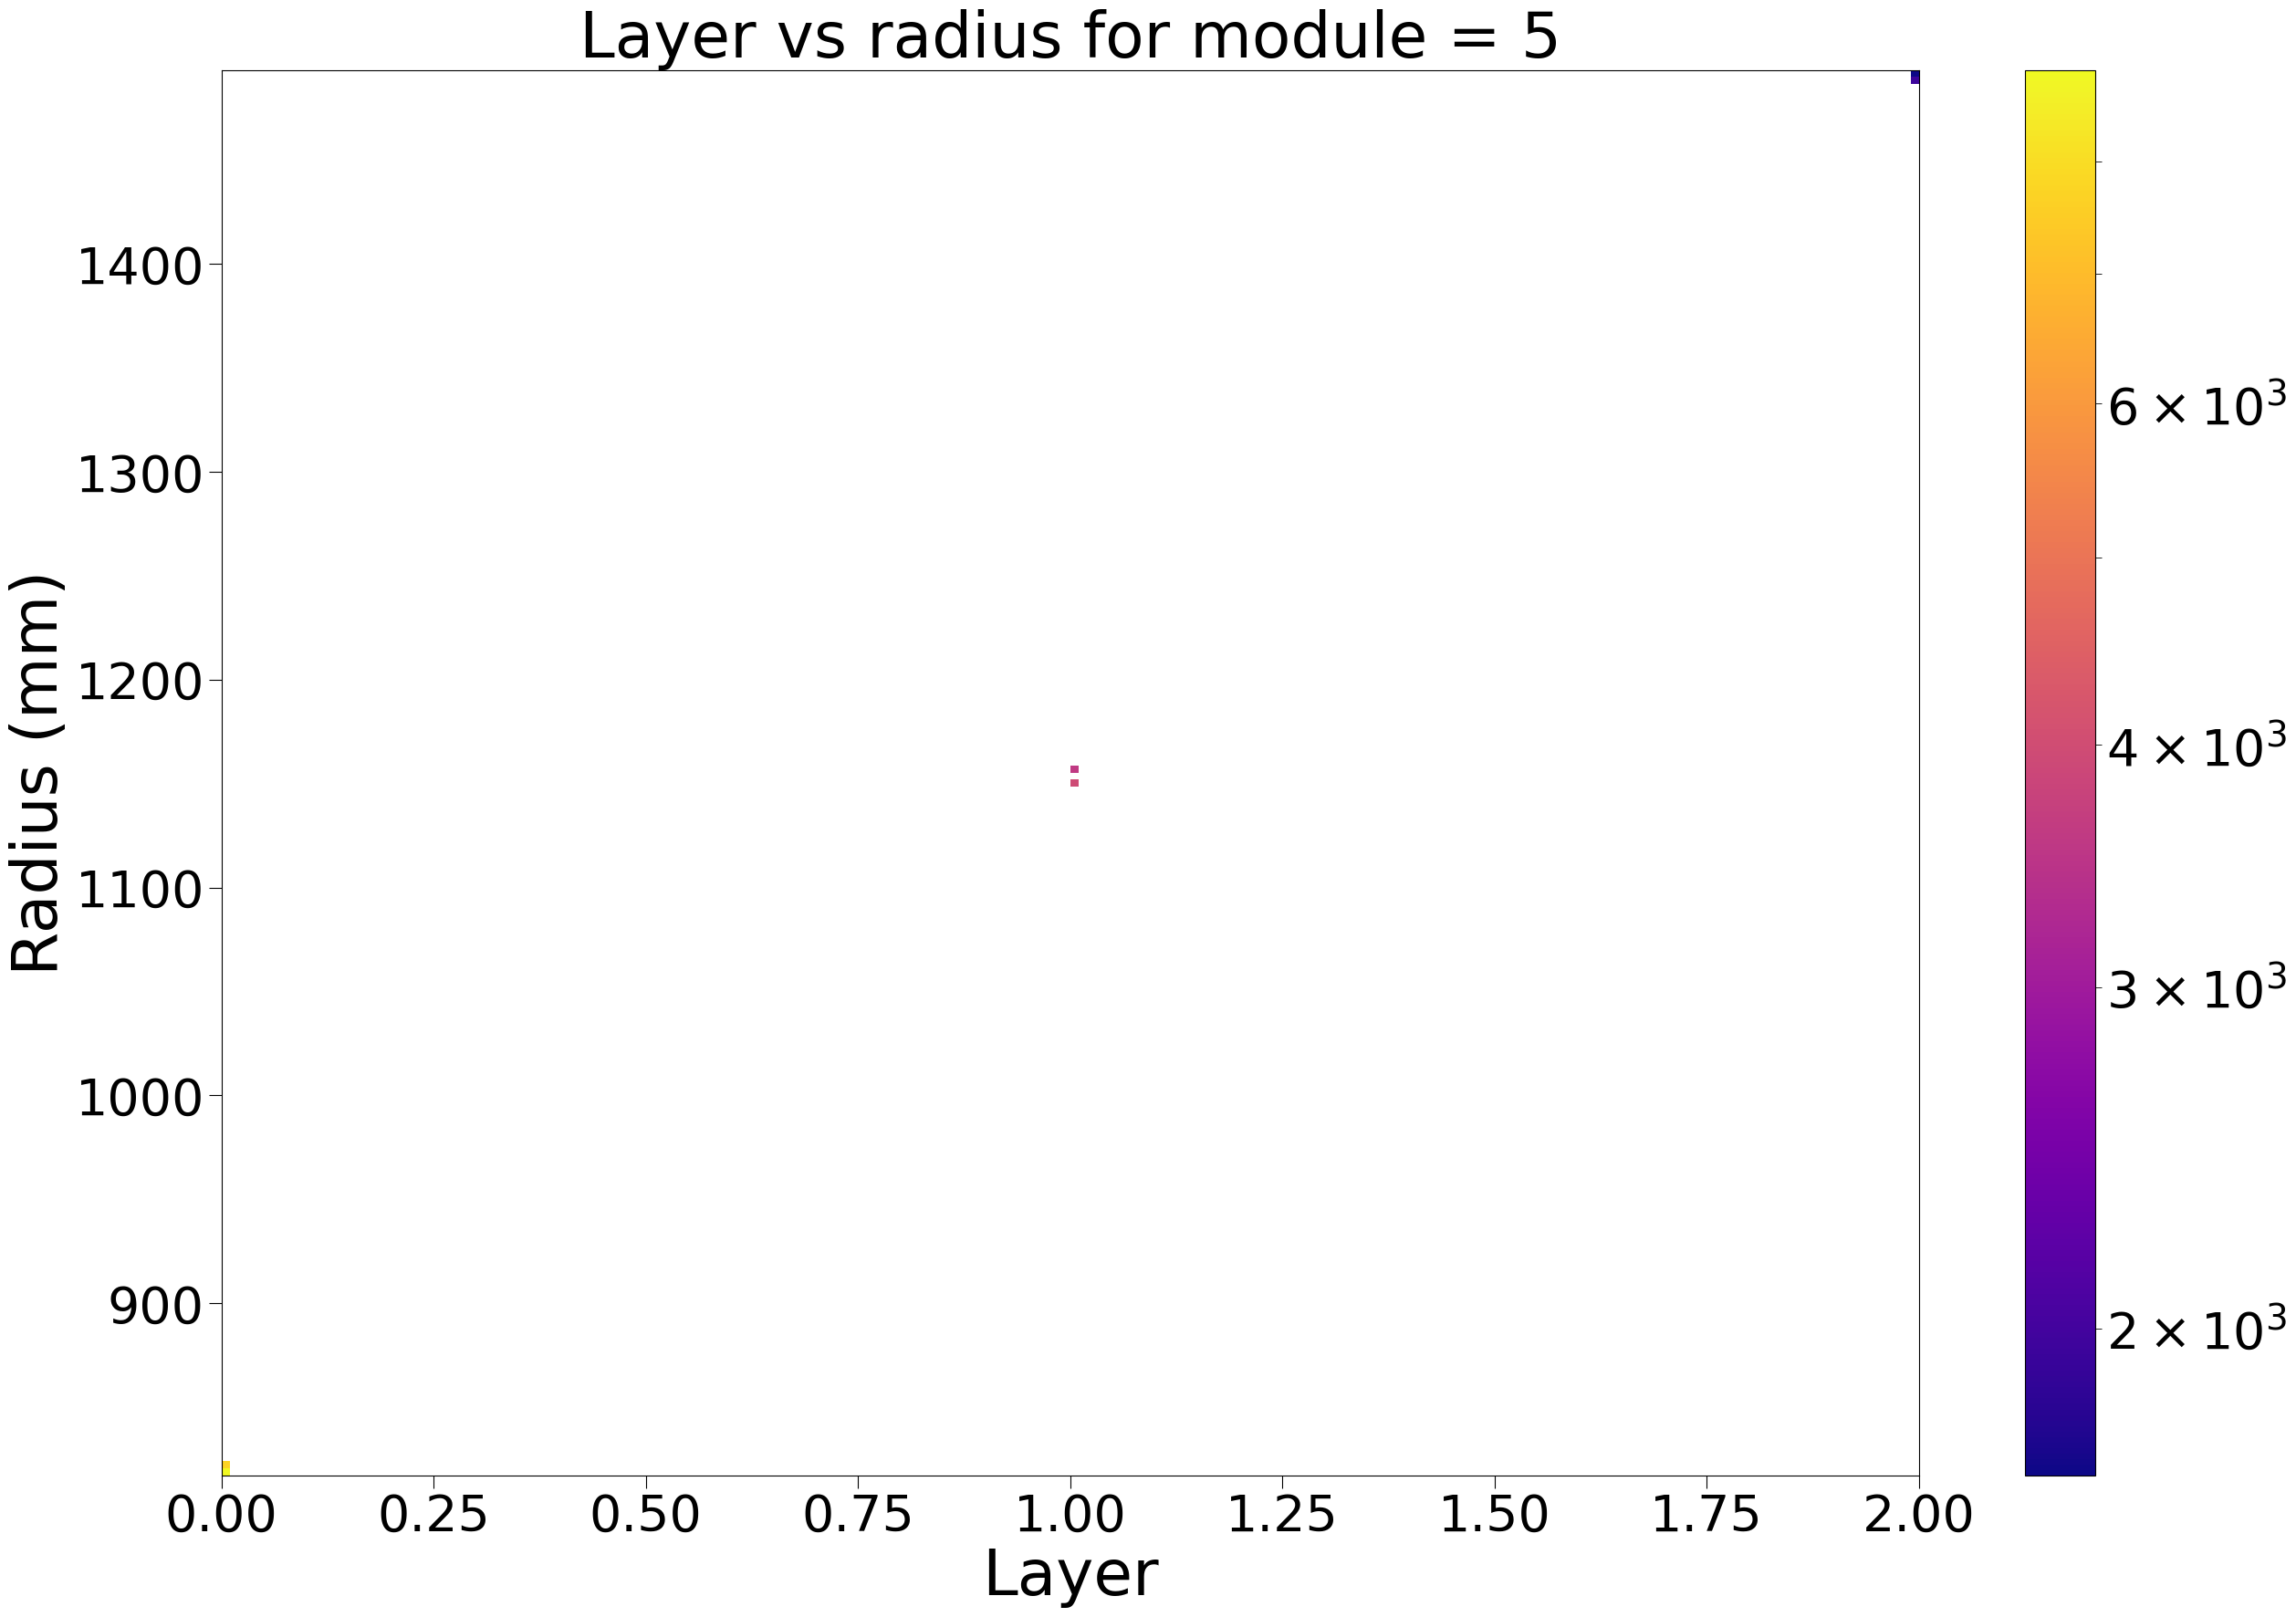

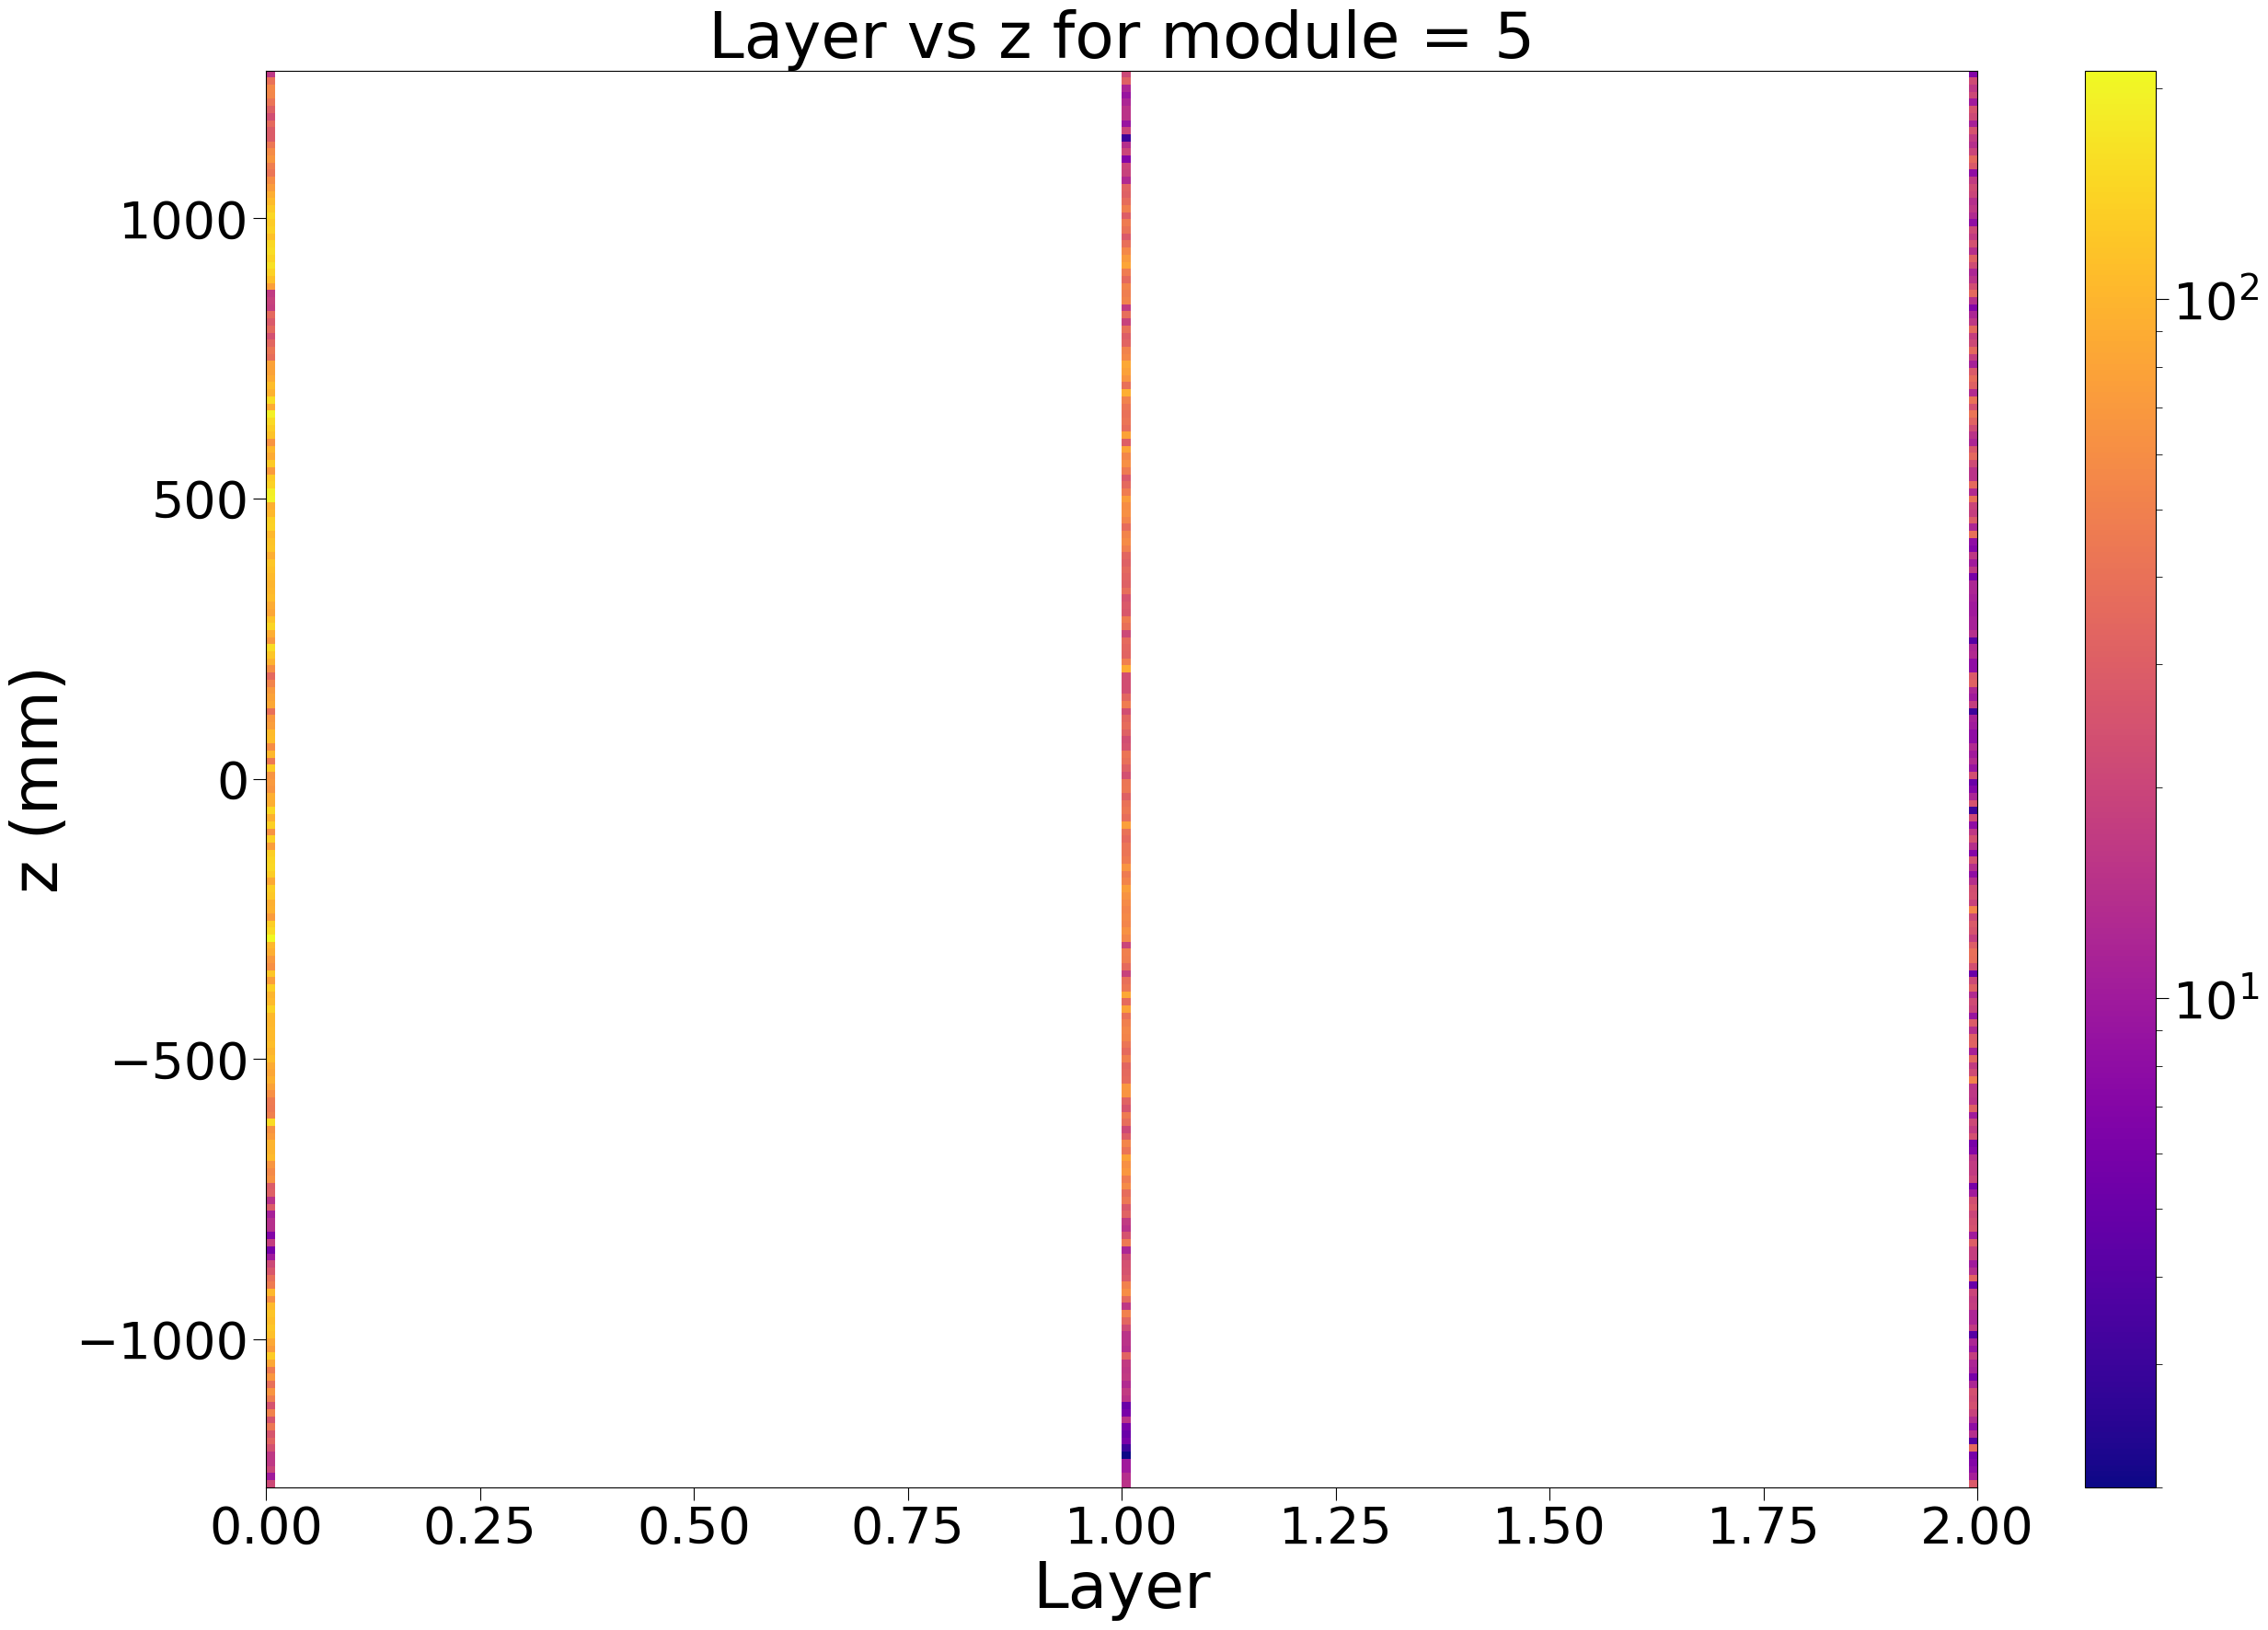

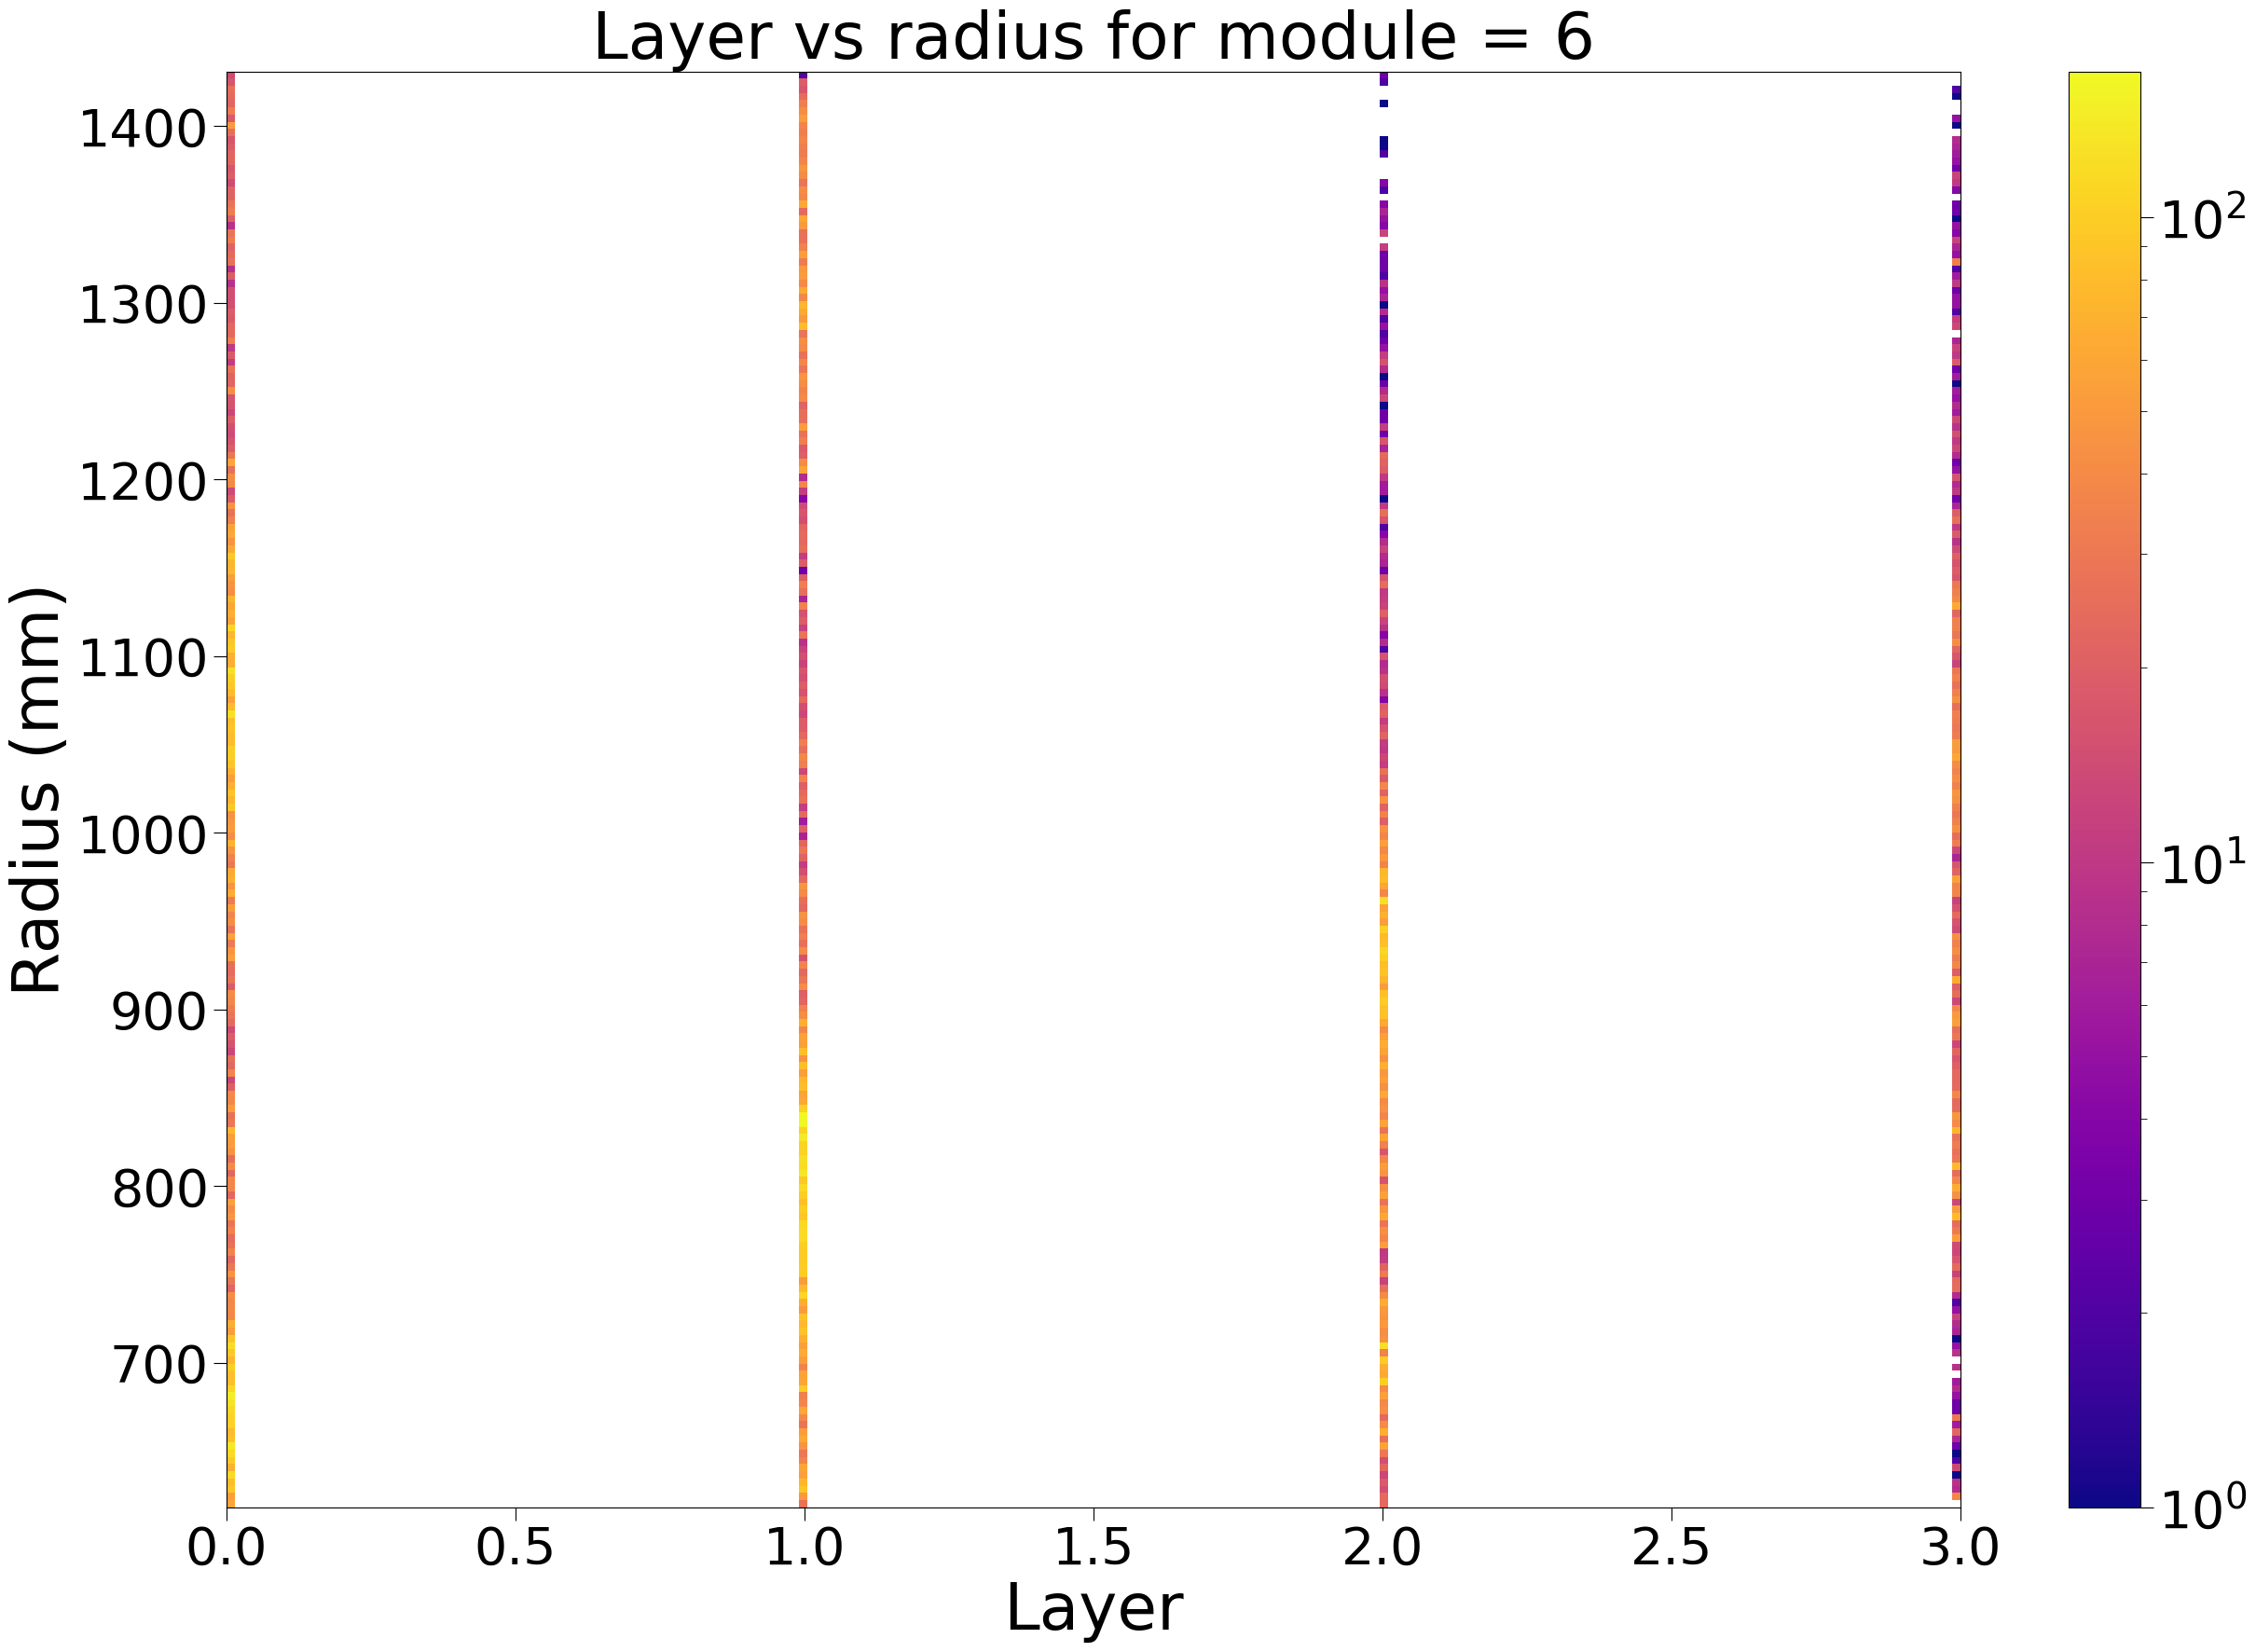

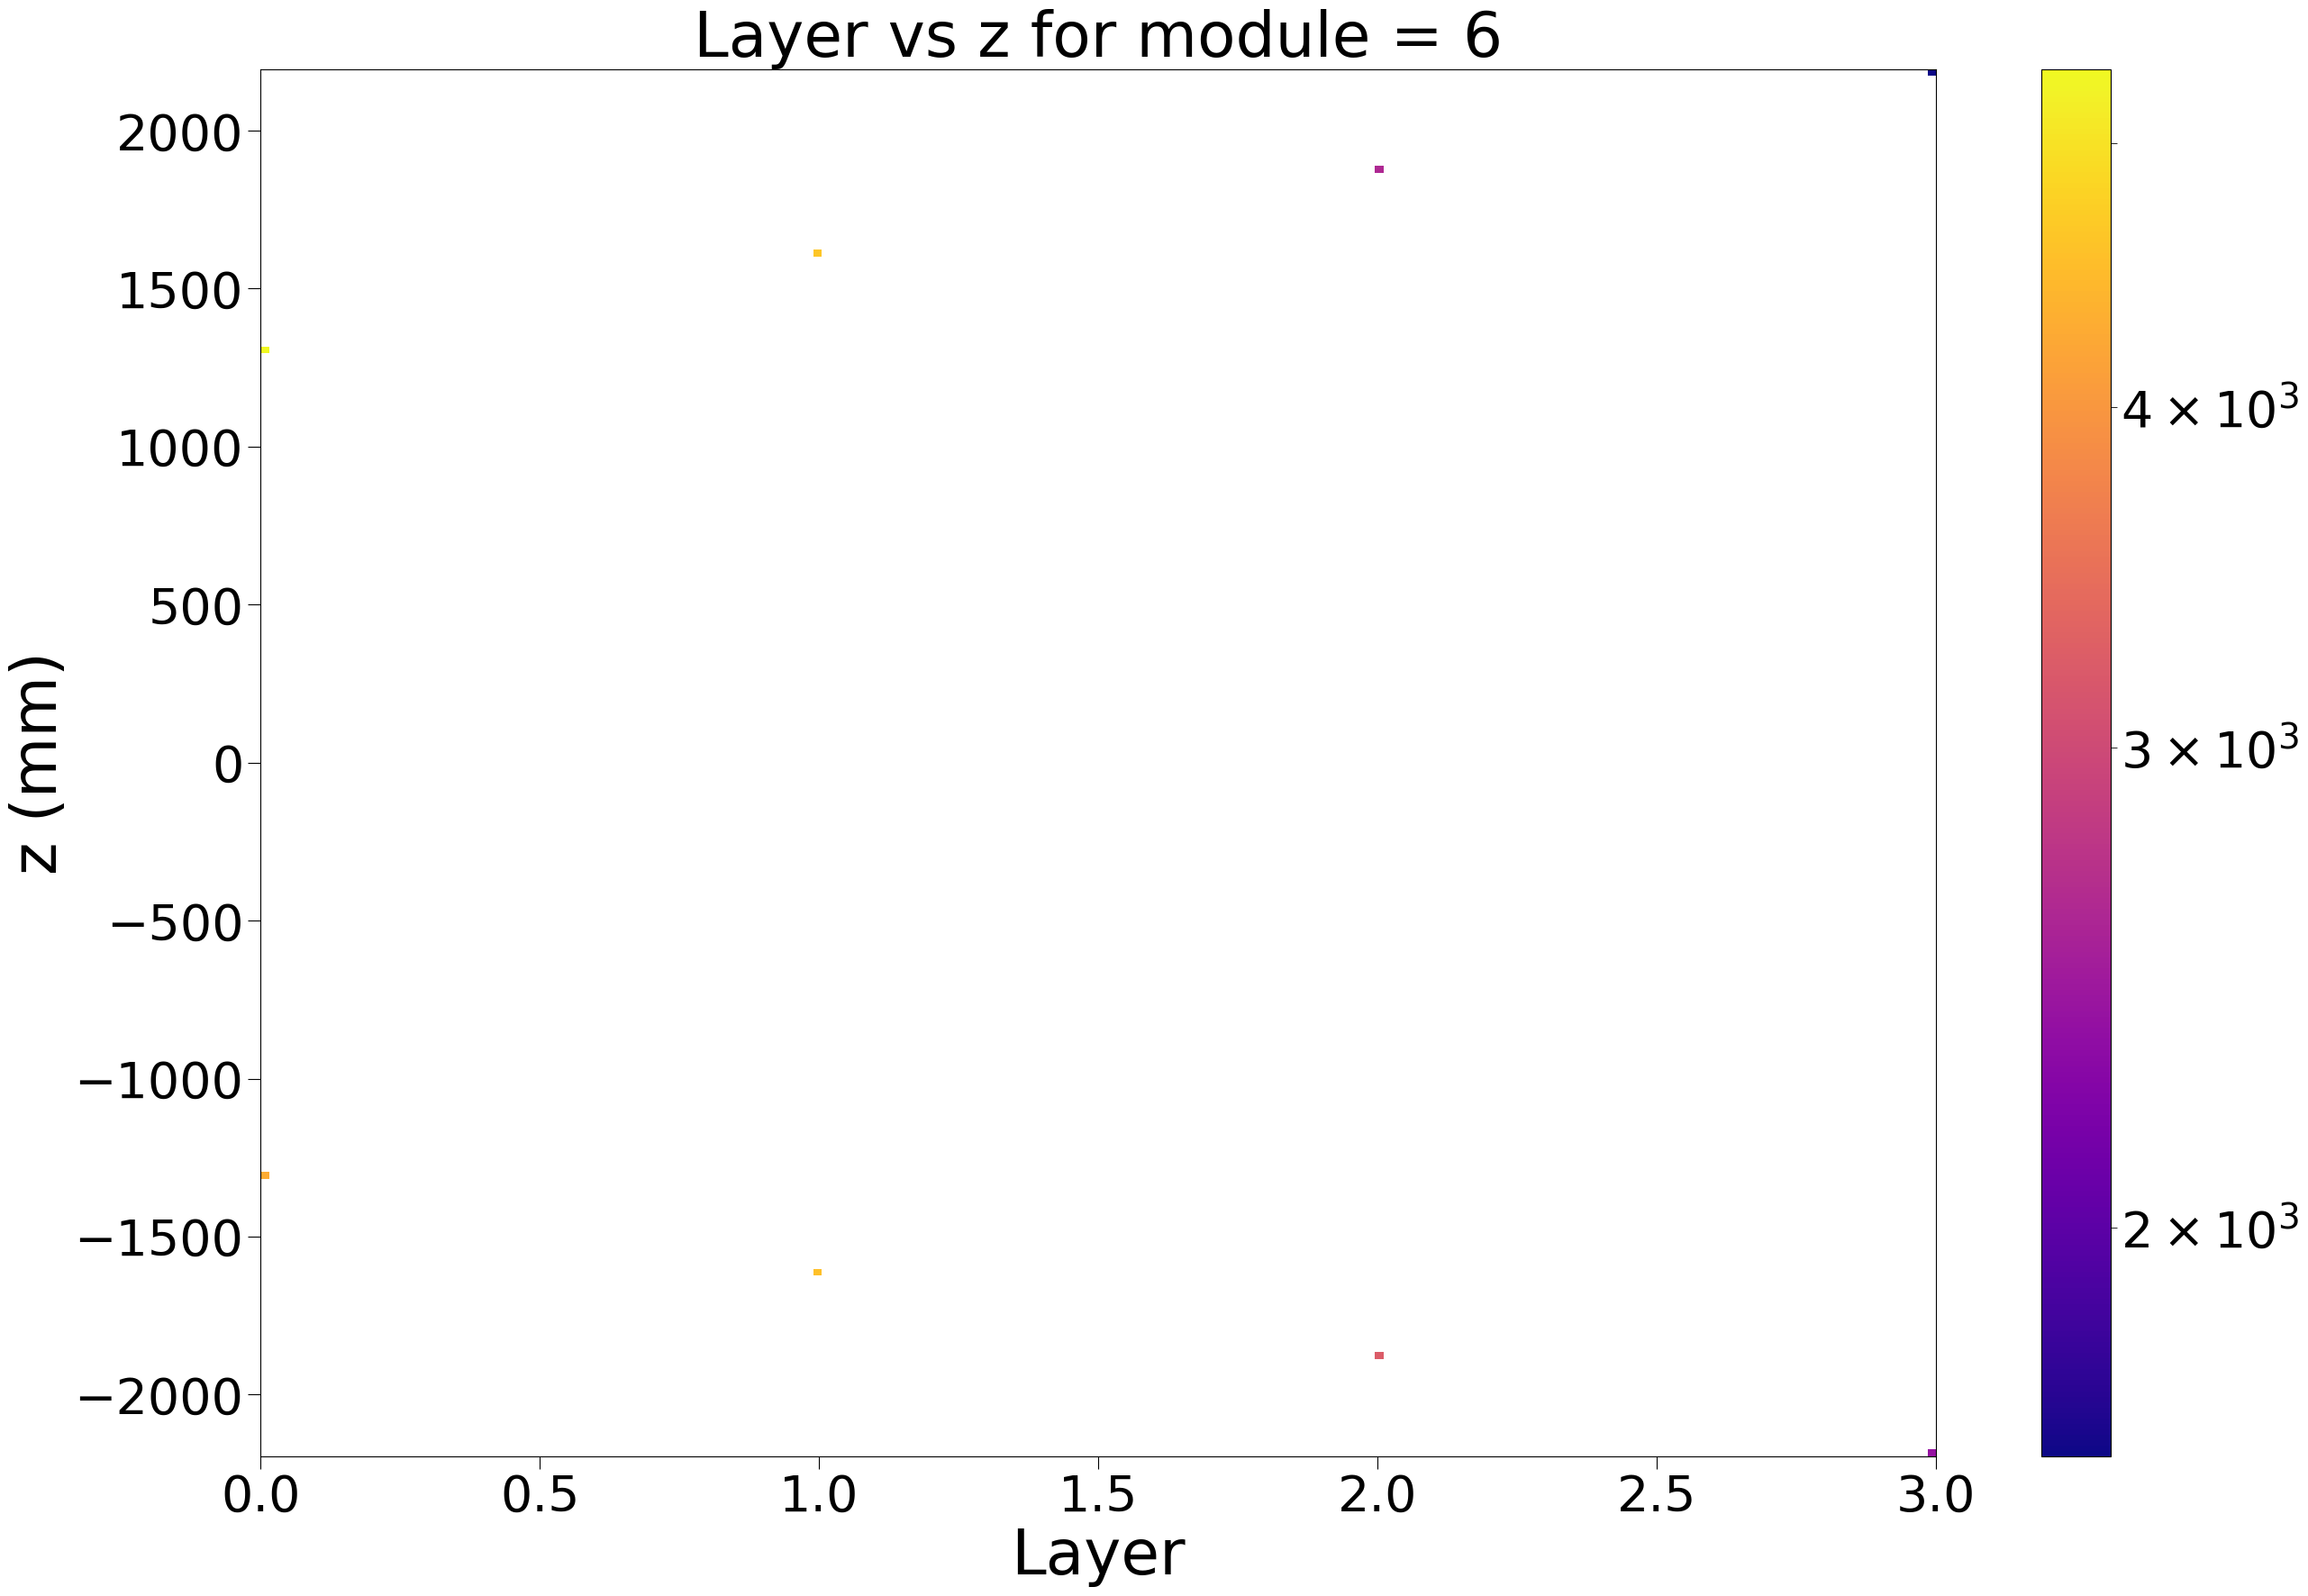

In [112]:
for i in range(1,int(max(ak.flatten(hitBIB["sys"])))+1):
    inSys=(hitBIB["sys"]==i)
    plot2DHistogram(hitBIB["lay"][inSys],hitBIB["r"][inSys], bins=200, label=("Layer vs radius for module = "+str(i)+";Layer;Radius (mm)"))
    plot2DHistogram(hitBIB["lay"][inSys],hitBIB["z"][inSys], bins=200, label=("Layer vs z for module = "+str(i)+";Layer;z (mm)"))

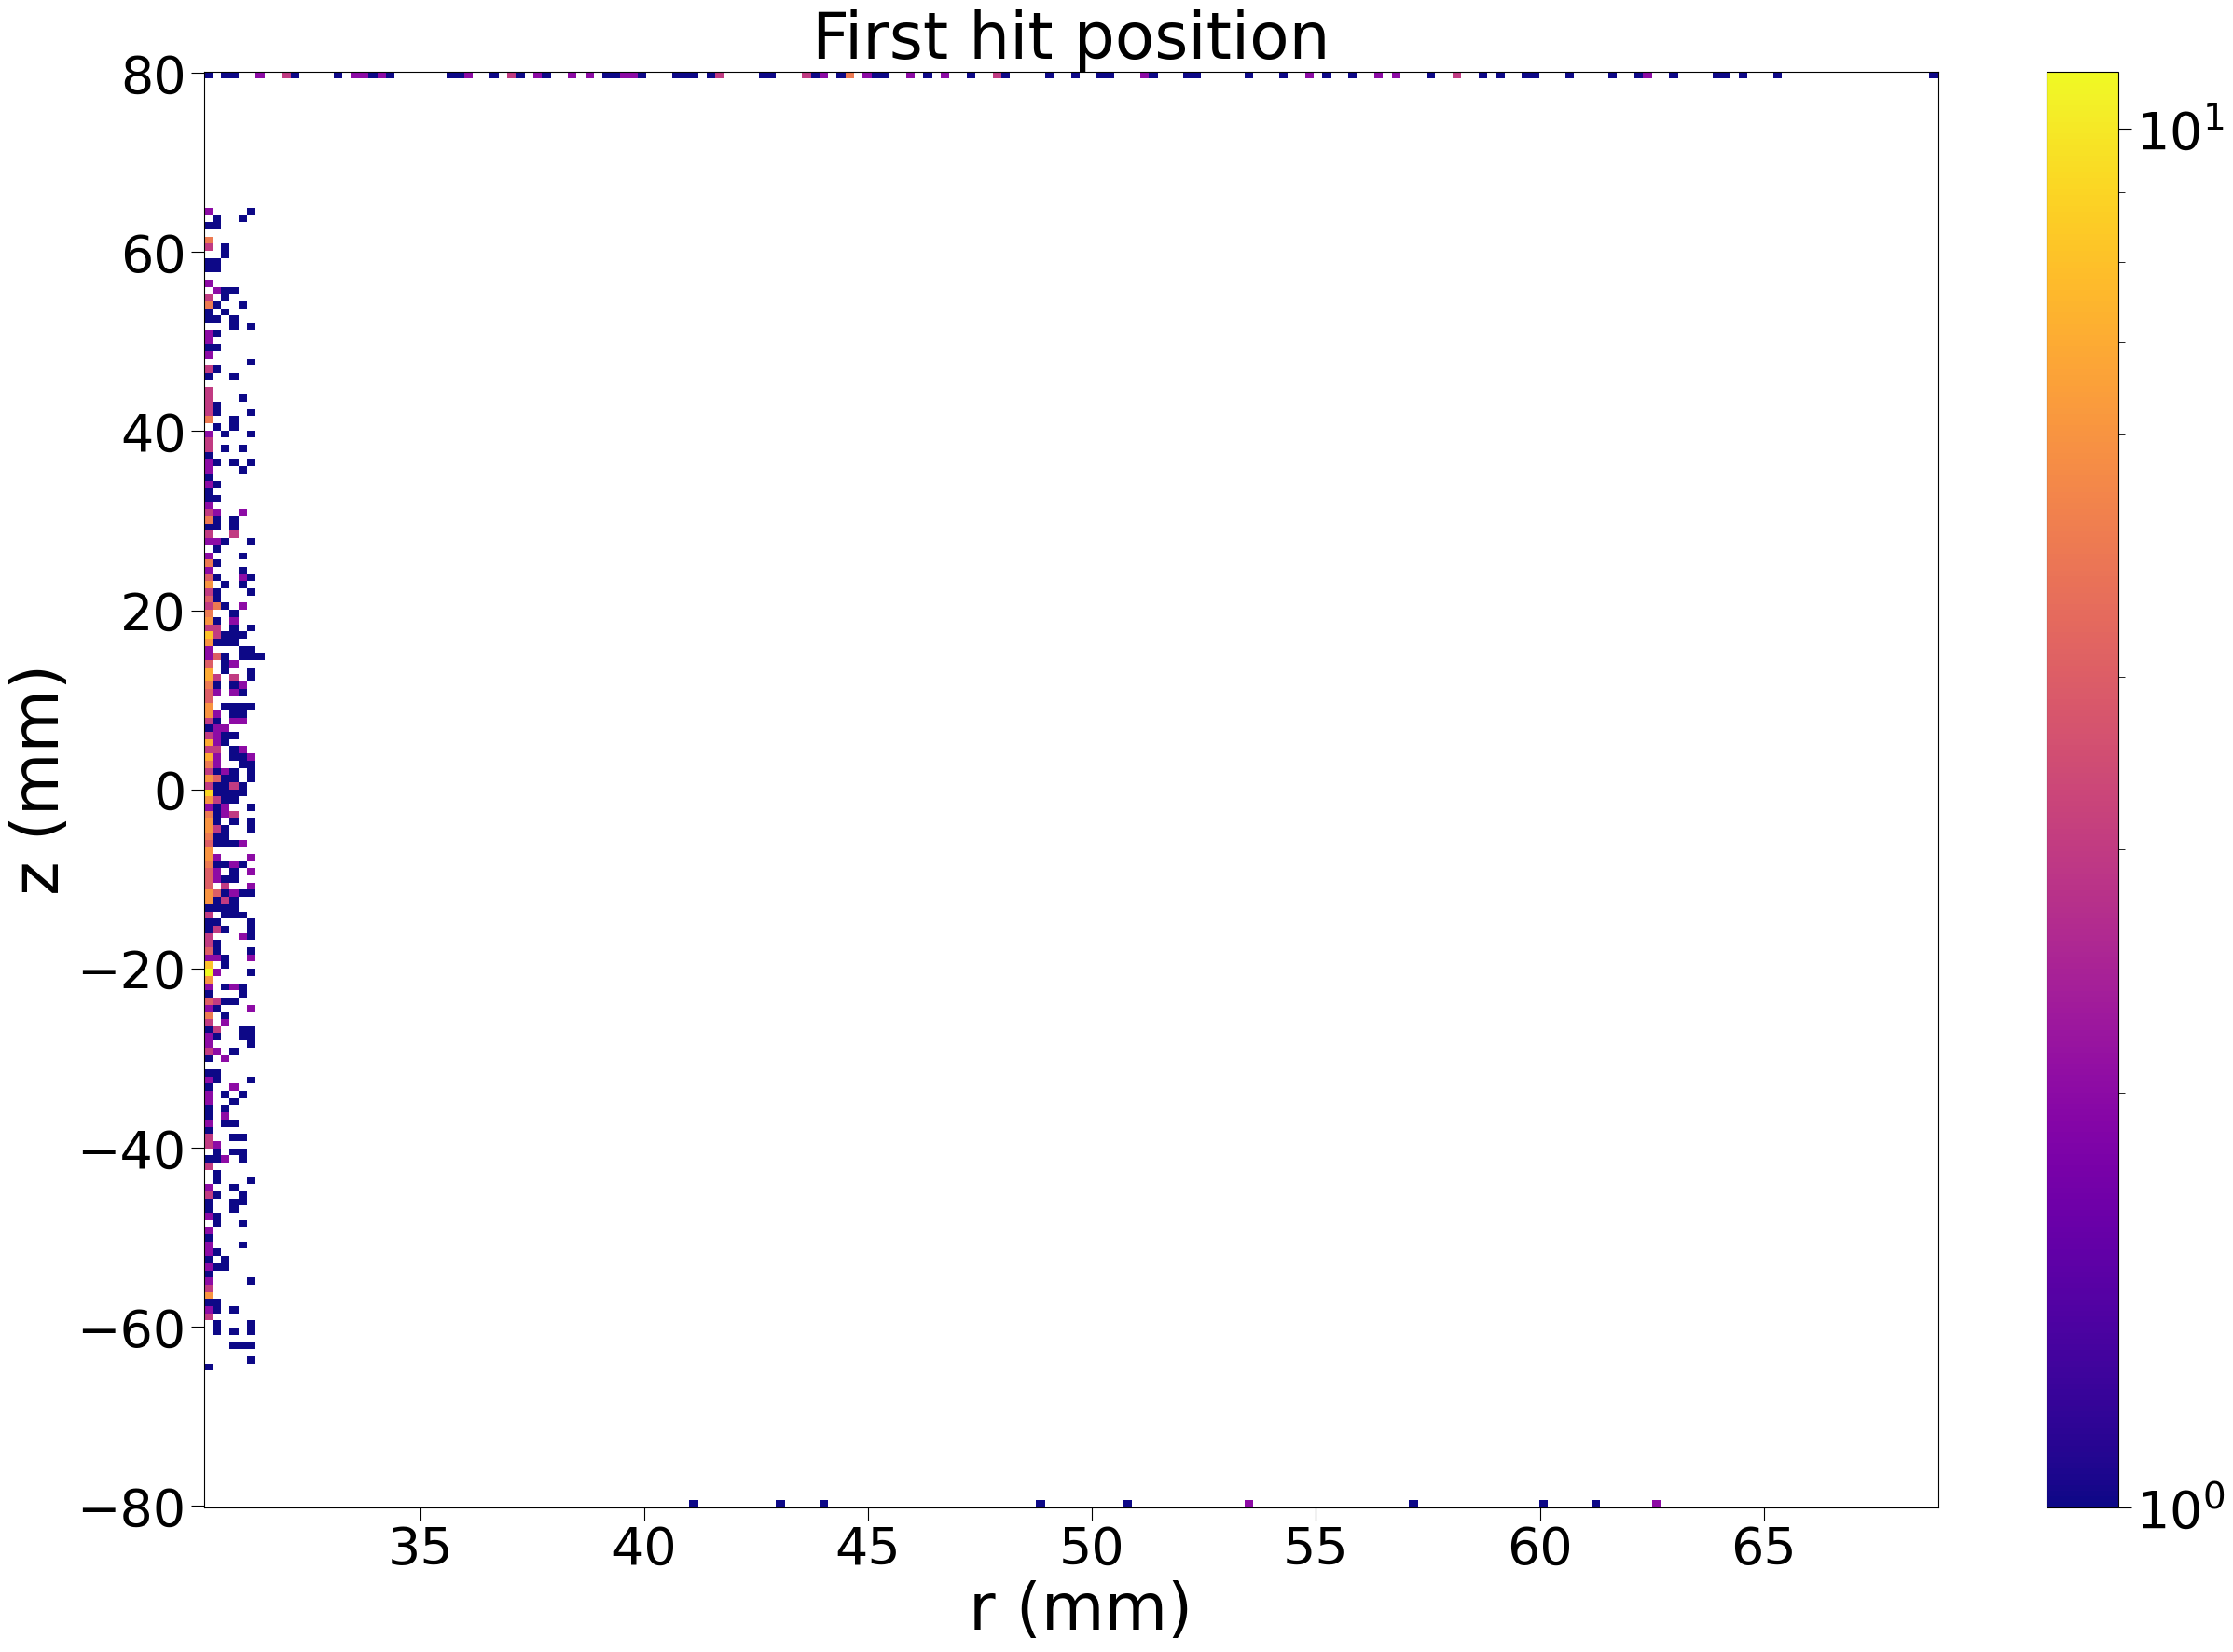

In [12]:
firstLayerMask=((hit["sys"]==1)|(hit["sys"]==2)) & (hit["lay"]==0)
plot2DHistogram(hit["r"][firstLayerMask],hit["z"][firstLayerMask], label="First hit position; r (mm); z (mm)", bins=200)

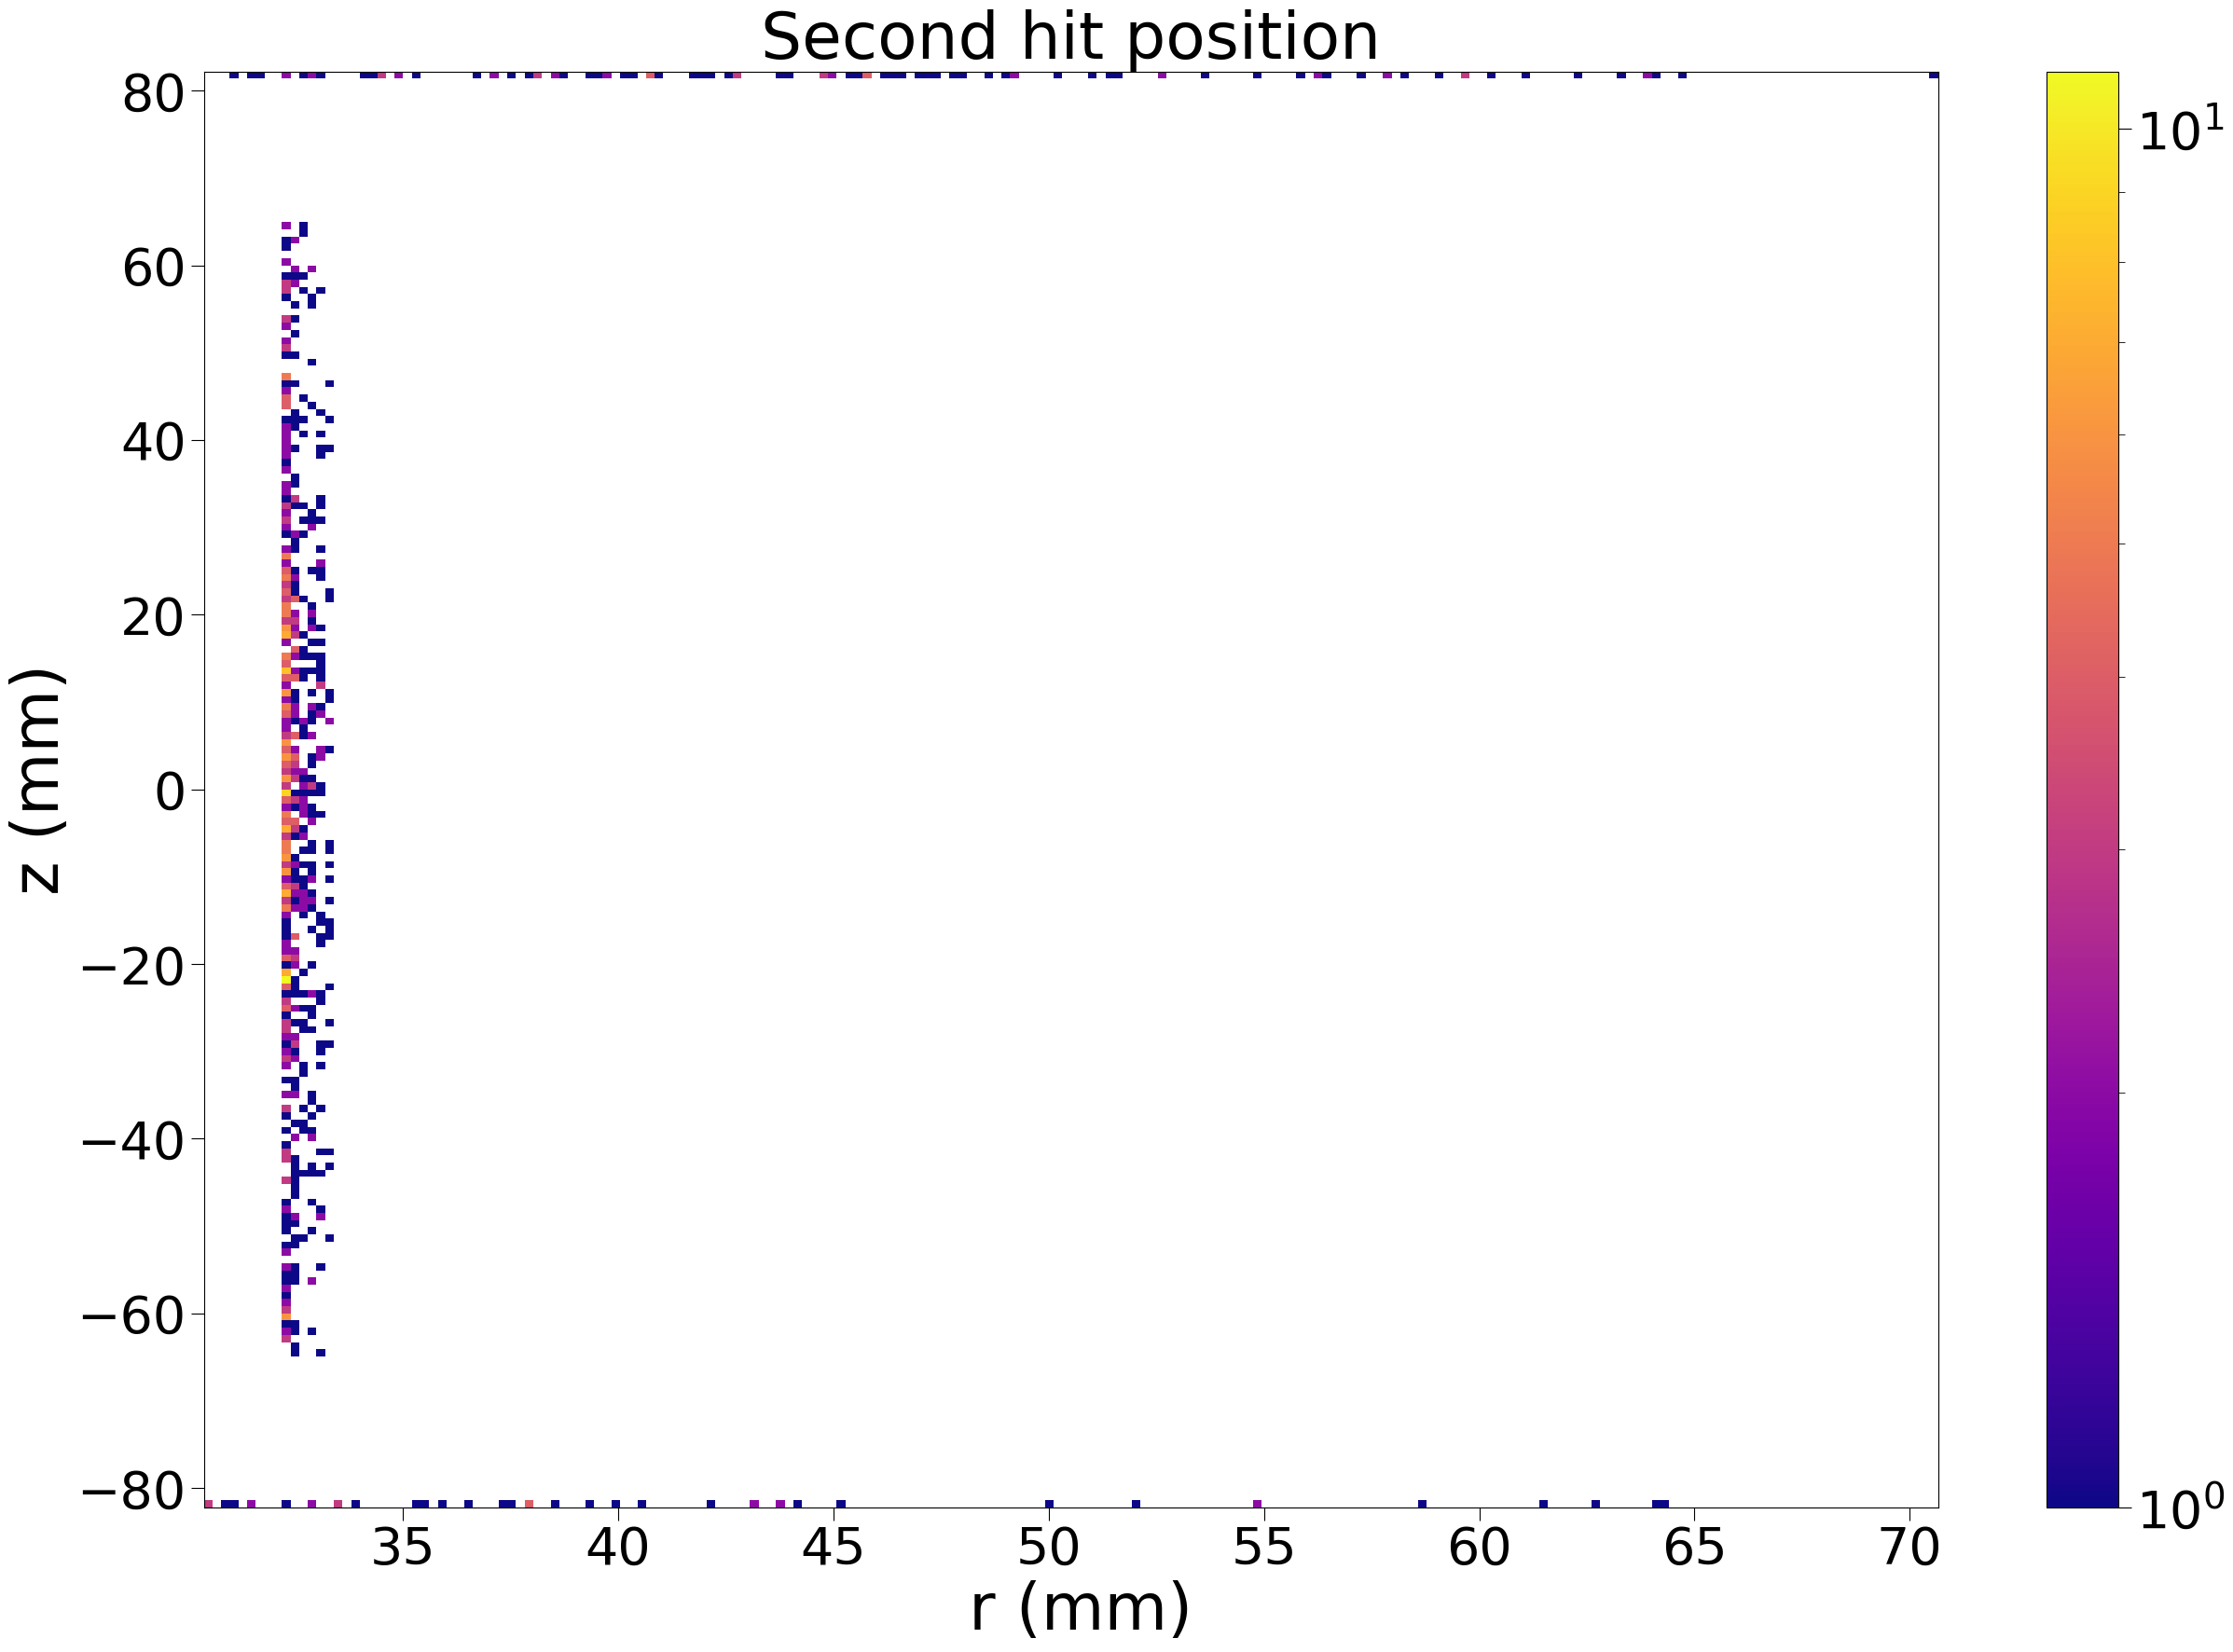

In [13]:
secondLayerMask=((hit["sys"]==1)|(hit["sys"]==2)) & (hit["lay"]==1)
plot2DHistogram(hit["r"][secondLayerMask],hit["z"][secondLayerMask], label="Second hit position; r (mm); z (mm)", bins=200)

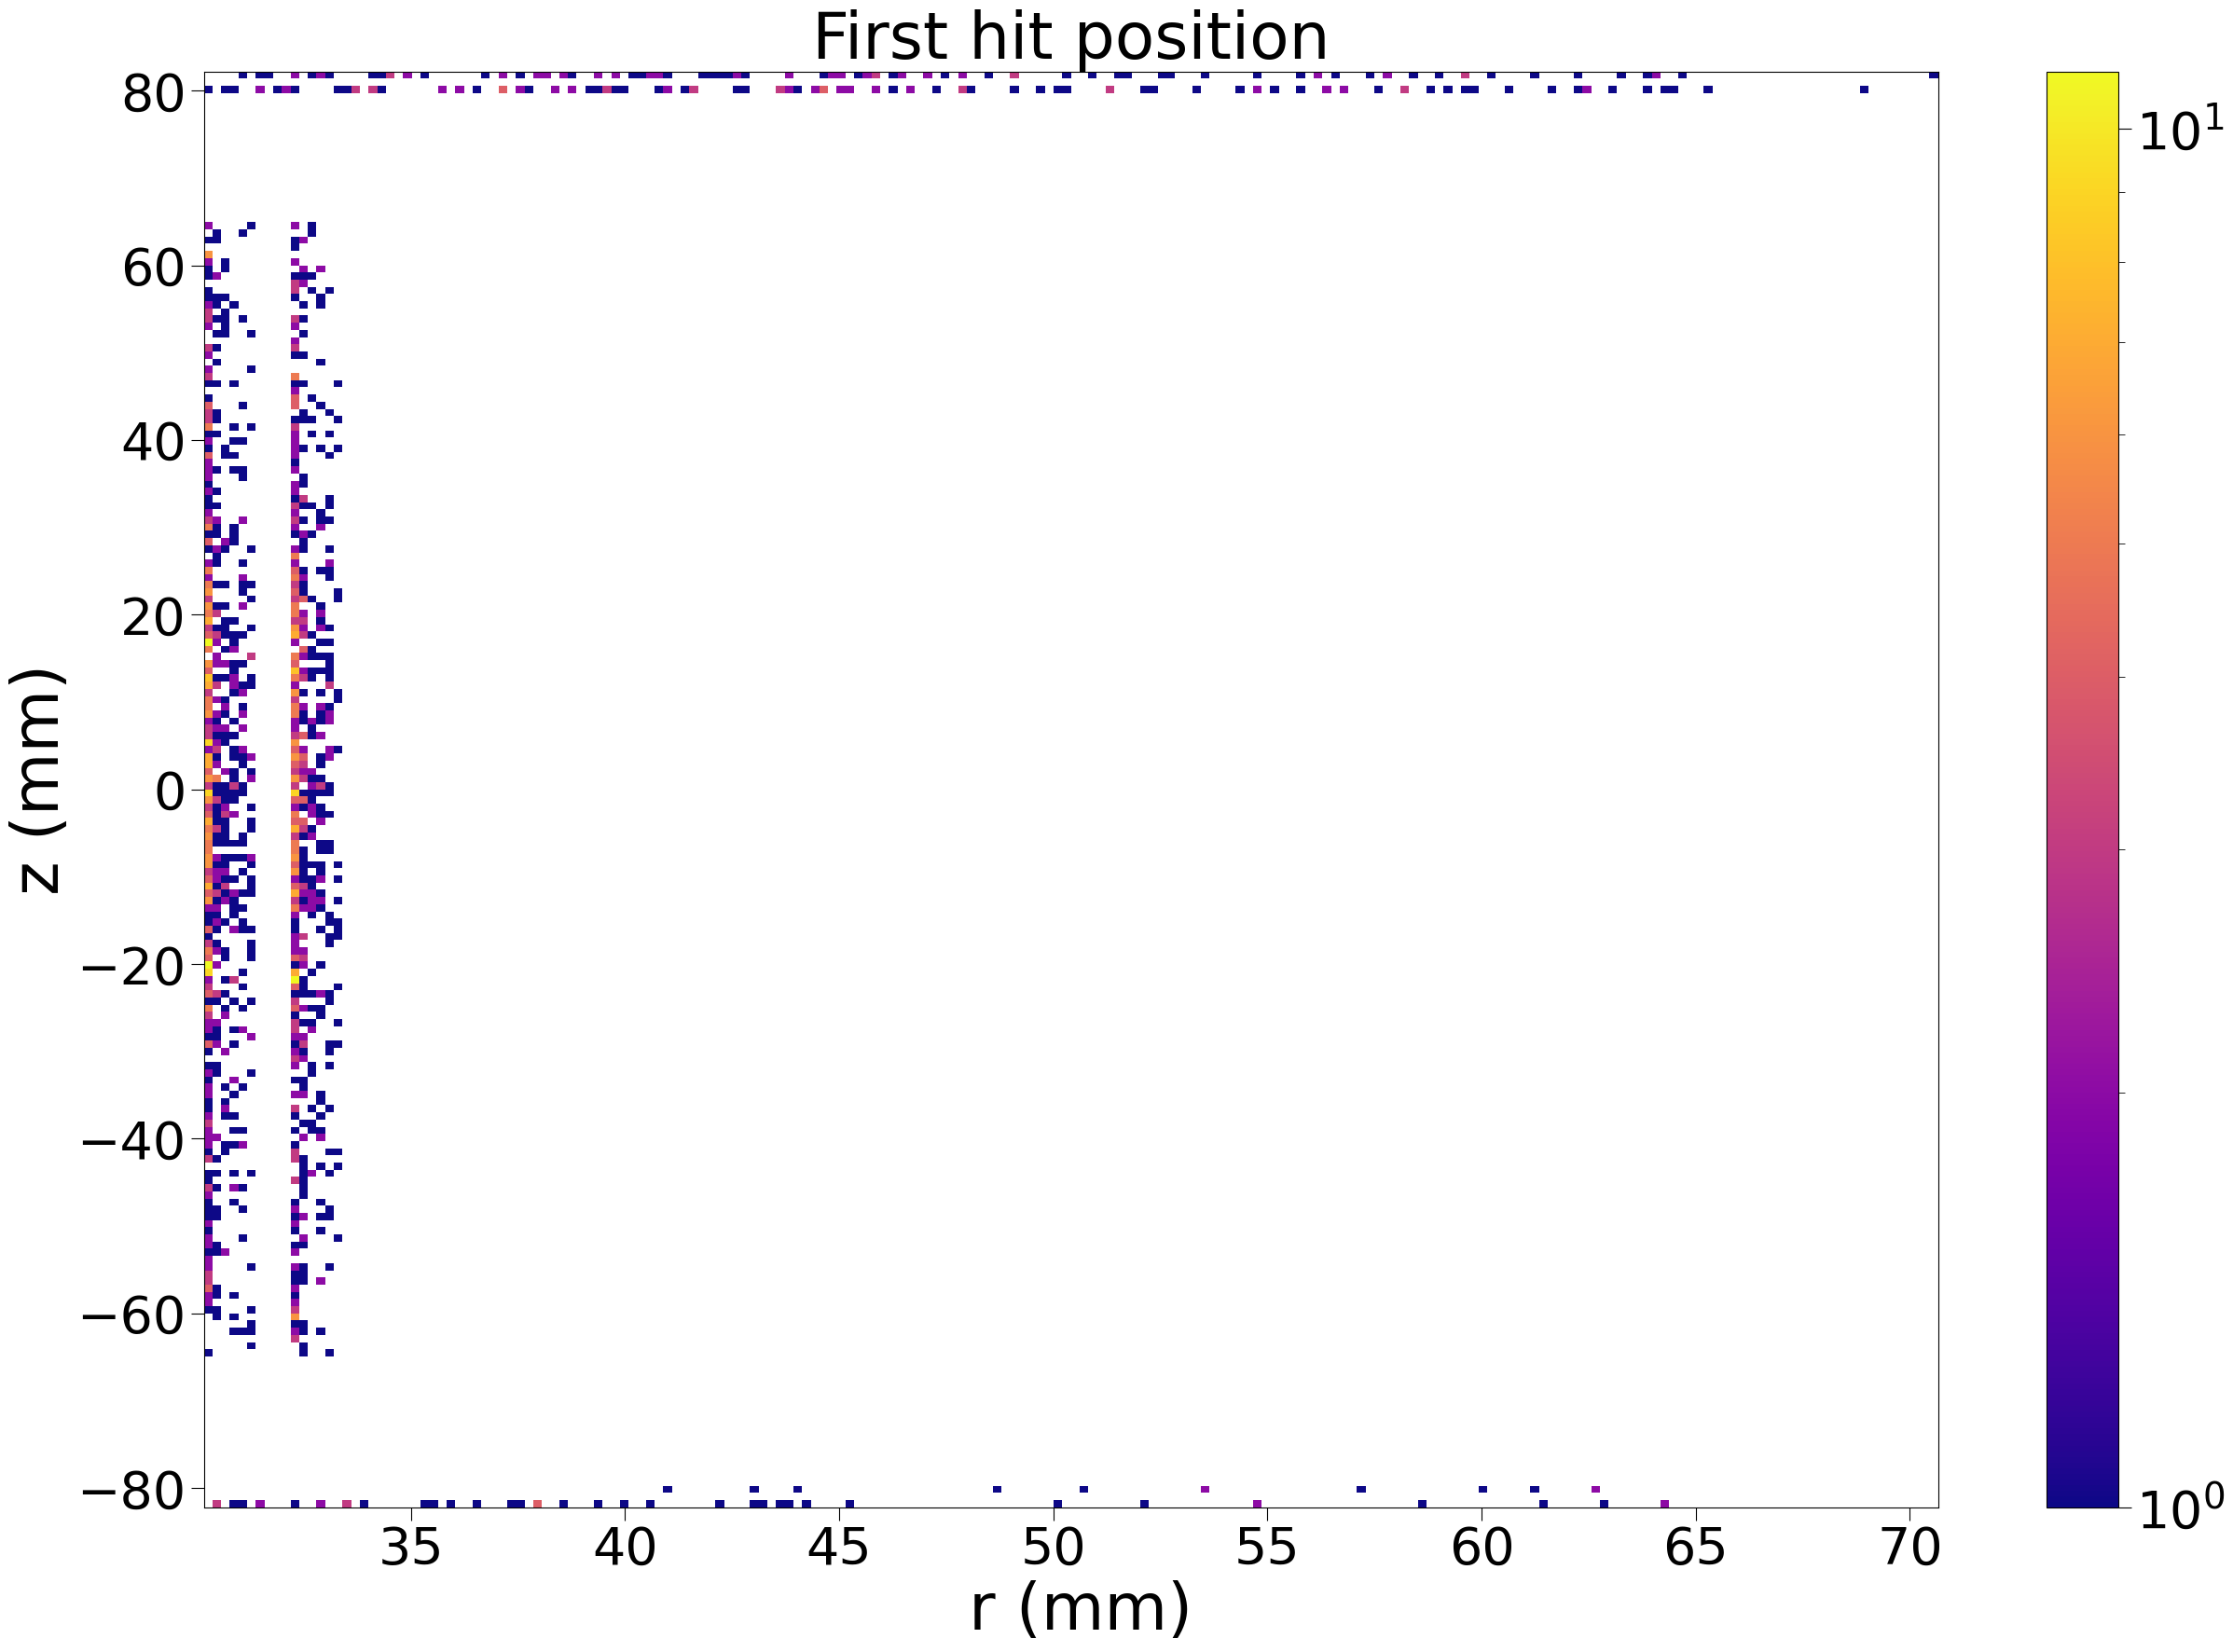

In [14]:
plot2DHistogram(hit["r"][firstLayerMask | secondLayerMask],hit["z"][firstLayerMask | secondLayerMask], label="First hit position; r (mm); z (mm)", bins=200)

In [77]:
def doubletHitMask(system,layer):
    firstLayerMaskB=((system==1) & (layer==0))
    secondLayerMaskB=((system==1) & (layer==1))
    firstLayerMaskE=((system==2) & (layer==0))
    secondLayerMaskE=((system==2) & (layer==1))
    bothLayerMaskB=np.sum(firstLayerMaskB, axis=0) & np.sum(secondLayerMaskB, axis=0)
    bothLayerMaskE=np.sum(firstLayerMaskE, axis=0)&np.sum(secondLayerMaskE, axis=0)
    return firstLayerMaskB, secondLayerMaskB, firstLayerMaskE, secondLayerMaskE, bothLayerMaskB, bothLayerMaskE

In [78]:
maskBIB=doubletHitMask(hitBIB["sys"],hitBIB["lay"])
mask=doubletHitMask(hit["sys"],hit["lay"])

In [79]:
print(hit["x"].shape[1])
print(np.sum(mask[4]))
print(np.sum(mask[4])/hit["x"].shape[1])
print(np.count_nonzero(mask[5]))
print(np.count_nonzero(mask[5])/hit["x"].shape[1])

924
715
0.7738095238095238
112
0.12121212121212122


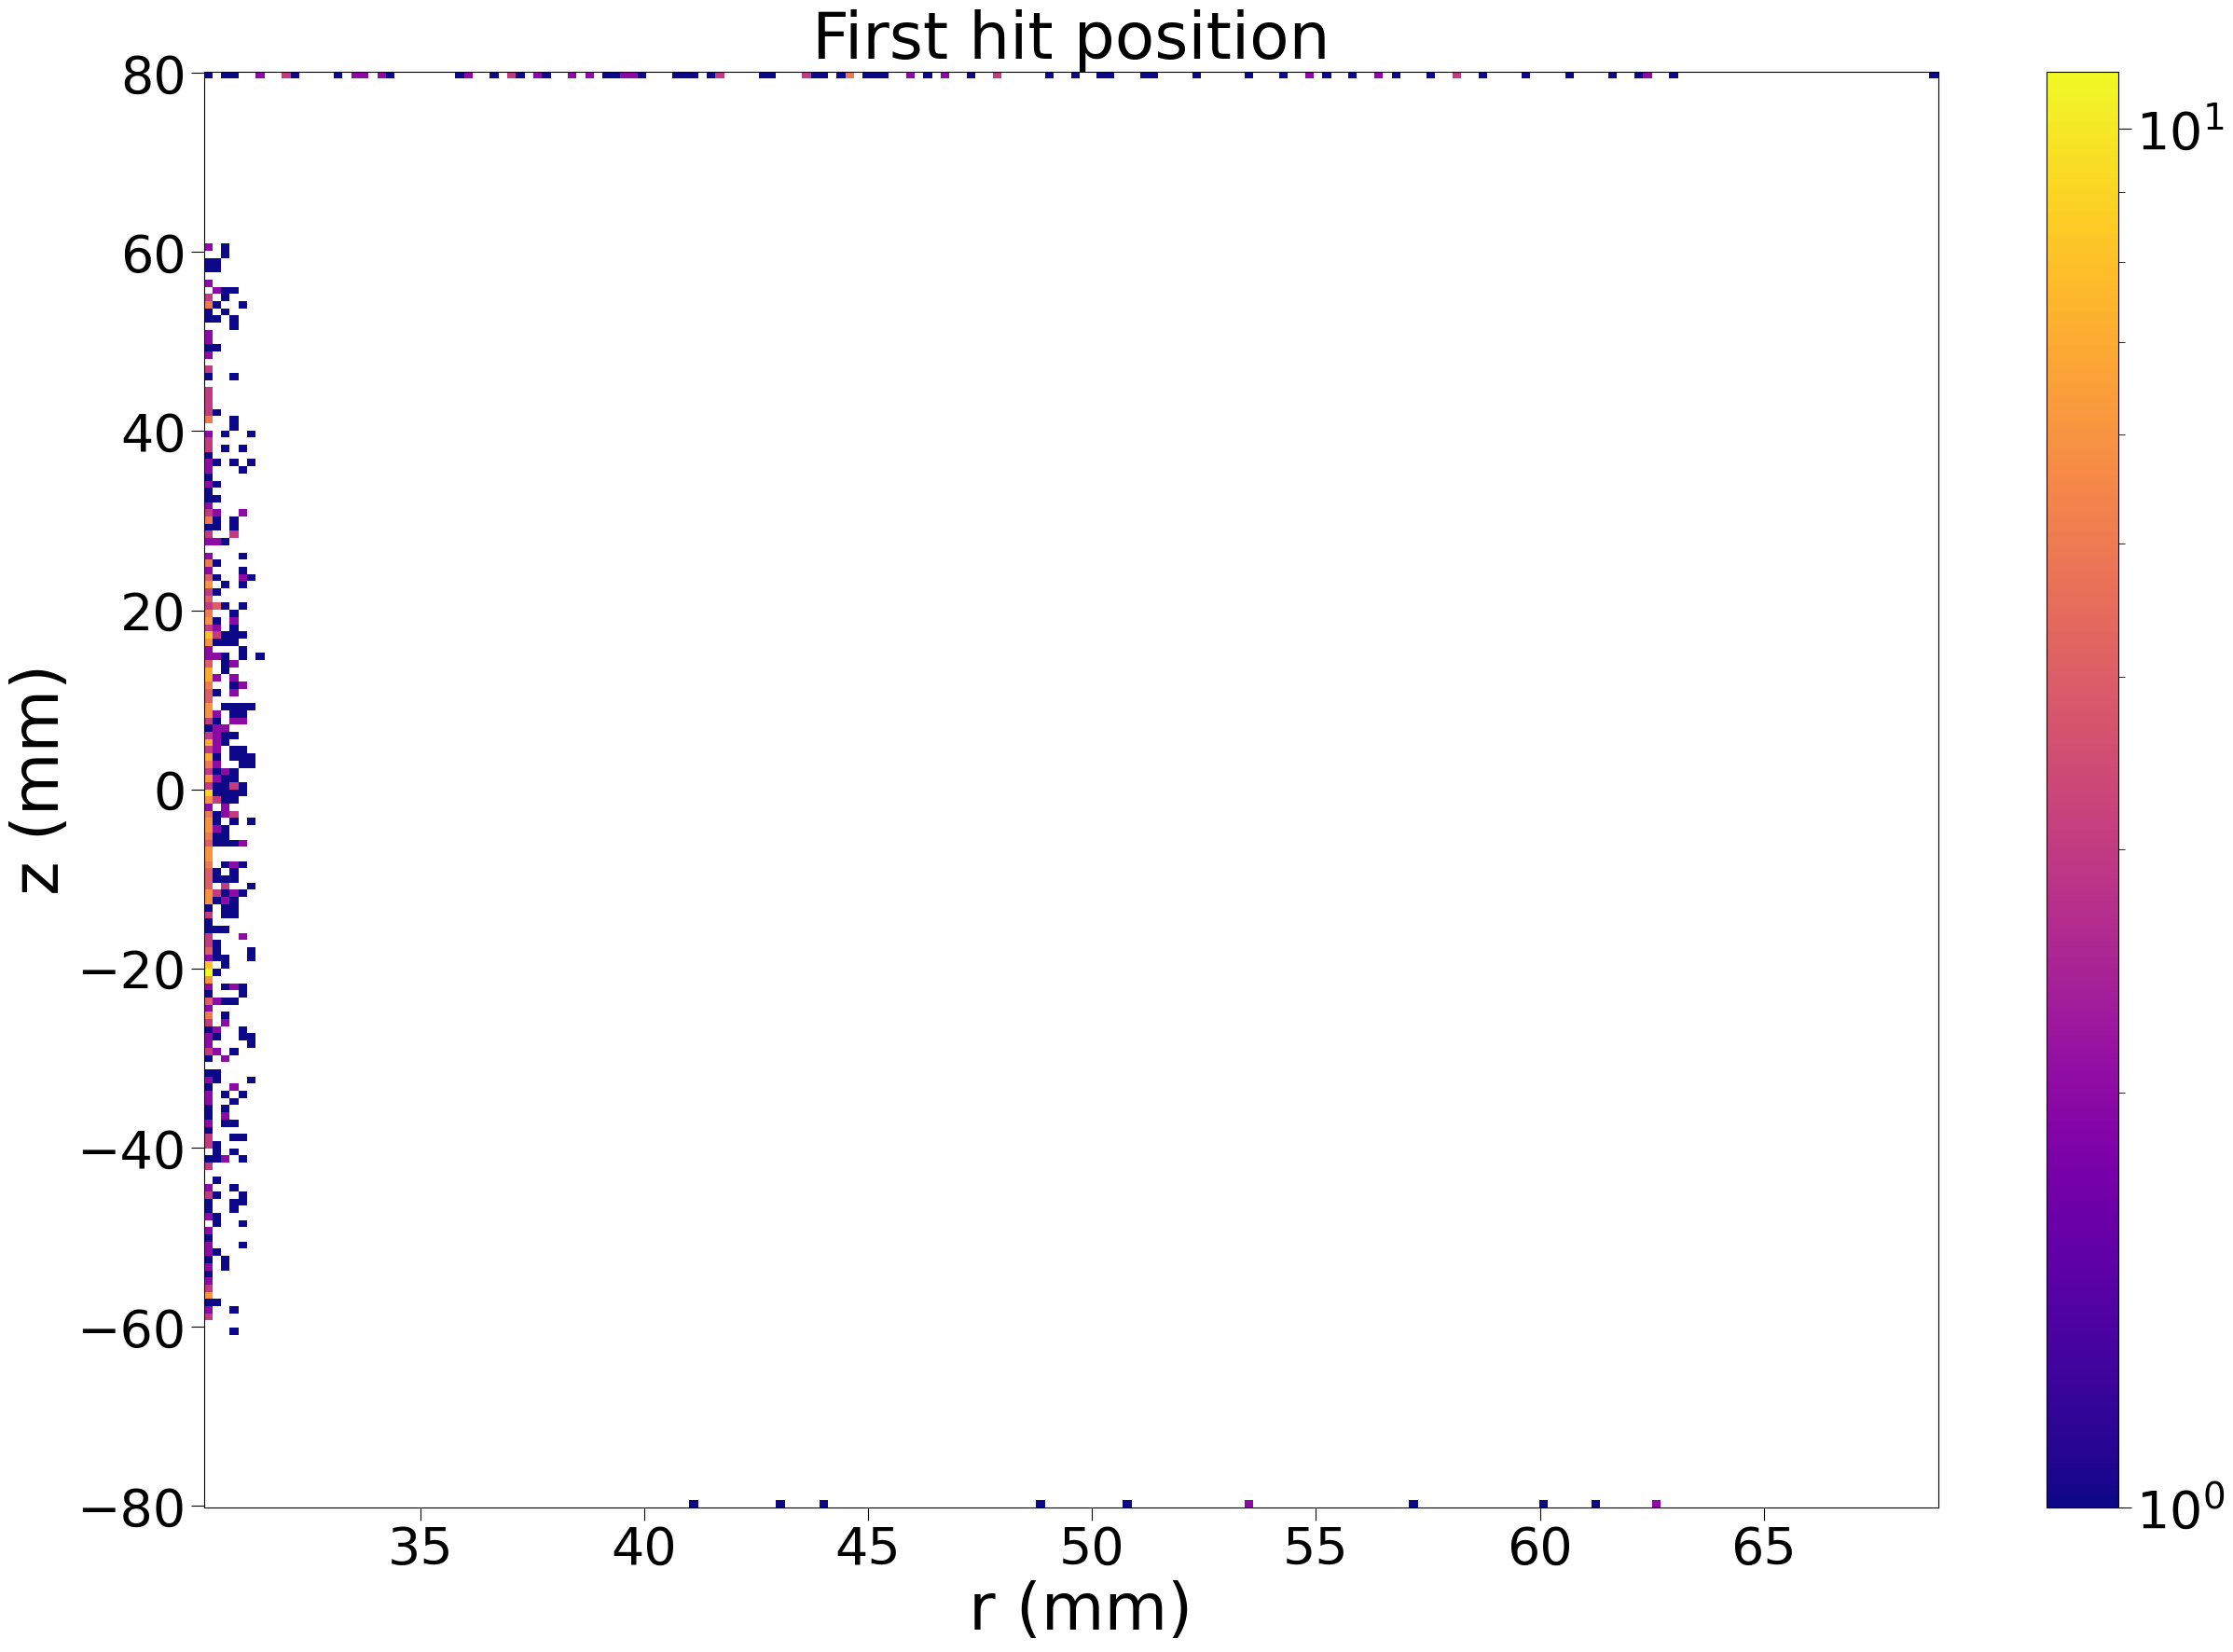

In [81]:
plot2DHistogram(hit["r"][(mask[0]&mask[4]).astype(bool) | (mask[2]&mask[5]).astype(bool)],hit["z"][(mask[0]&mask[4]).astype(bool) | (mask[2]&mask[5]).astype(bool)], label="First hit position; r (mm); z (mm)", bins=200)

In [88]:
deltaTheta=np.abs(hit["theta"][(mask[0] & mask[4]).astype(bool)])

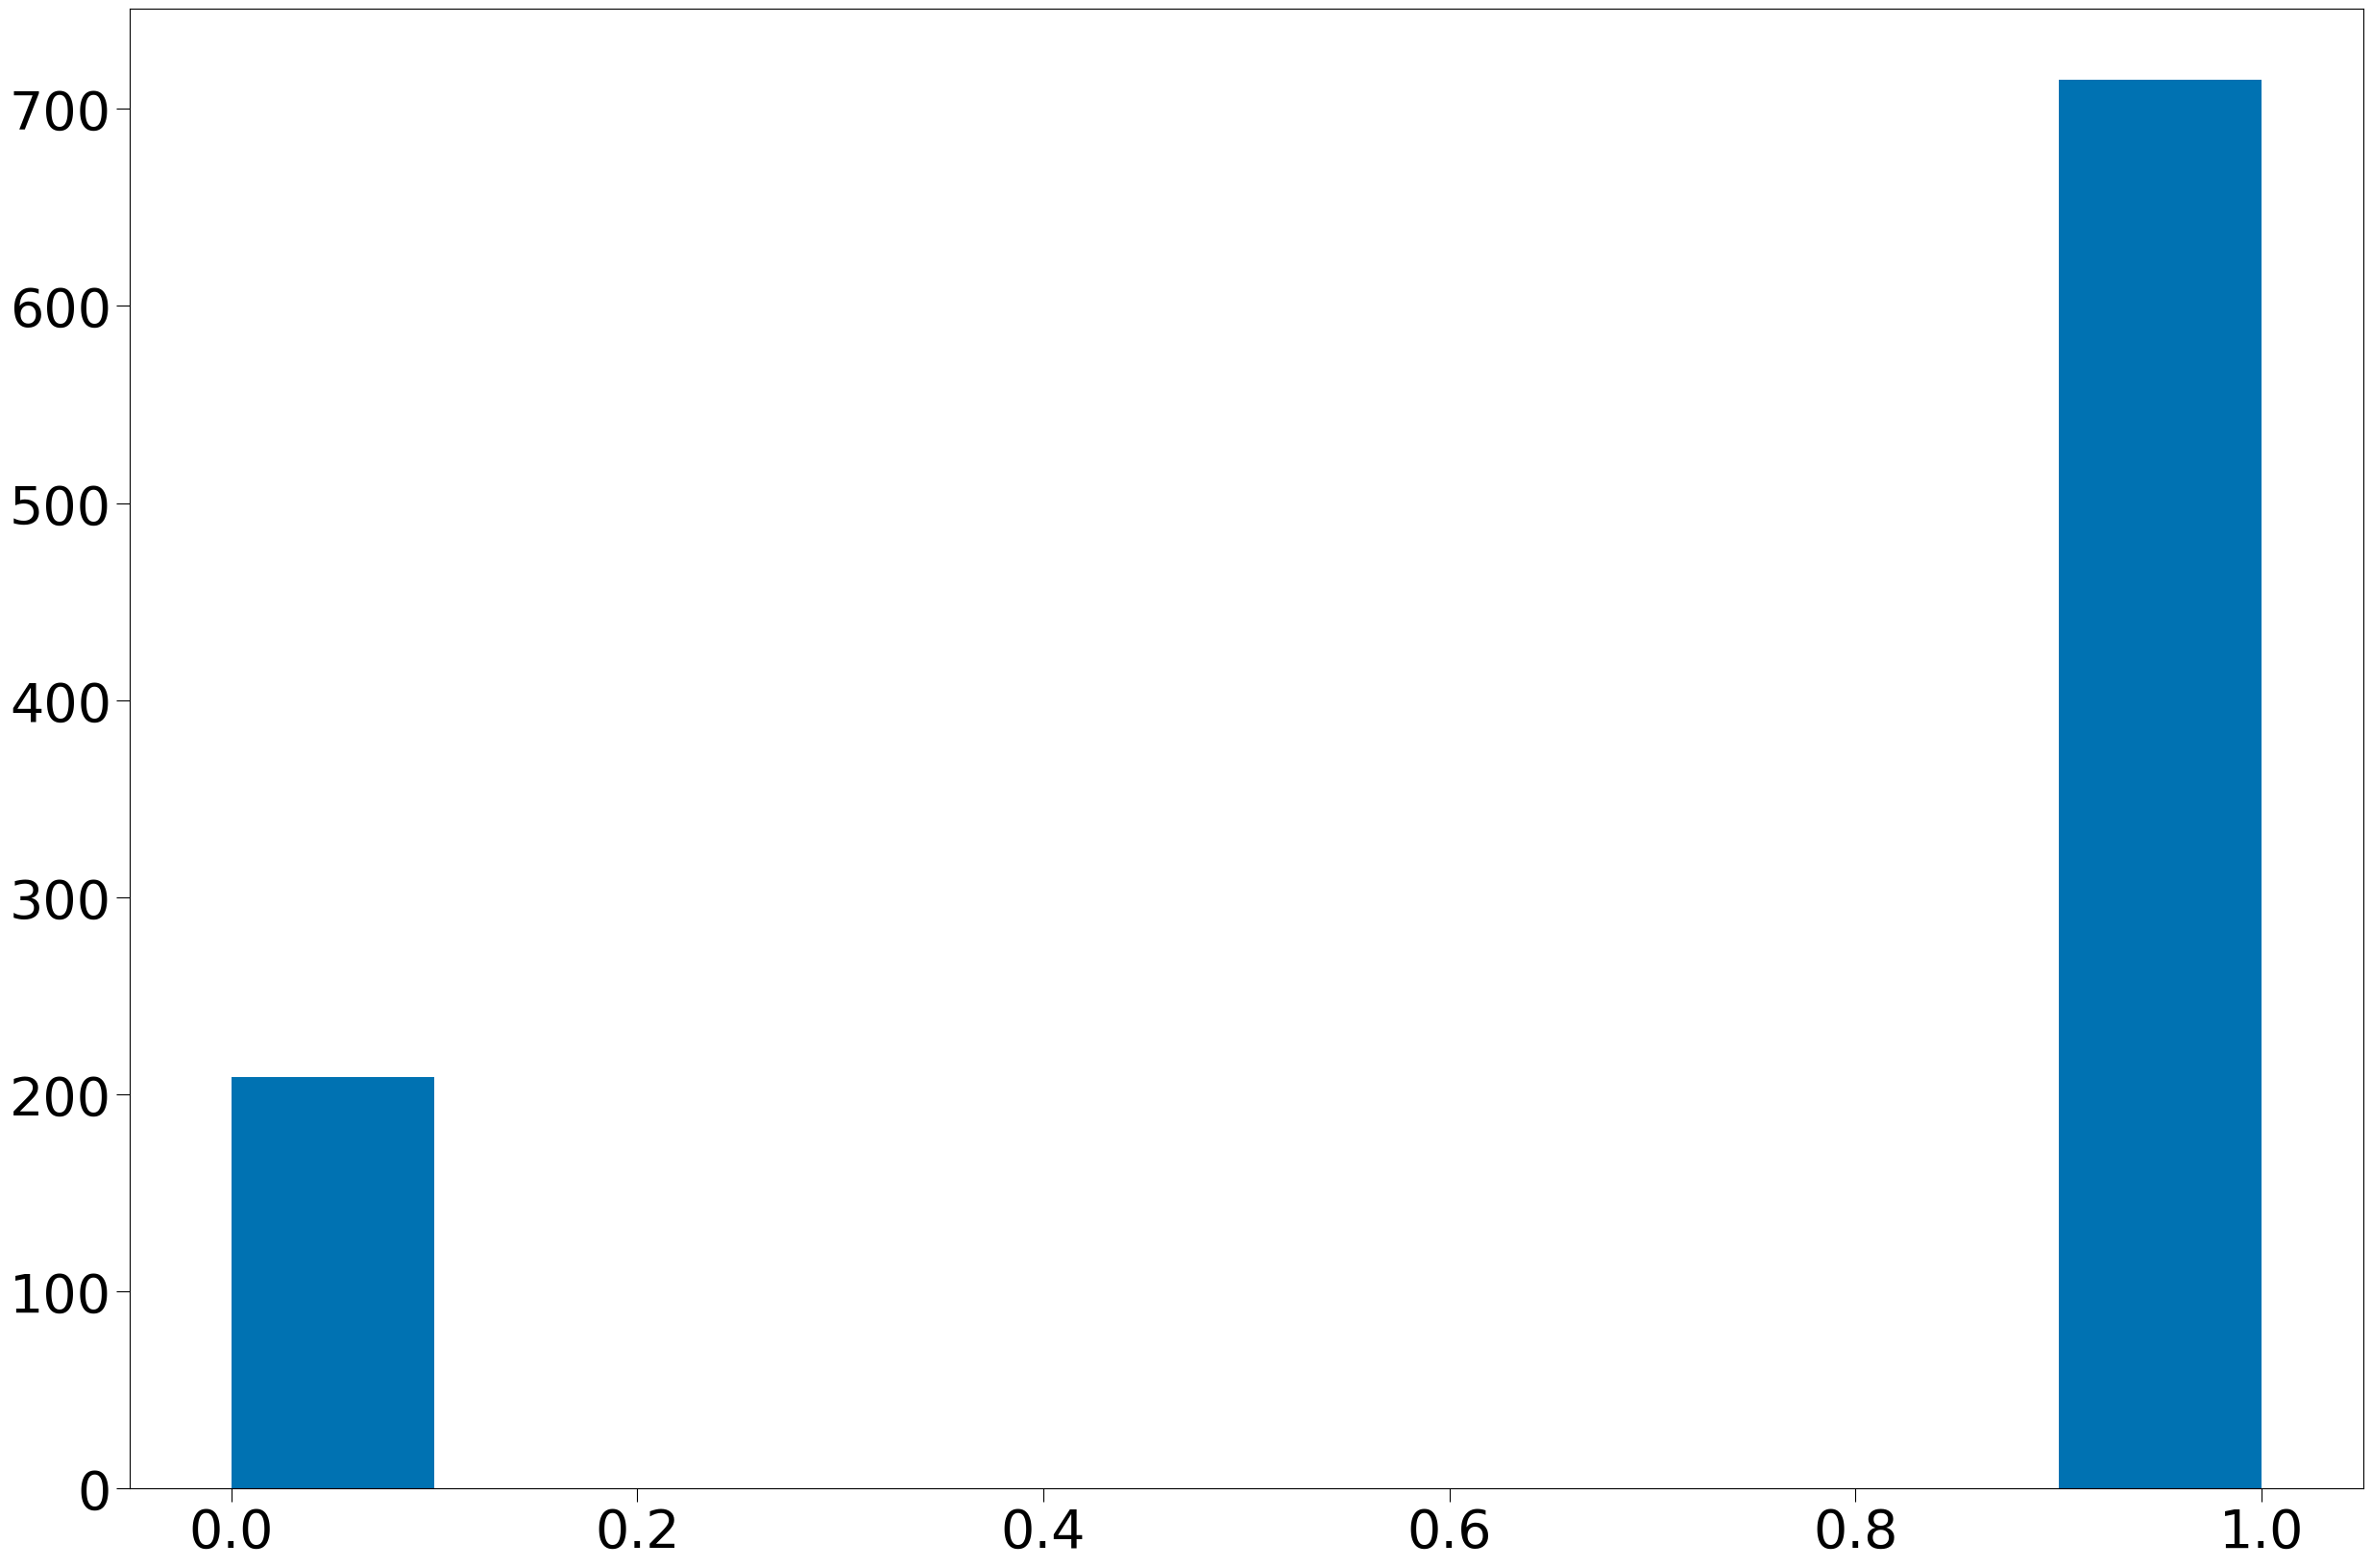

In [91]:
plot1DHistogram(np.sum((mask[0]&mask[4]).astype(bool),axis=0),bins=10)

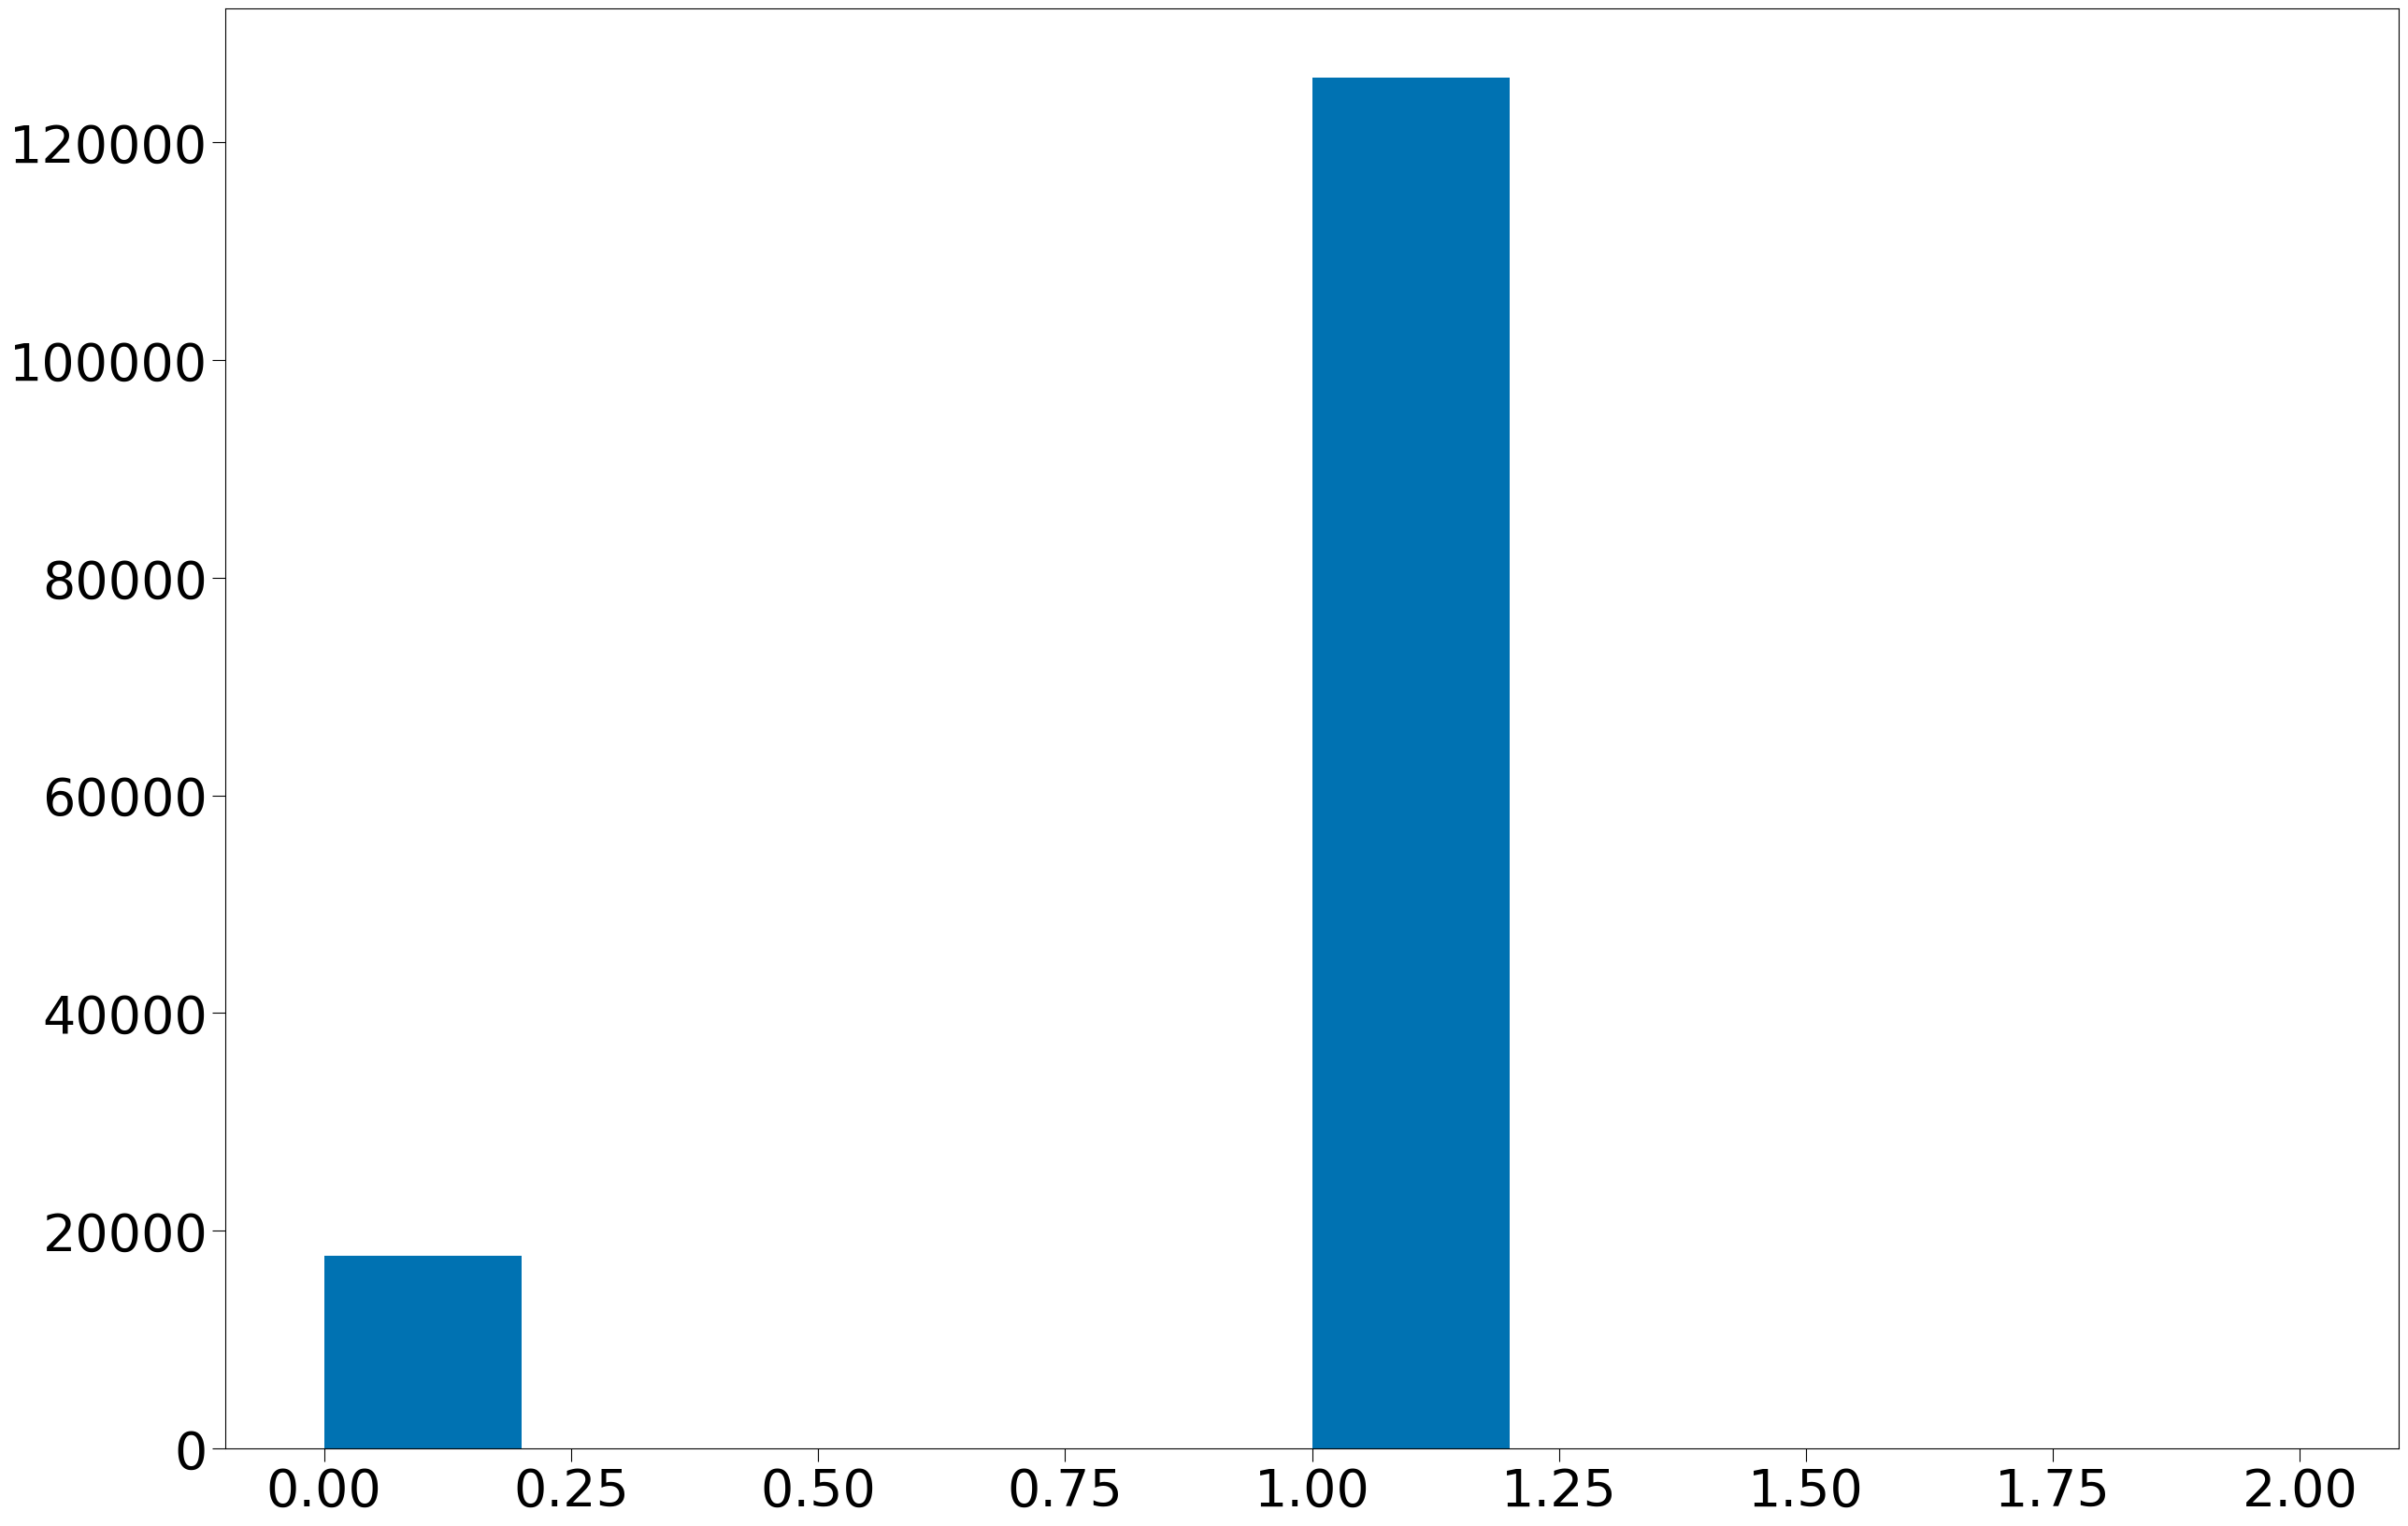

In [90]:
plot1DHistogram(np.sum(maskBIB[0],axis=0),bins=10)

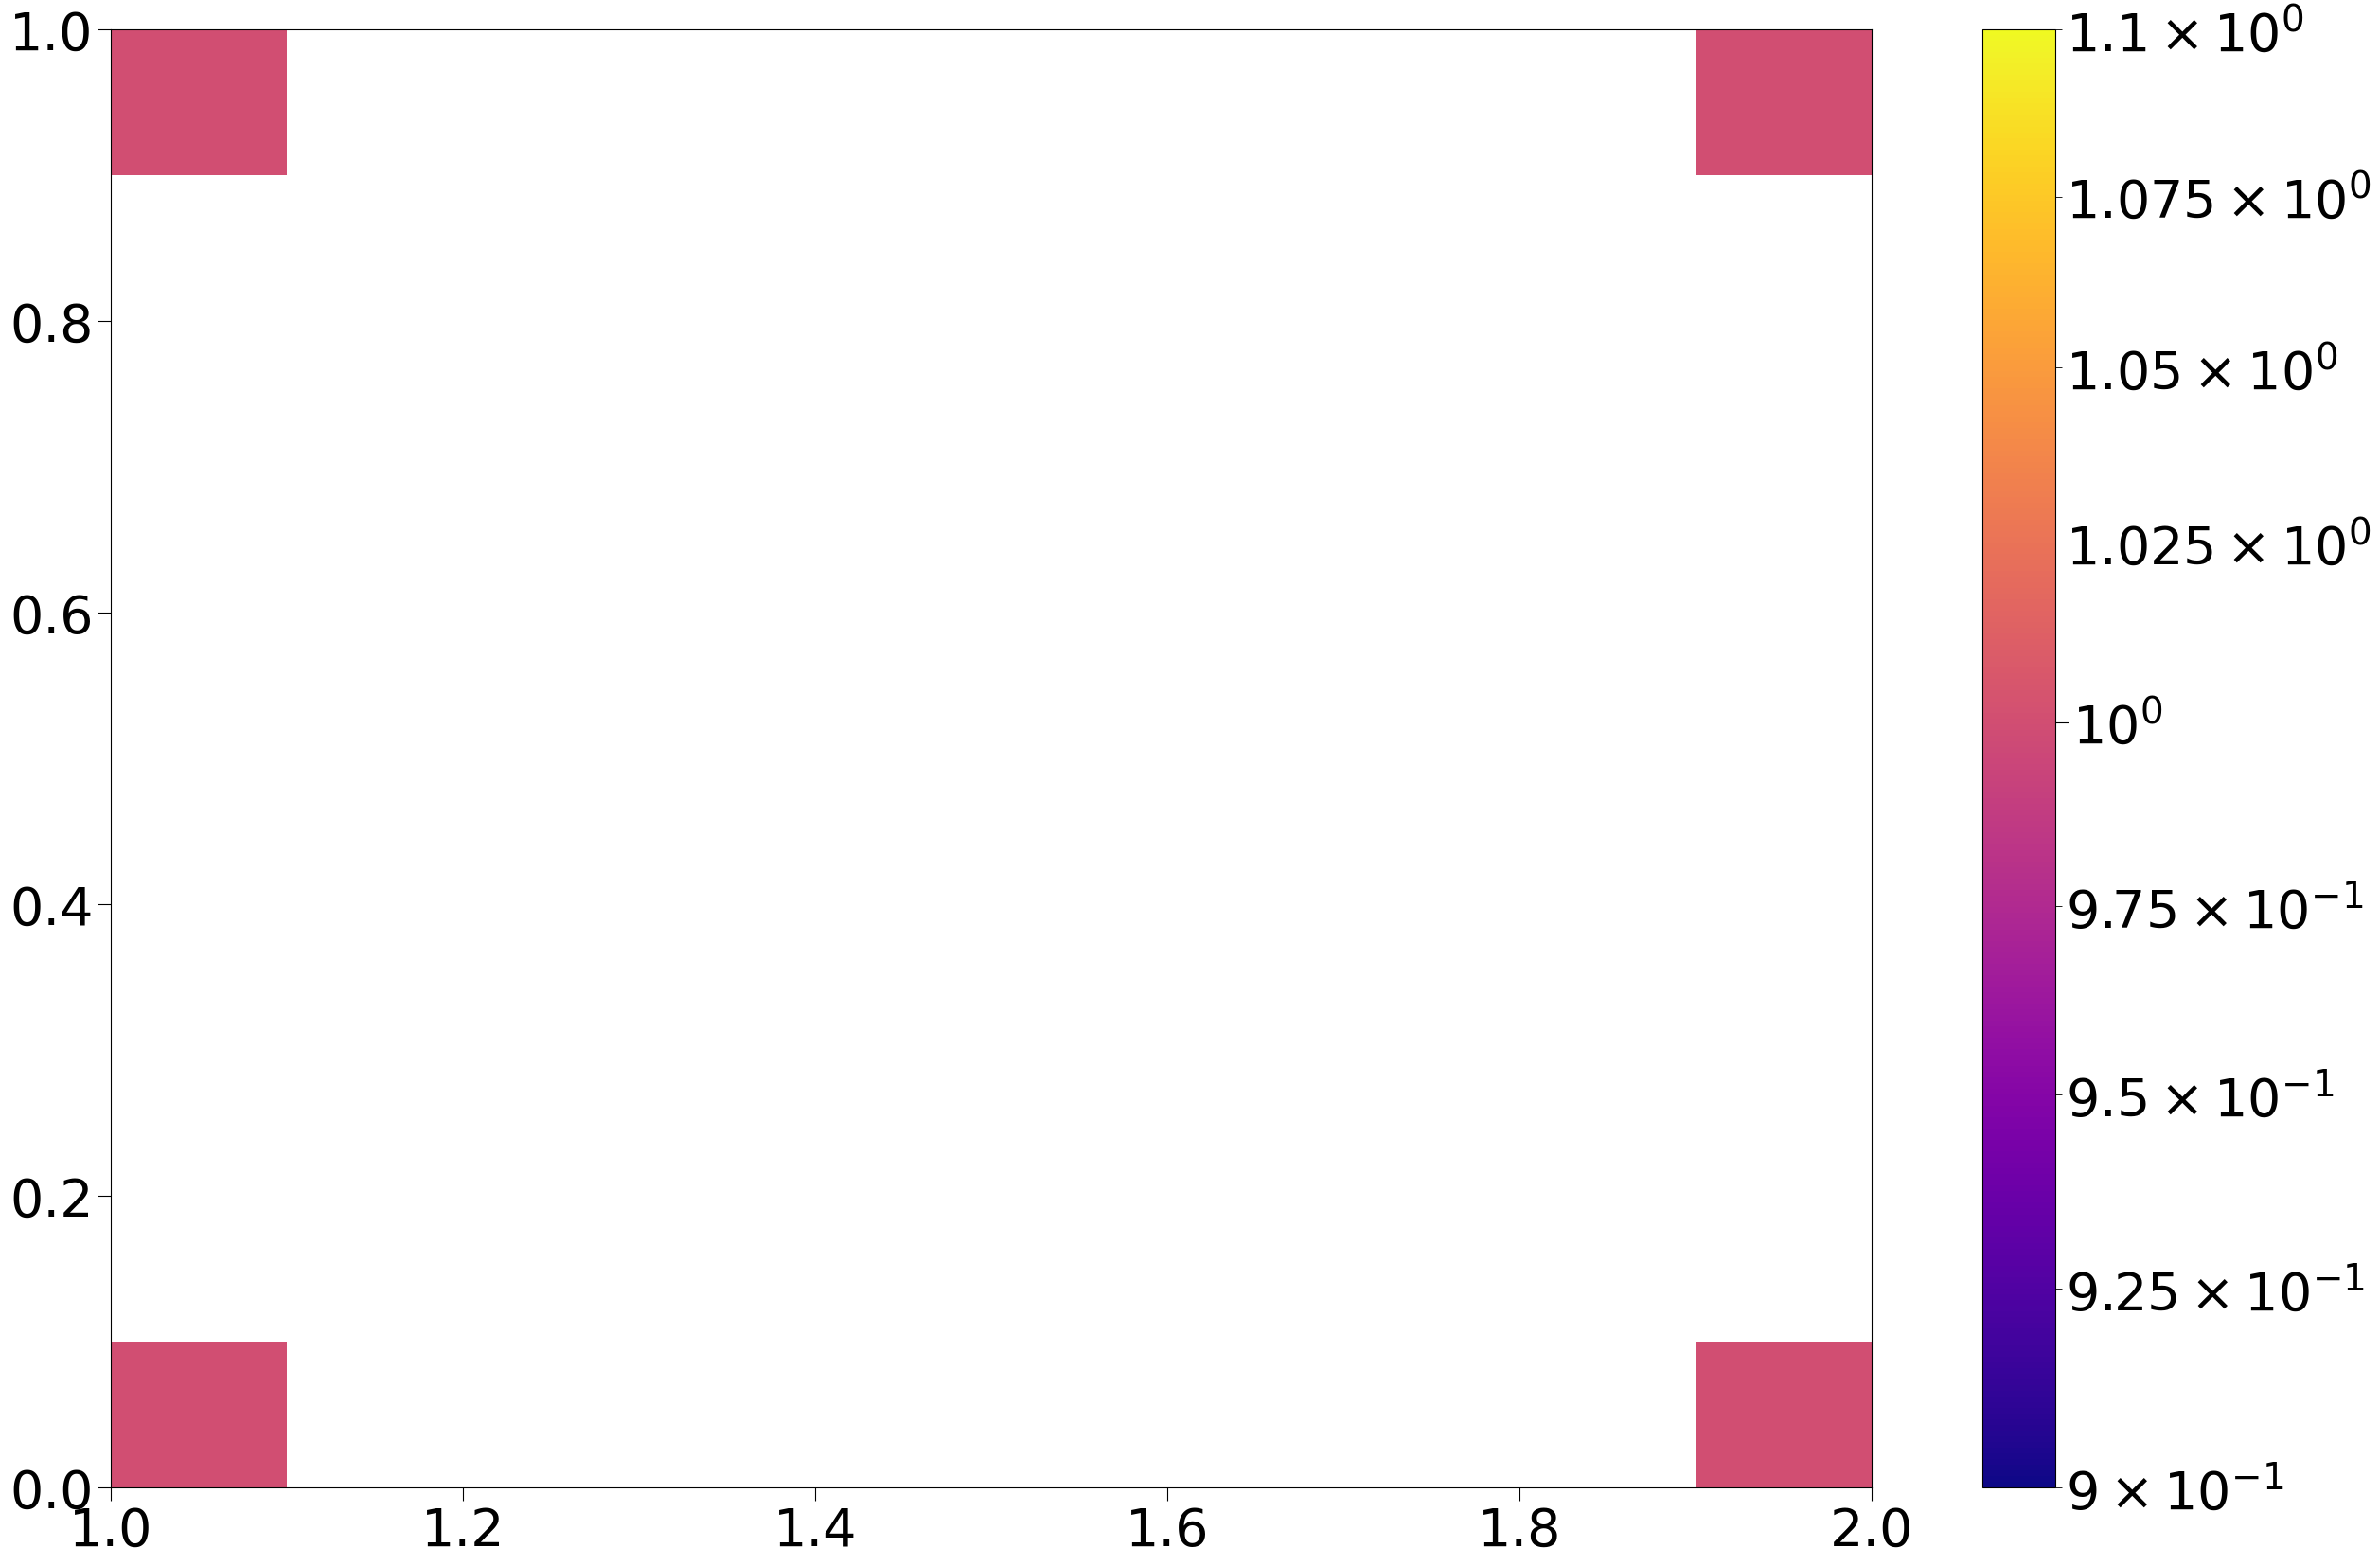

In [24]:
plot2DHistogram(hit["sys"][:,1], hit["lay"][:,1],bins=10)

In [92]:
deltaTheta=(hit["theta"][(mask[0] & mask[4]).astype(bool)]-hit["theta"][(mask[1] & mask[4]).astype(bool)])
deltaThetaBIB=(hitBIB["theta"][(maskBIB[0] & maskBIB[4]).astype(bool)]-hitBIB["theta"][(maskBIB[1] & maskBIB[4]).astype(bool)])

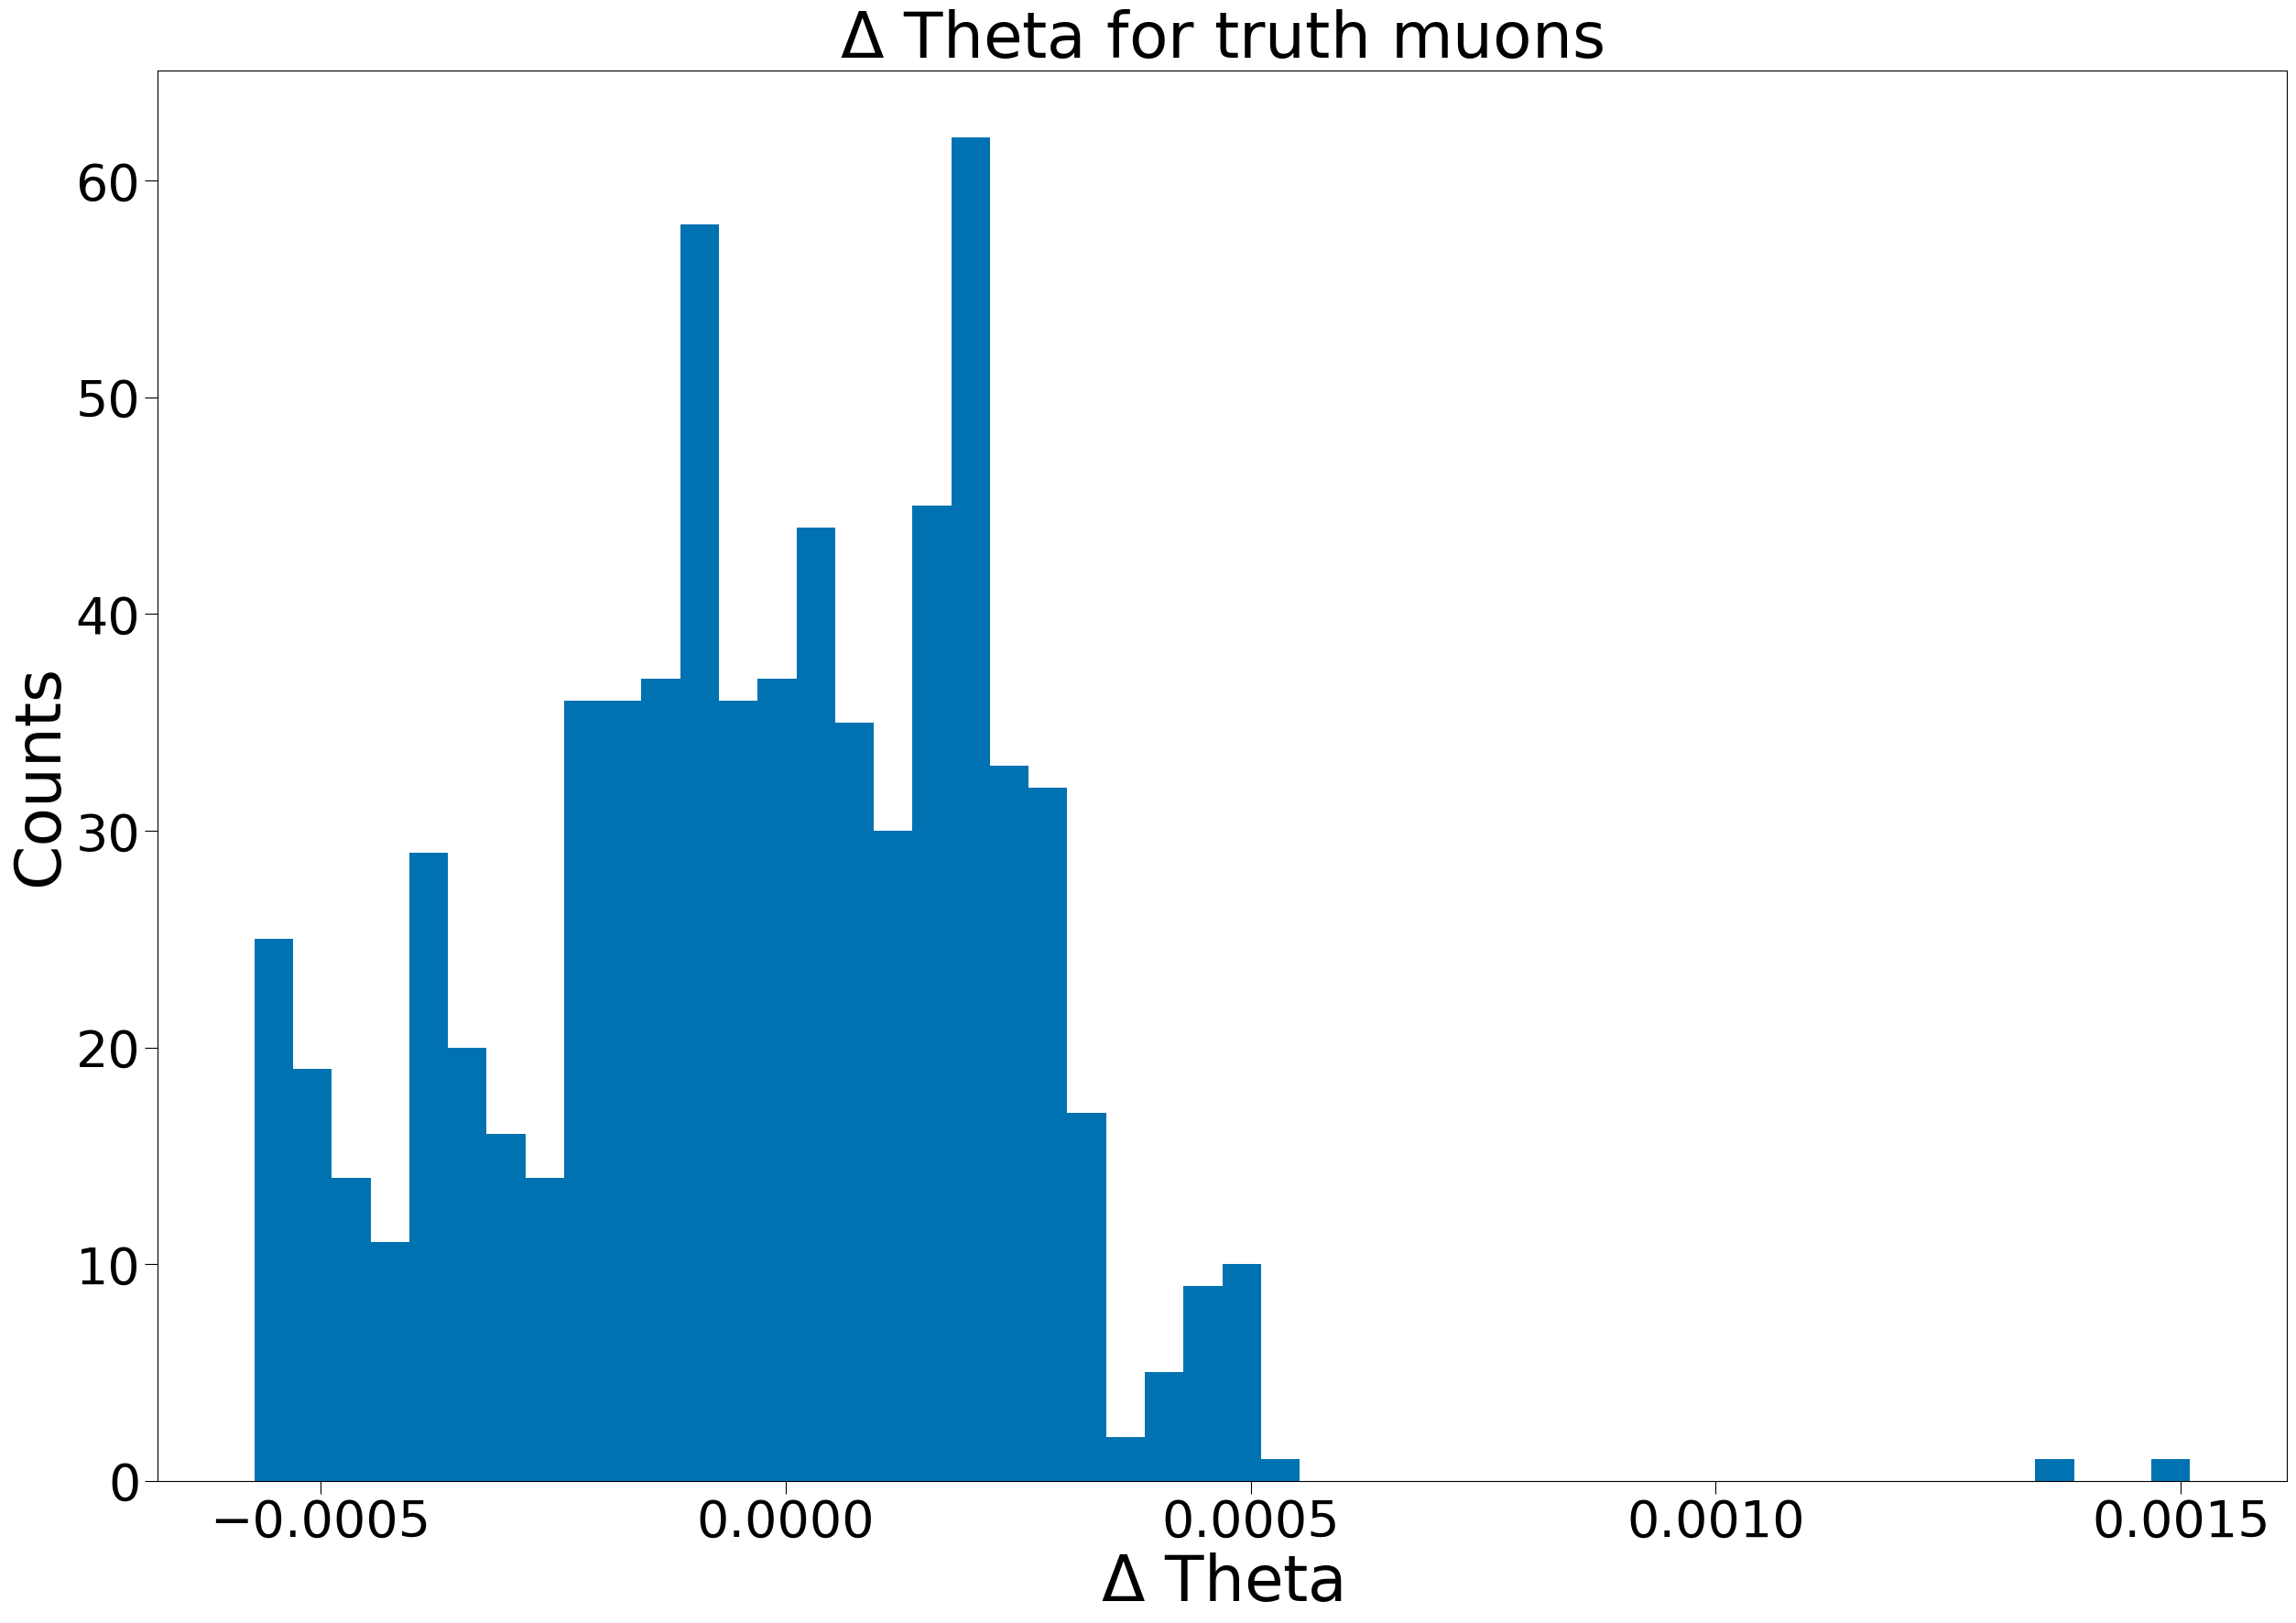

In [93]:
plot1DHistogram(deltaTheta, bins=50, label=f"$\Delta$ Theta for truth muons;$\Delta$ Theta;Counts")

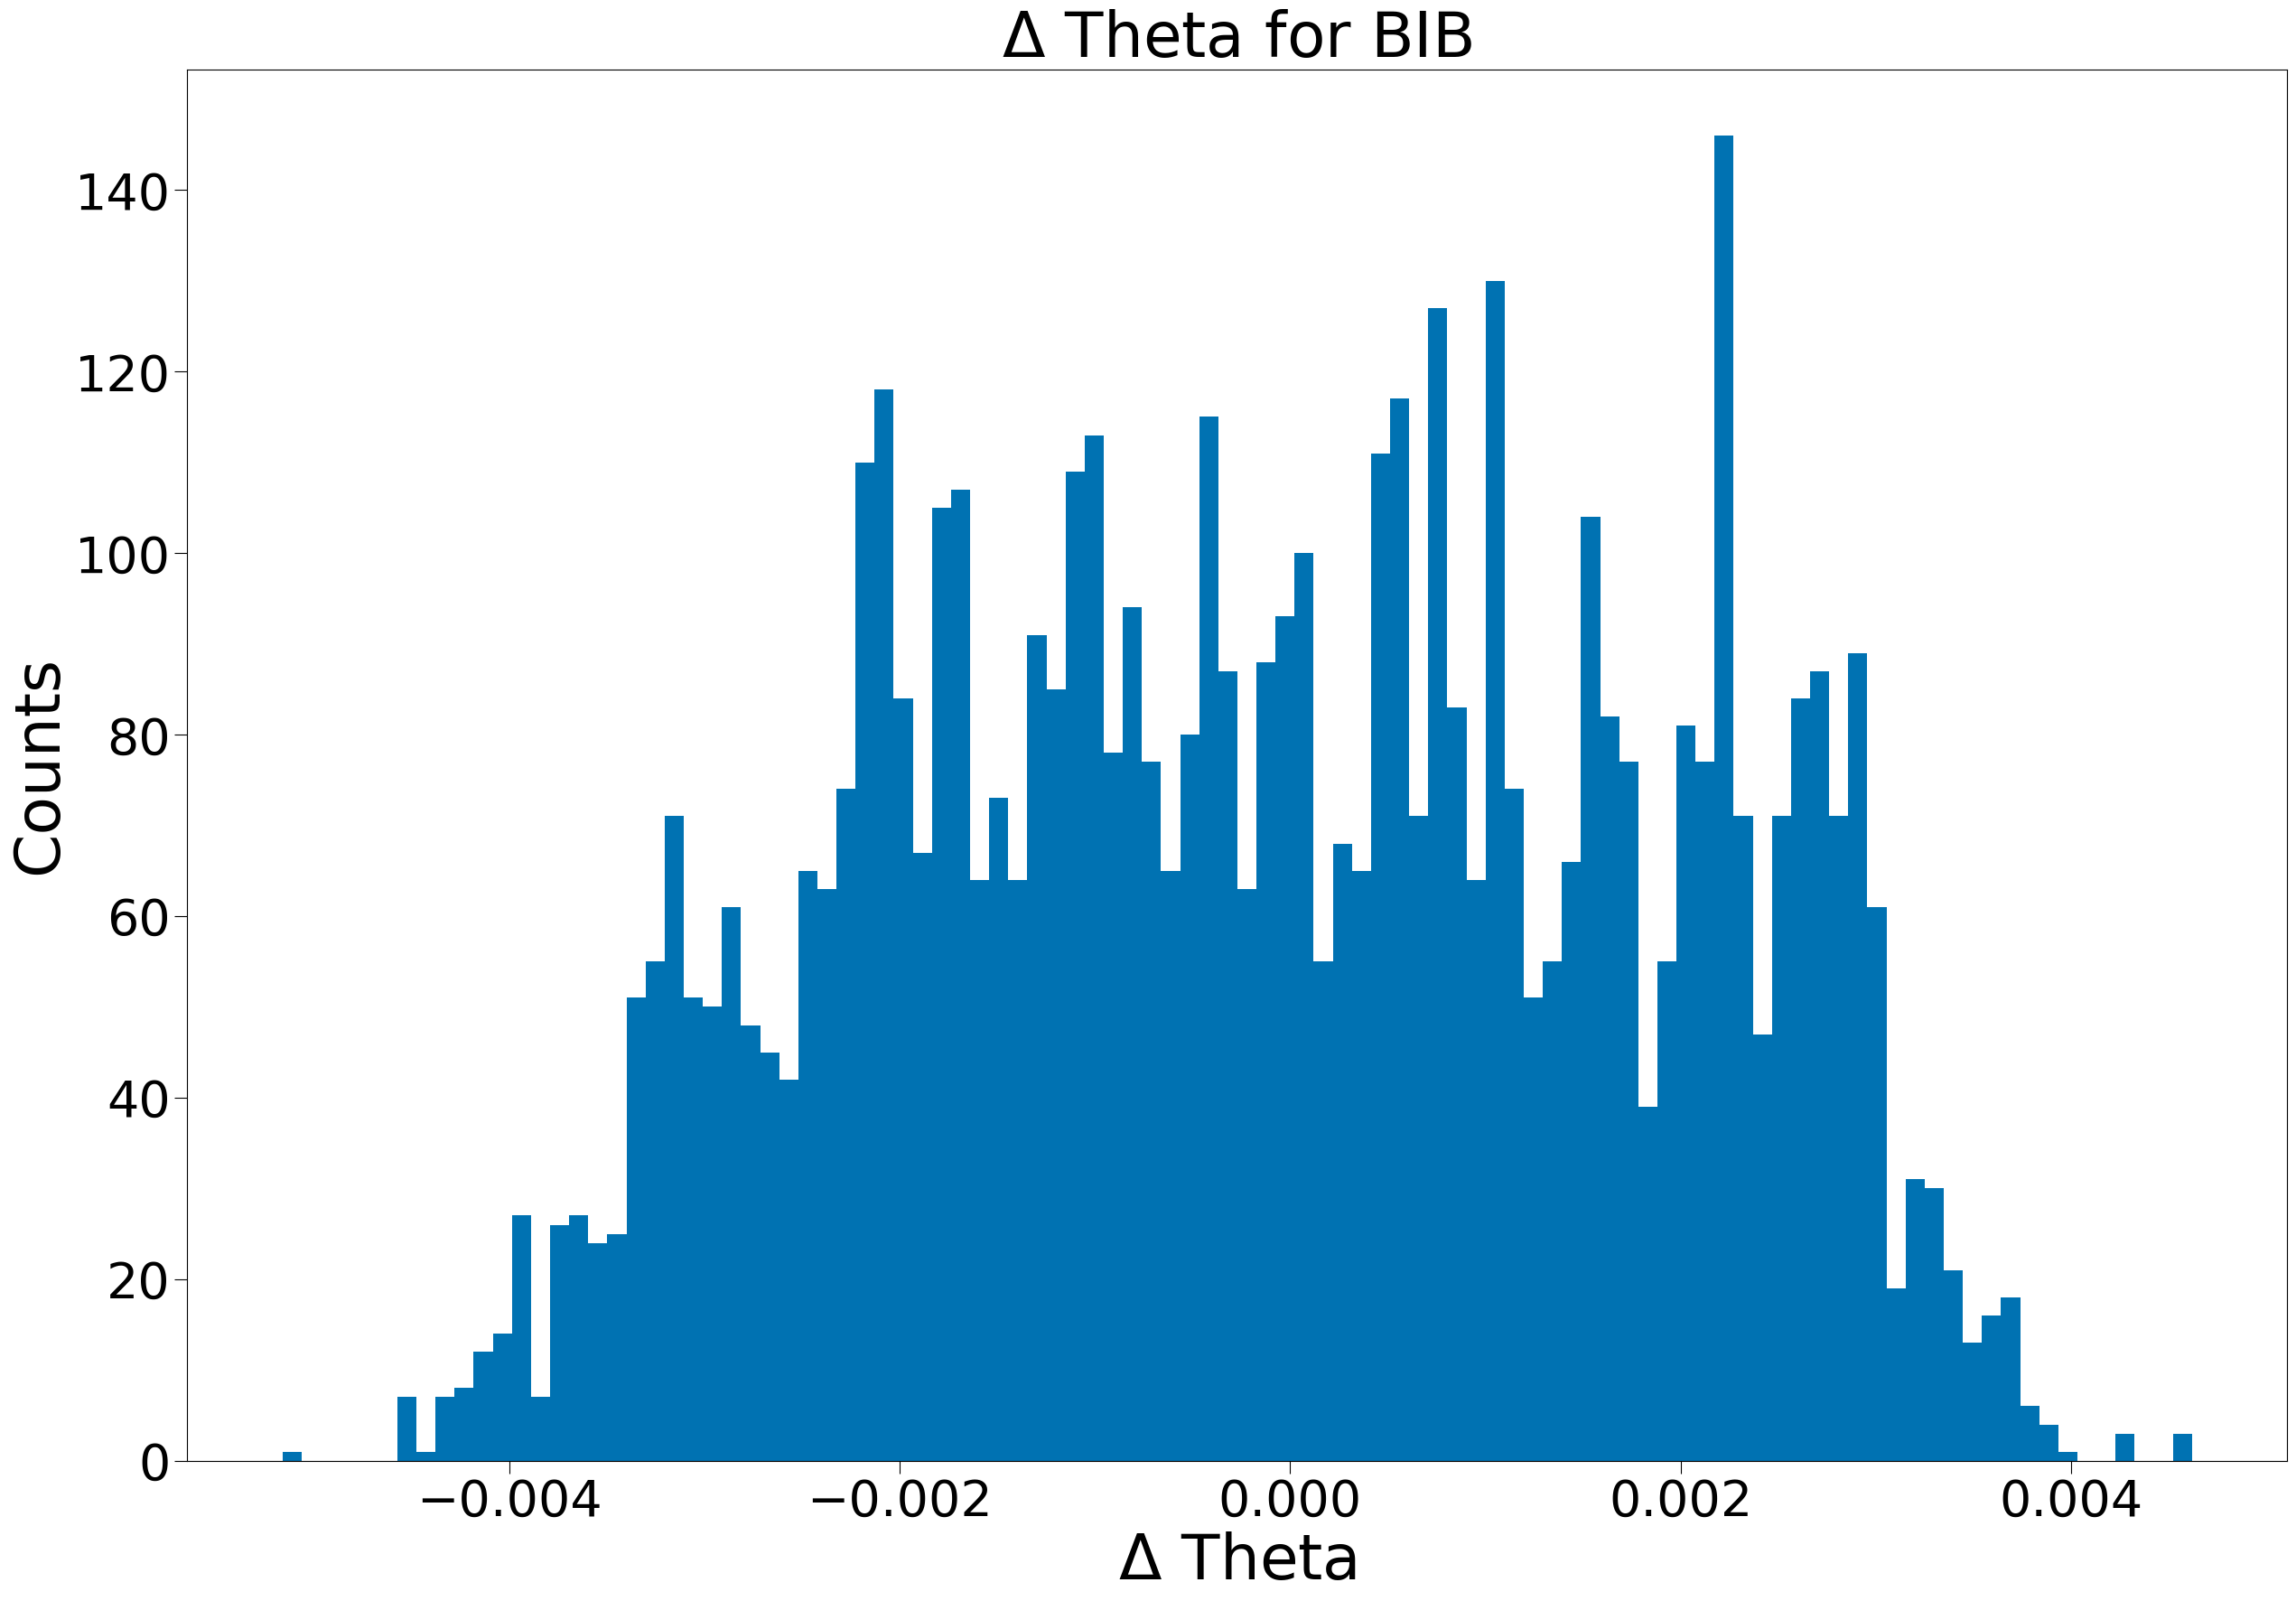

In [94]:
plot1DHistogram(deltaThetaBIB, bins=100, label=f"$\Delta$ Theta for BIB;$\Delta$ Theta;Counts")

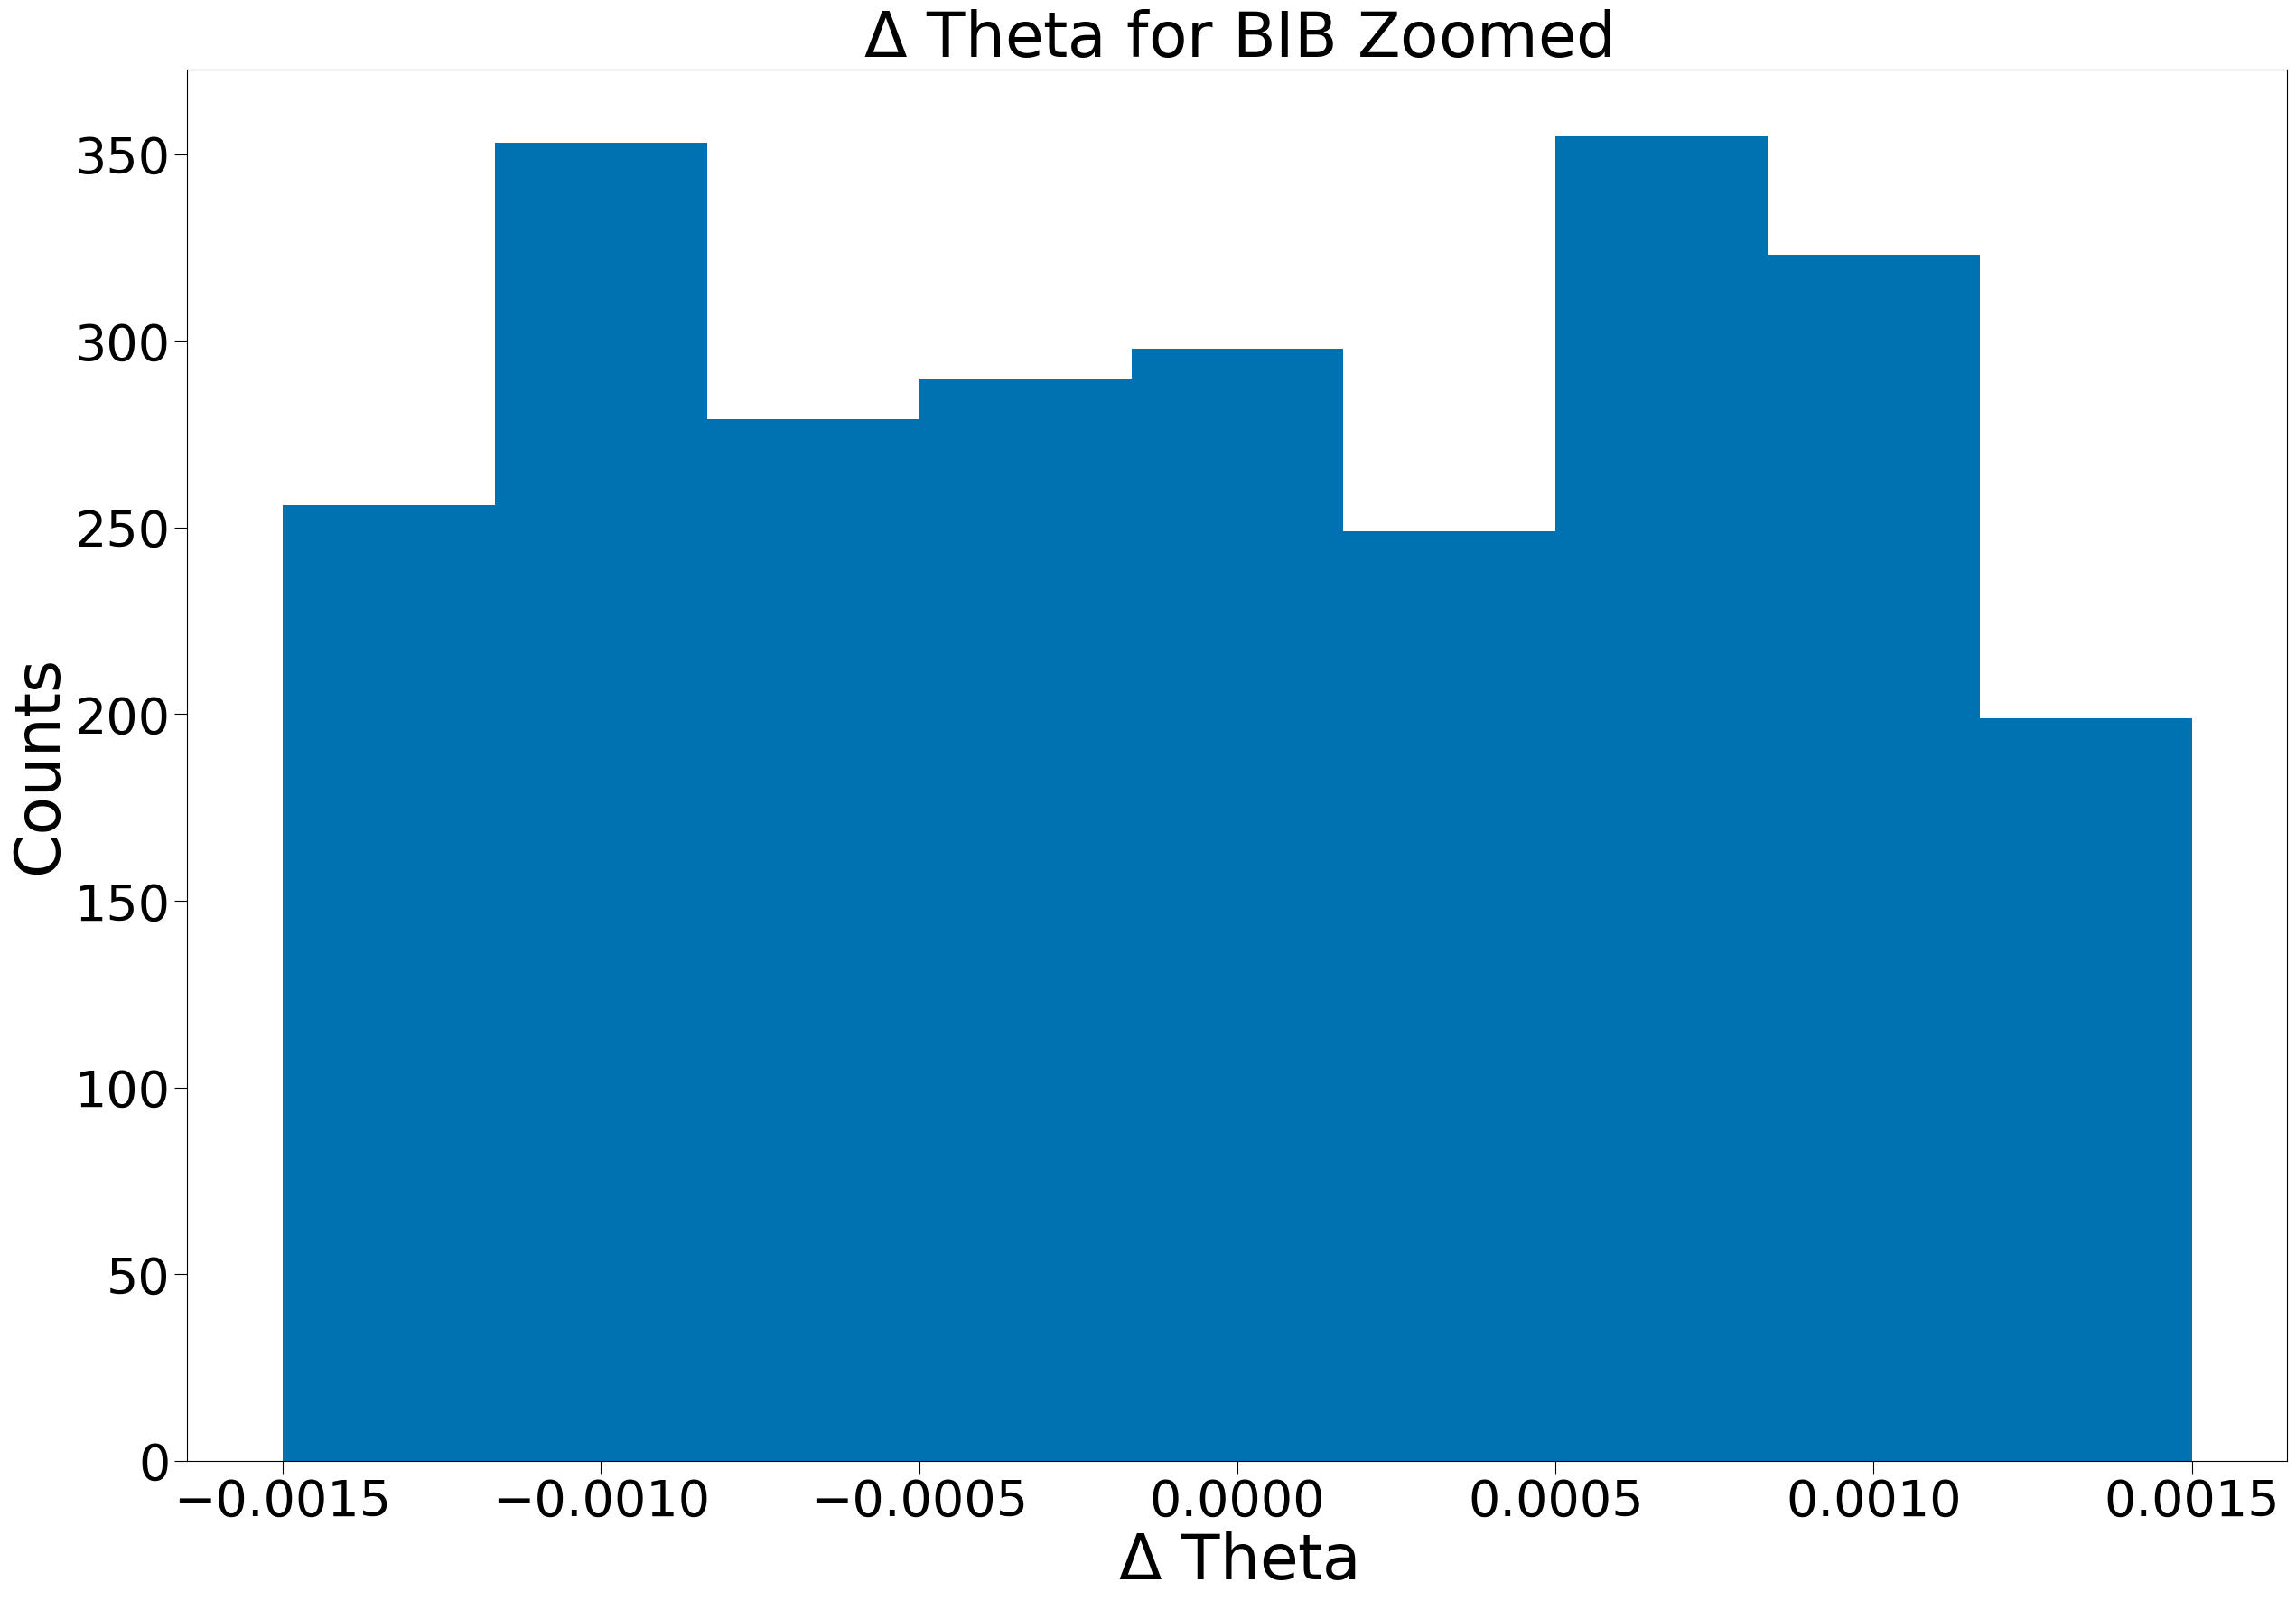

In [95]:
plot1DHistogram(deltaThetaBIB, bins=np.linspace(-0.0015,0.0015,10), label=f"$\Delta$ Theta for BIB Zoomed;$\Delta$ Theta;Counts")
#69 total hits, and we expect to see 30

In [102]:
deltaPhi=hit["phi"][(mask[0] & mask[4]).astype(bool)]-hit["phi"][(mask[1] & mask[4]).astype(bool)]
deltaPhiBIB=hitBIB["phi"][(maskBIB[0] & maskBIB[4]).astype(bool)]-hitBIB["phi"][(maskBIB[1] & maskBIB[4]).astype(bool)]

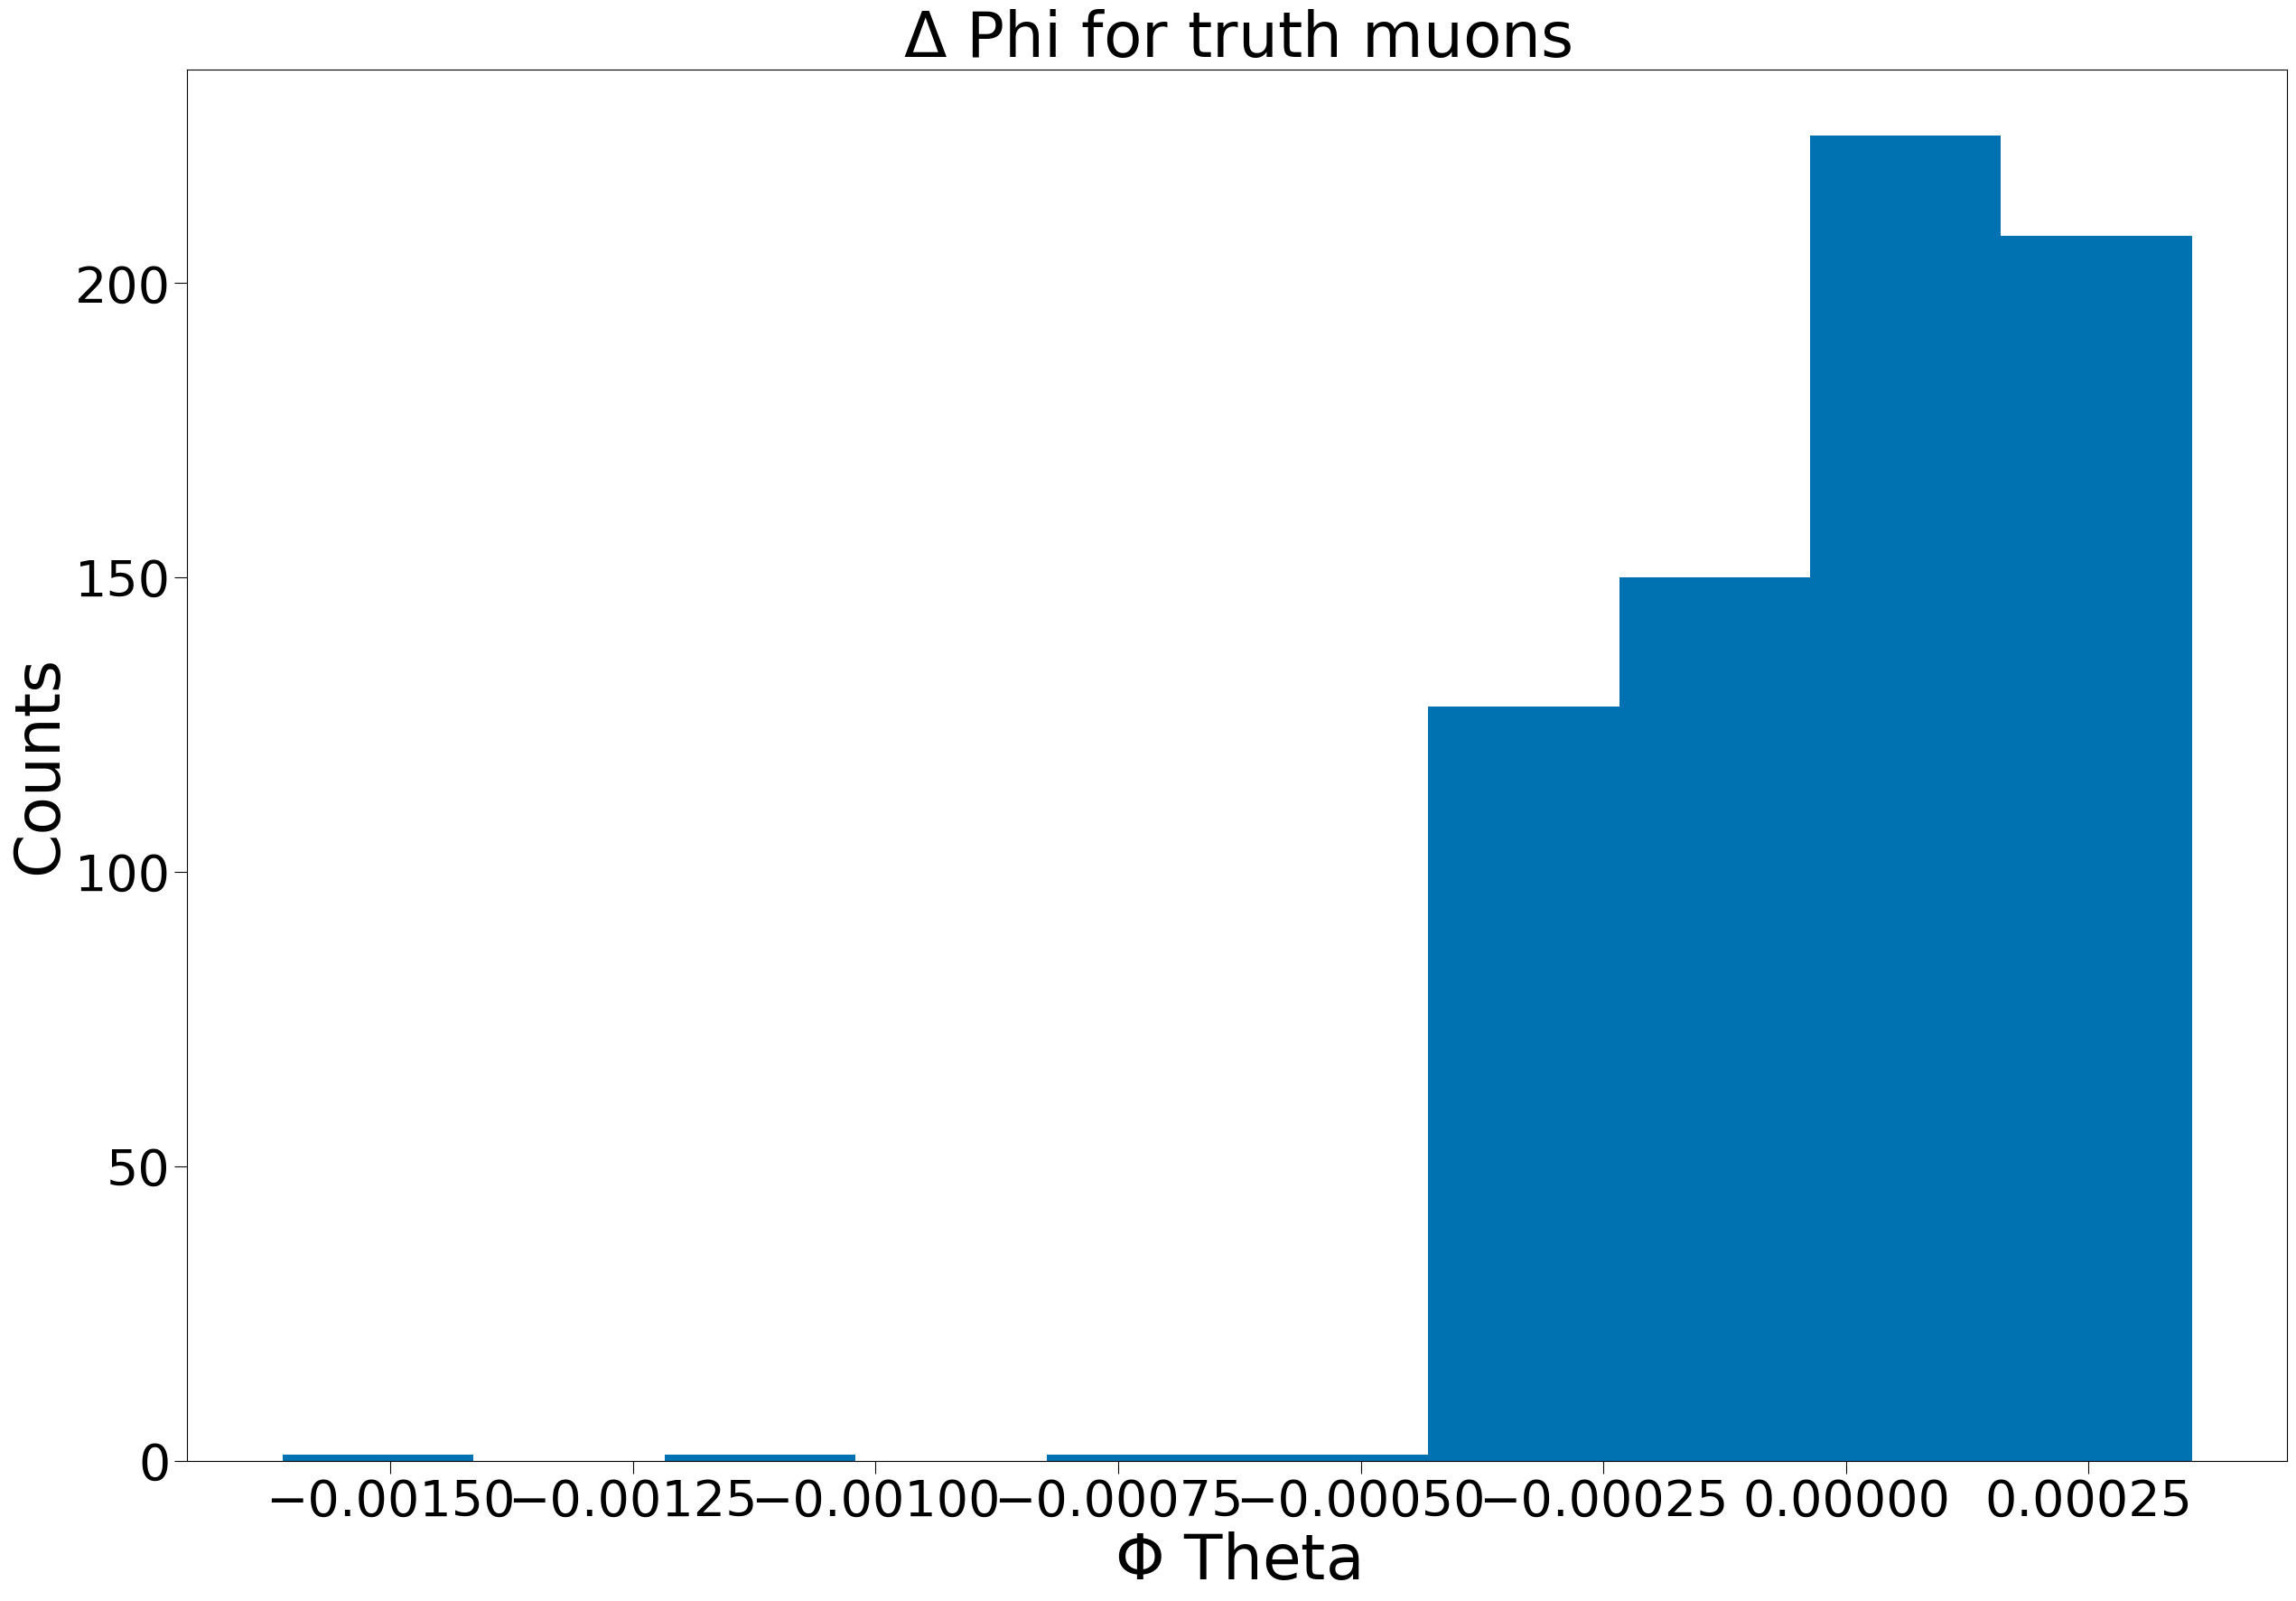

In [103]:
plot1DHistogram(deltaPhi, bins=10, label=f"$\Delta$ Phi for truth muons;$\Phi$ Theta;Counts")

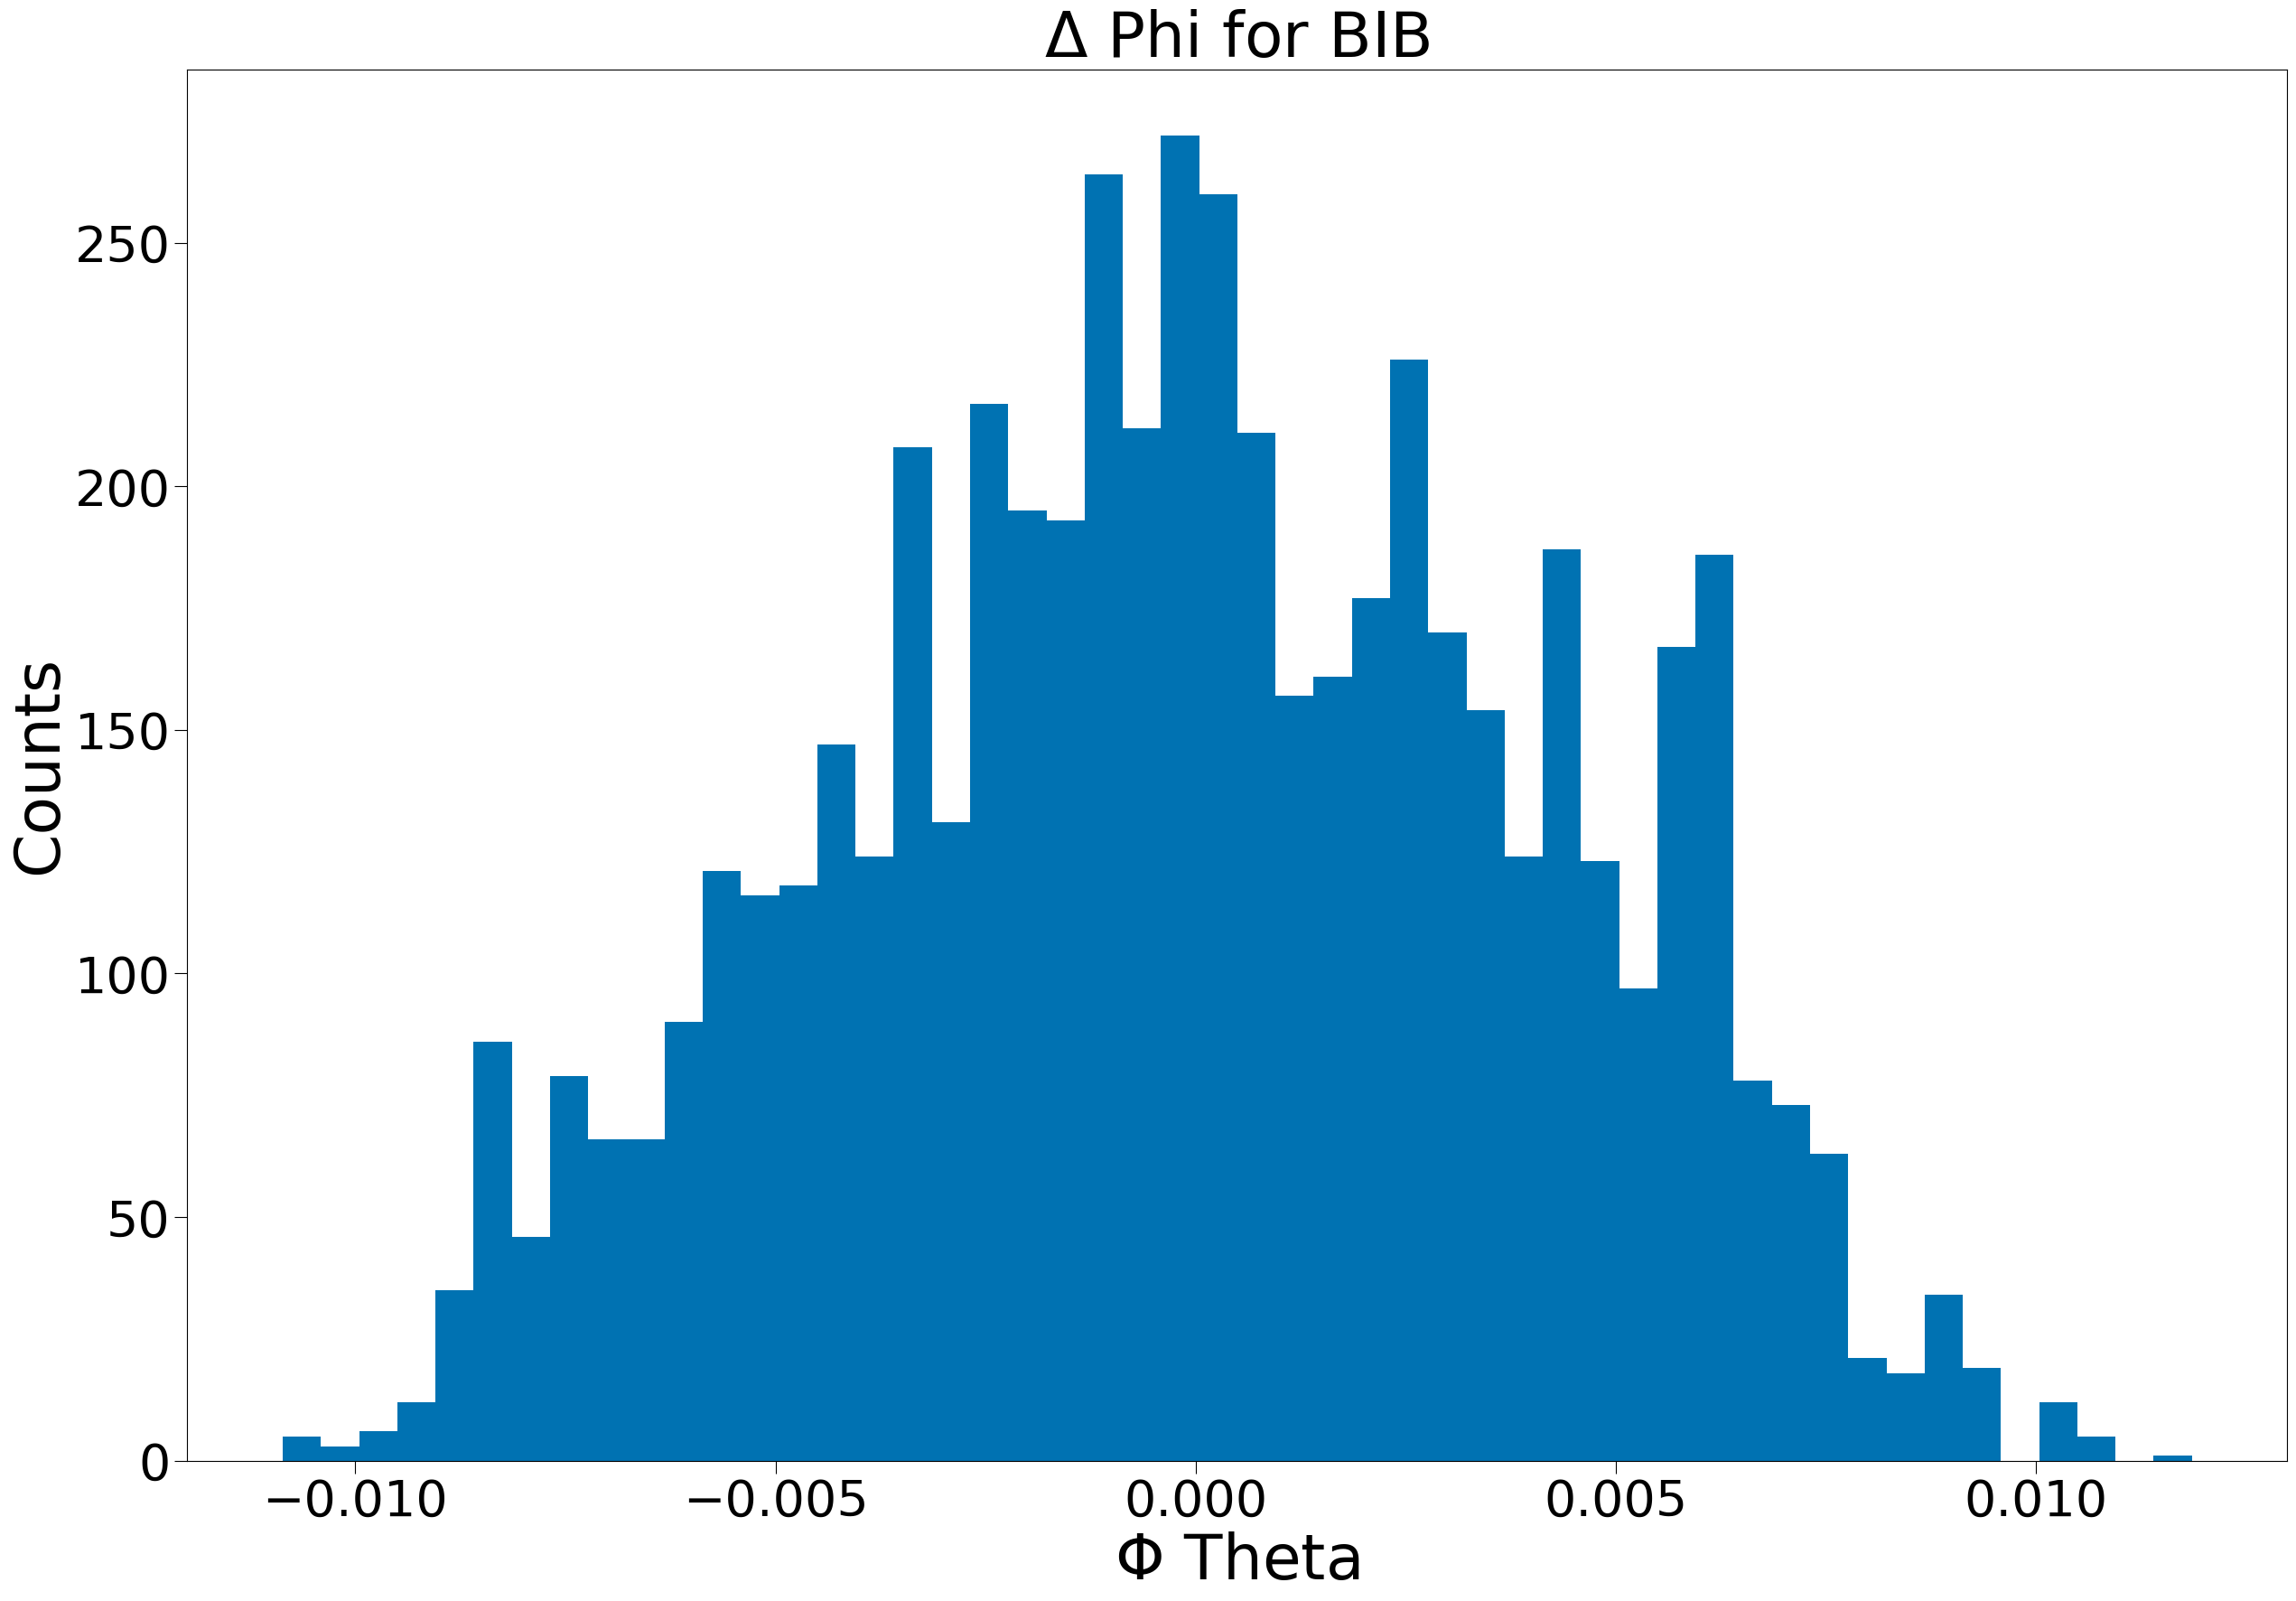

In [104]:
plot1DHistogram(deltaPhiBIB, bins=50, label=f"$\Delta$ Phi for BIB;$\Phi$ Theta;Counts")

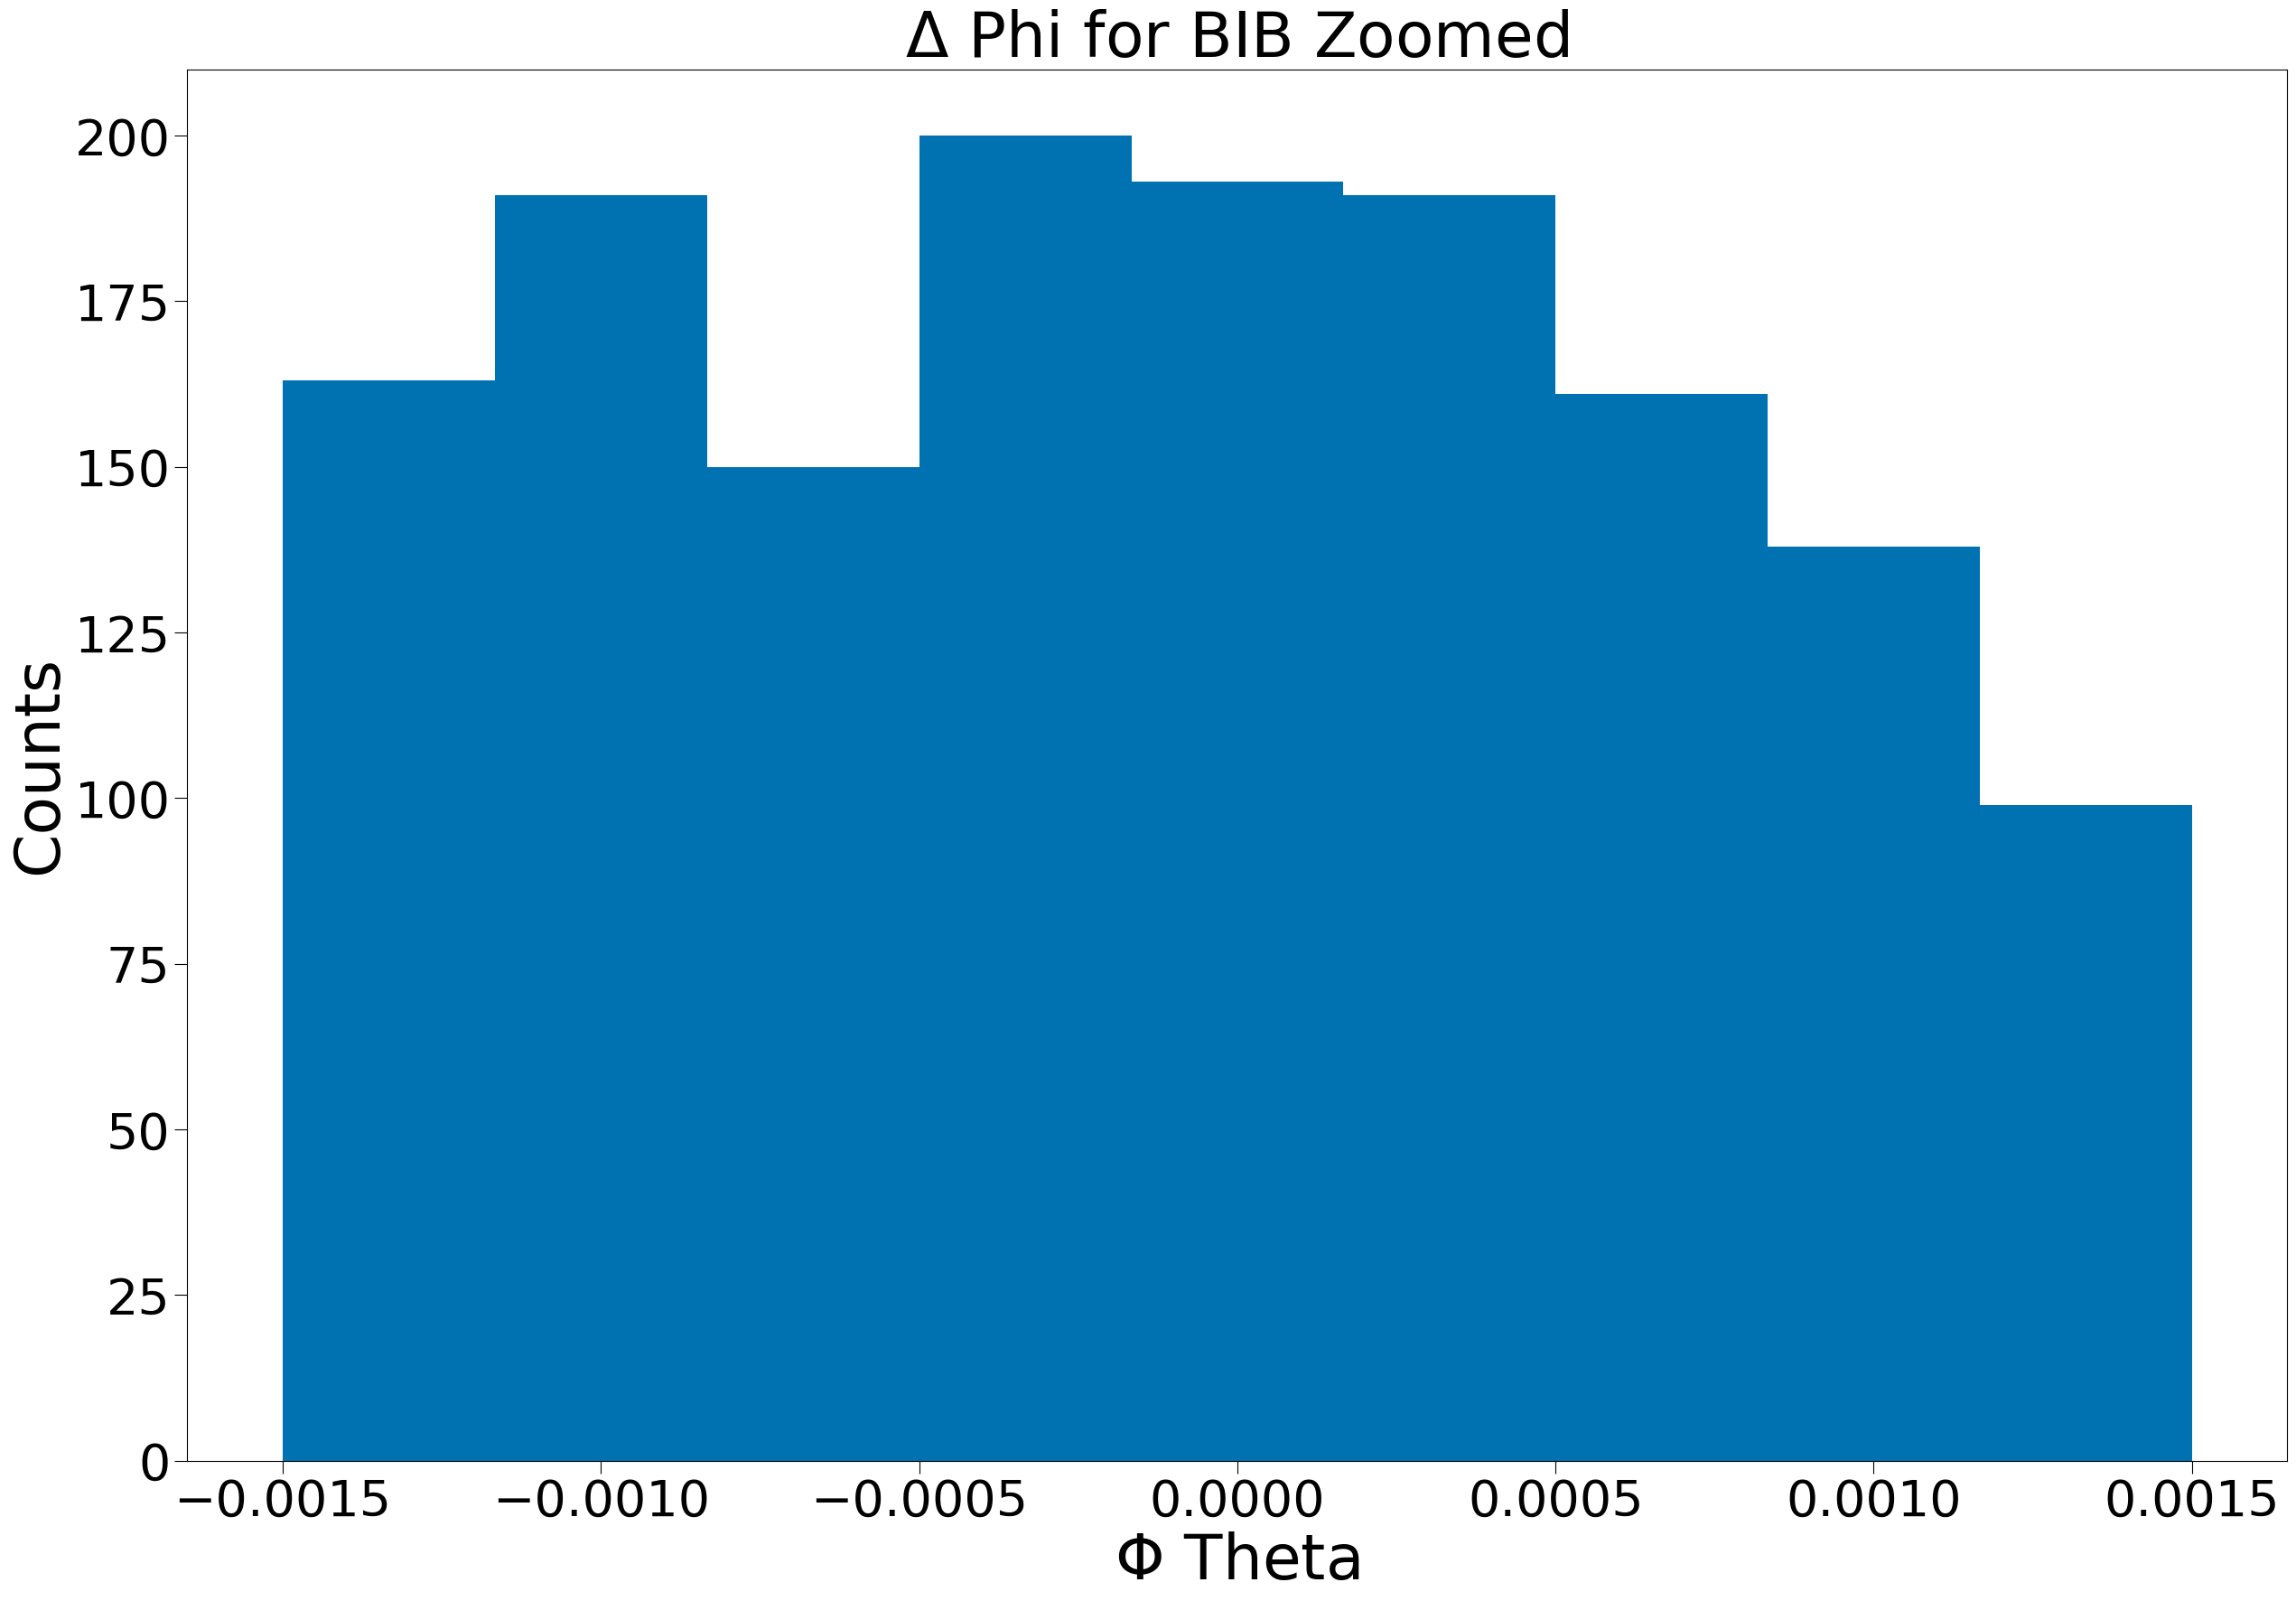

In [105]:
plot1DHistogram(deltaPhiBIB, bins=np.linspace(-0.0015,0.0015,10), label=f"$\Delta$ Phi for BIB Zoomed;$\Phi$ Theta;Counts")
#22 data points

In [100]:
print(print((np.array([2])&np.array([1])).astype(bool)))

[False]
None


In [72]:
print(2 & True)

0


In [76]:
if 2:
    print("hey")

hey
